# <span style="color:lime">SET DIRECTORY WHERE THE FILE IS LOCATED

In [82]:
pwd # Specifies the path of the file being executed

'c:\\Users\\Kosta\\Desktop\\Python_Projects\\OTHER_PROJECTS\\Final _Assigment_Ravanos'

# <span style="color:lime">IMPORT REQUIRED LIBRARIES FOR CODE EXECUTION


In [ ]:
# Libraries used for data import and processing
import random
import numpy as np
import pandas as pd
import warnings as wr
from collections import Counter
from itertools import combinations


# Libraries used for plotting
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Libraries used for machine learning model training
import tensorflow as tf
from sklearn.svm import SVC
from minisom import MiniSom
from keras.layers import Dense
from keras.layers import Input
import sklearn.neighbors as knn
from itertools import combinations
from keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score, f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc

# <span style="color:lime">SET MODEL PRECISION


In [ ]:
# Set model precision
pd.set_option("display.precision", 2)

# <span style="color:lime">IMPORT AND PROCESS THE FILE REQUIRED FOR ALGORITHM EXECUTION


In [85]:
# File recognition and import into the program
df = pd.read_csv('data/framingham.csv')

# Create DataFrame
df.head() 

# Show file type
type(df)

# Print the first five columns of the data
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

# <span style="color:lime">SUMMARY PRESENTATION OF DATA BEFORE REMOVING INFINITE AND NaN VALUES


In [86]:
# Returns the total number of rows in the data file
len(df)

4238

In [87]:
# Returns the column names of the data file
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [88]:
# Shows the data types contained in the file columns
# The dataset consists of 16 columns, 7 of which are categorical variables (0 or 1) and the remaining 9 are quantitative variables
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
# Sets variables with values 0 and 1 as categorical for presentation and understanding purposes. This command should be executed after cleaning infinite and NaN values, as the program cannot check for infinite values if categorical variables exist in the dataset.

# for column in df.columns:
    # if set(df[column].unique()) == {0, 1}:
        #df[column] = df[column].astype('category')

In [90]:
# Returns descriptive statistics for each variable in the dataset
df.describe()

male      age  education  currentSmoker  cigsPerDay   BPMeds  \
count  4238.00  4238.00    4133.00        4238.00     4209.00  4185.00   
mean      0.43    49.58       1.98           0.49        9.00     0.03   
std       0.50     8.57       1.02           0.50       11.92     0.17   
min       0.00    32.00       1.00           0.00        0.00     0.00   
25%       0.00    42.00       1.00           0.00        0.00     0.00   
50%       0.00    49.00       2.00           0.00        0.00     0.00   
75%       1.00    56.00       3.00           1.00       20.00     0.00   
max       1.00    70.00       4.00           1.00       70.00     1.00   

       prevalentStroke  prevalentHyp  diabetes  totChol    sysBP    diaBP  \
count         4.24e+03       4238.00   4238.00  4188.00  4238.00  4238.00   
mean          5.90e-03          0.31      0.03   236.72   132.35    82.89   
std           7.66e-02          0.46      0.16    44.59    22.04    11.91   
min           0.00e+00          0.00      0.00   107.00    83.50    48.00   
25%           0.00e+00          0.00      0.00   206.00   117.00    75.00   
50%           0.00e+00          0.00      0.00   234.00   128.00    82.00   
75%           0.00e+00          1.00      0.00   263.00   144.00    89.88   
max           1.00e+00          1.00      1.00   696.00   295.00   142.50   

           BMI  heartRate  glucose  TenYearCHD  
count  4219.00    4237.00  3850.00     4238.00  
mean     25.80      75.88    81.97        0.15  
std       4.08      12.03    23.96        0.36  
min      15.54      44.00    40.00        0.00  
25%      23.07      68.00    71.00        0.00  
50%      25.40      75.00    78.00        0.00  
75%      28.04      83.00    87.00        0.00  
max      56.80     143.00   394.00        1.00

In [91]:
# Returns the data types contained in the file columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [92]:
# Prints the type of each variable in the dataset
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# <span style="color:lime">DATASET PROCESSING AND CLEANING OF INFINITE AND NaN VALUES


In [ ]:
# Checks if there are infinite values in the dataset
if np.any(np.isinf(df)):
    print("Data contains infinite values. Replacing them with NaN.")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [94]:
# Checks if there are NaN values in the dataset.
# If you run this command before presenting the data, the presentation will be without these values. It is better to run this command after presenting the data so models can run.
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

Data contains NaN values. Please handle missing data before proceeding.


# <span style="color:lime">SUMMARY PRESENTATION OF DATA


In [95]:
# Returns the total number of rows in the data file
len(df)

3656

In [96]:
# Returns the column names of the data file
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [97]:
# Shows the data types contained in the file columns
# The dataset consists of 16 columns, 7 of which are categorical variables (0 or 1) and the remaining 9 are quantitative variables
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
# Sets variables with values 0 and 1 as categorical for presentation and understanding purposes
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype('category')

In [99]:
# Returns descriptive statistics for each variable in the dataset
df.describe()

age  education  cigsPerDay  totChol    sysBP    diaBP      BMI  \
count  3656.00    3656.00     3656.00  3656.00  3656.00  3656.00  3656.00   
mean     49.56       1.98        9.02   236.87   132.37    82.91    25.78   
std       8.56       1.02       11.92    44.10    22.09    11.97     4.07   
min      32.00       1.00        0.00   113.00    83.50    48.00    15.54   
25%      42.00       1.00        0.00   206.00   117.00    75.00    23.08   
50%      49.00       2.00        0.00   234.00   128.00    82.00    25.38   
75%      56.00       3.00       20.00   263.25   144.00    90.00    28.04   
max      70.00       4.00       70.00   600.00   295.00   142.50    56.80   

       heartRate  glucose  
count    3656.00  3656.00  
mean       75.73    81.86  
std        11.98    23.91  
min        44.00    40.00  
25%        68.00    71.00  
50%        75.00    78.00  
75%        82.00    87.00  
max       143.00   394.00

In [100]:
# Groups data by the "TenYearCHD" column and calculates various statistics for each group
df.groupby("TenYearCHD", observed=True).describe().T

TenYearCHD           0       1
age     count  3099.00  557.00
        mean     48.71   54.28
        std       8.38    7.99
        min      32.00   35.00
        25%      42.00   49.00
...                ...     ...
glucose min      40.00   40.00
        25%      71.00   72.00
        50%      78.00   79.00
        75%      86.00   90.00
        max     386.00  394.00

[72 rows x 2 columns]

In [101]:
# Returns the data types contained in the file columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             3656 non-null   category
 1   age              3656 non-null   int64   
 2   education        3656 non-null   float64 
 3   currentSmoker    3656 non-null   category
 4   cigsPerDay       3656 non-null   float64 
 5   BPMeds           3656 non-null   category
 6   prevalentStroke  3656 non-null   category
 7   prevalentHyp     3656 non-null   category
 8   diabetes         3656 non-null   category
 9   totChol          3656 non-null   float64 
 10  sysBP            3656 non-null   float64 
 11  diaBP            3656 non-null   float64 
 12  BMI              3656 non-null   float64 
 13  heartRate        3656 non-null   float64 
 14  glucose          3656 non-null   float64 
 15  TenYearCHD       3656 non-null   category
dtypes: category(7), float64(8), int64(1)
memory usa

In [102]:
# Prints the type of each variable in the dataset
print(df.dtypes)

male               category
age                   int64
education           float64
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object


# <span style="color:lime">CREATE CONSISTENT STYLE AND SIZE FOR PLOTS

In [103]:
# style.available returns a list of available plot styles. These styles can be used to change the appearance of charts.
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# style.use("dark_background") sets the plot style to "dark_background", providing a dark theme for all charts.
style.use("dark_background")  

# Sets the default chart size to 14x8 inches.
plt.rcParams['figure.figsize'] = (14, 8)

# <span style="color:lime">PLOTS

<span style="color:orange">Scatter Plots by 'TenYearCHD' Category for All Variables

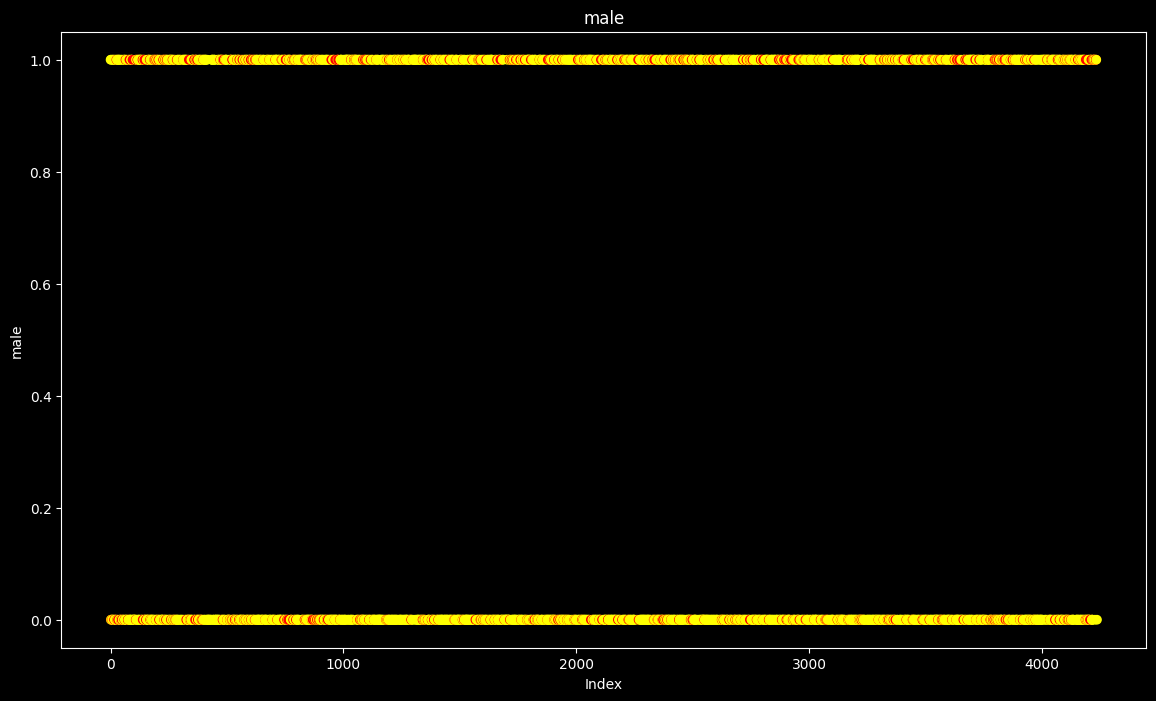

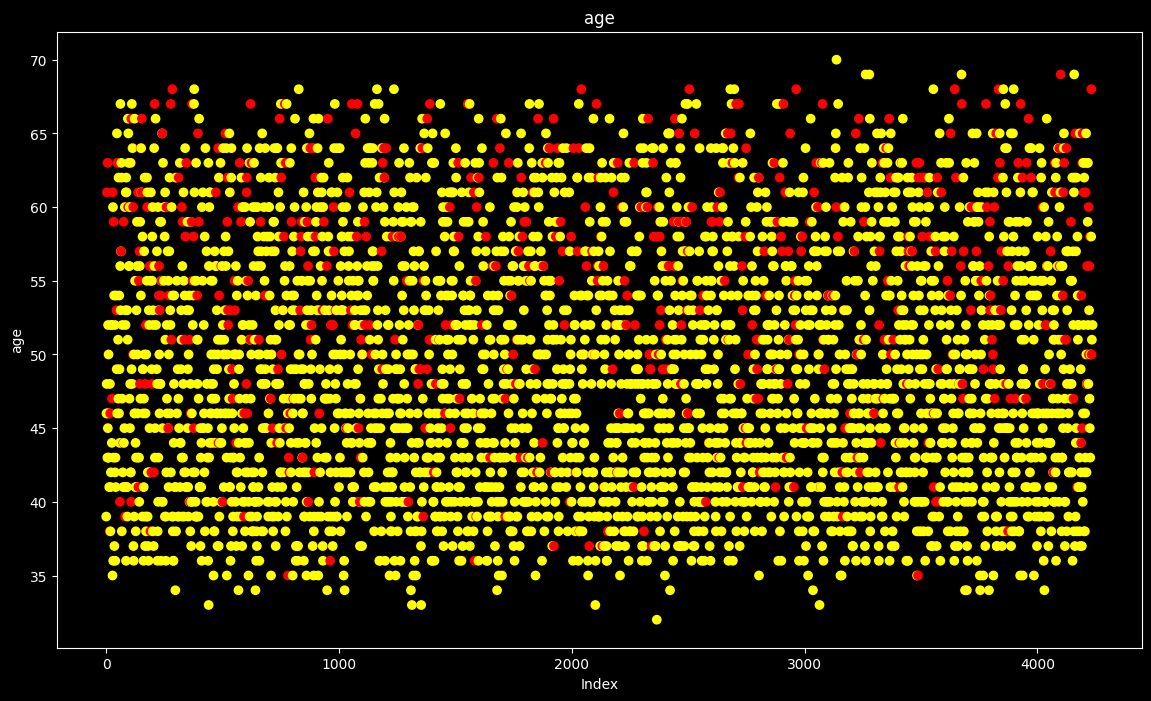

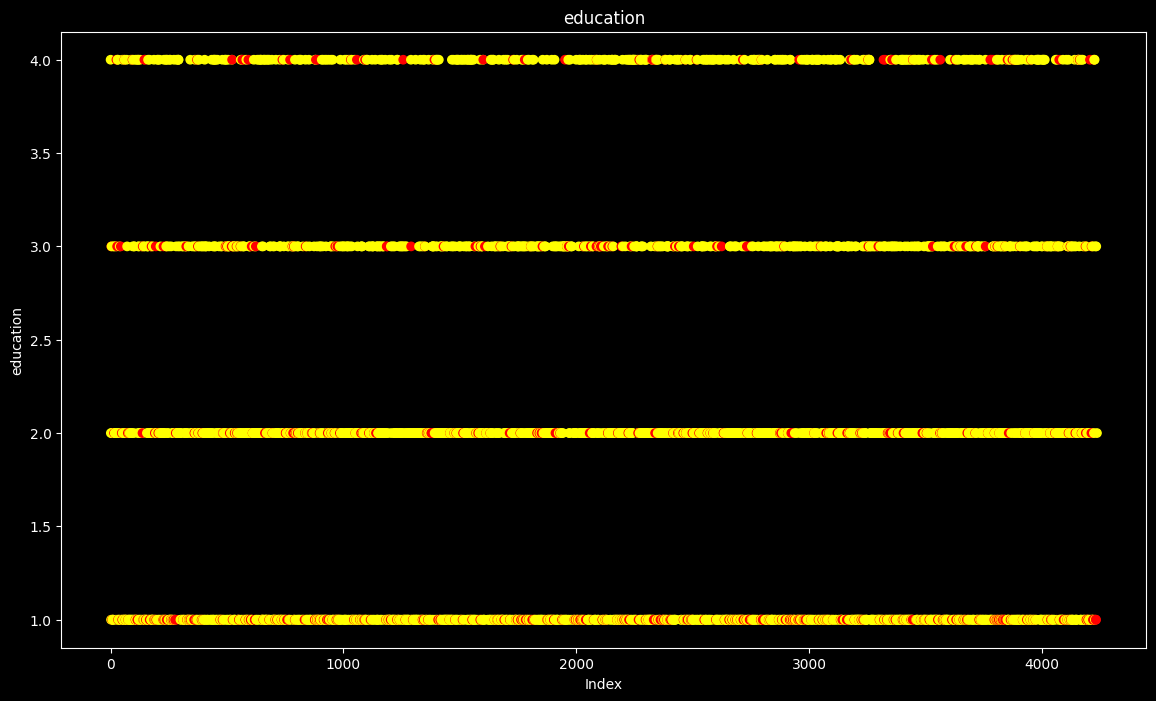

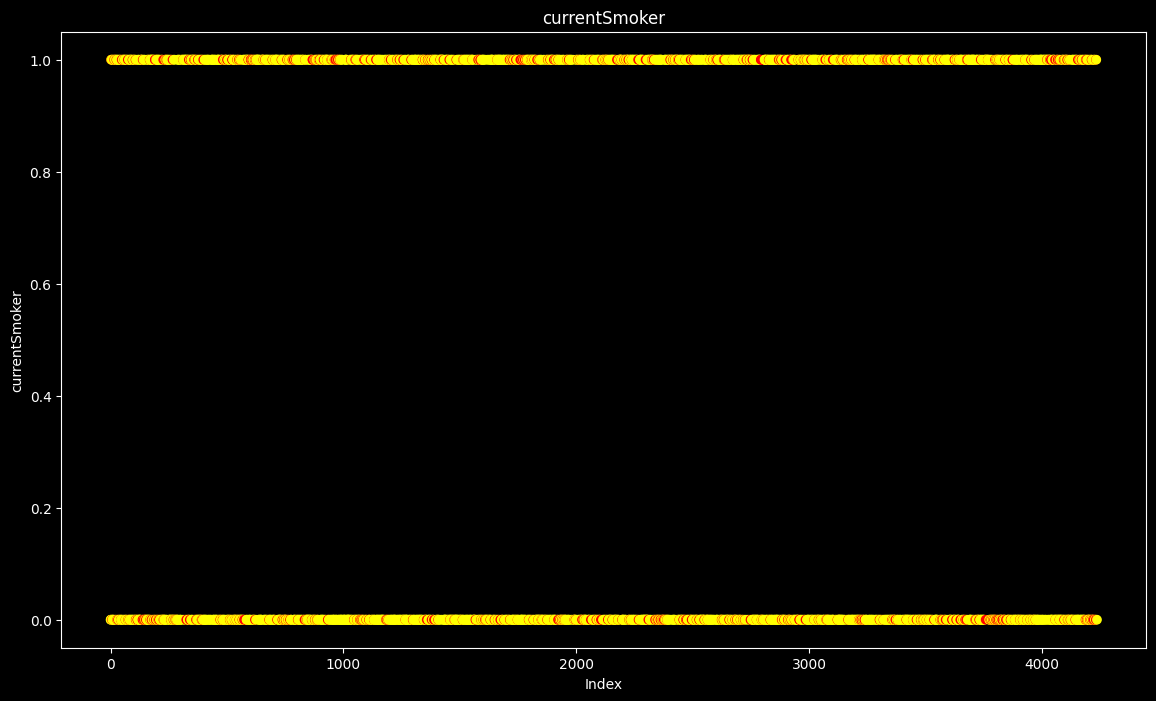

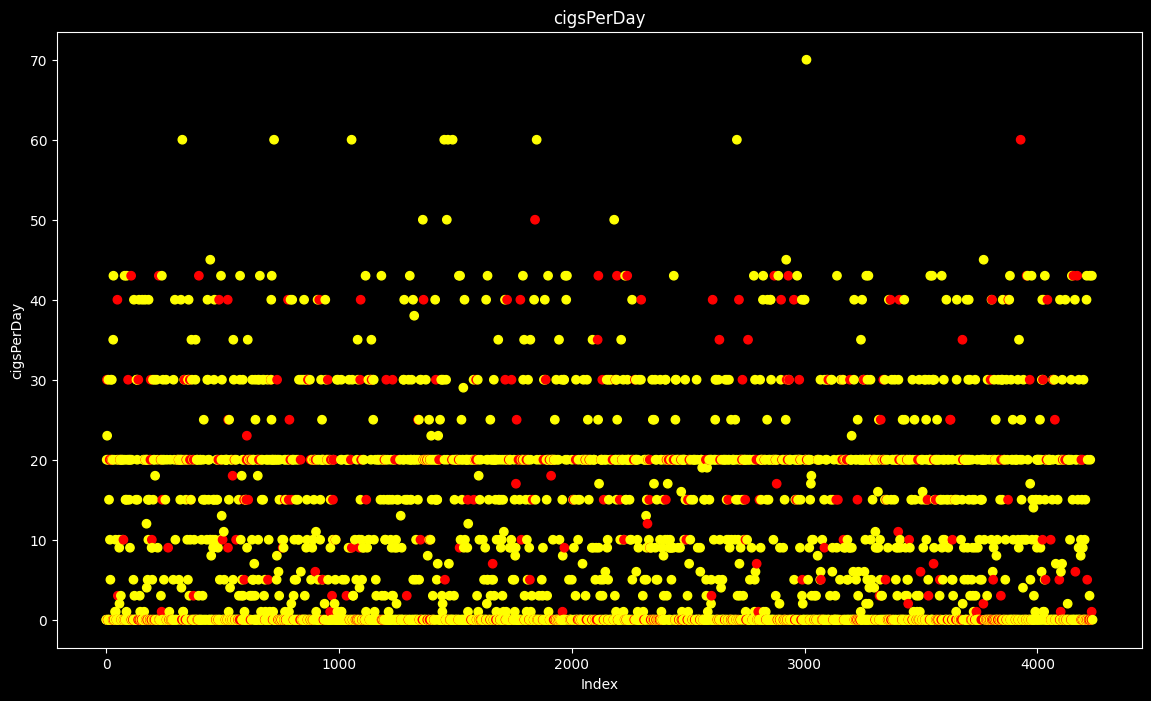

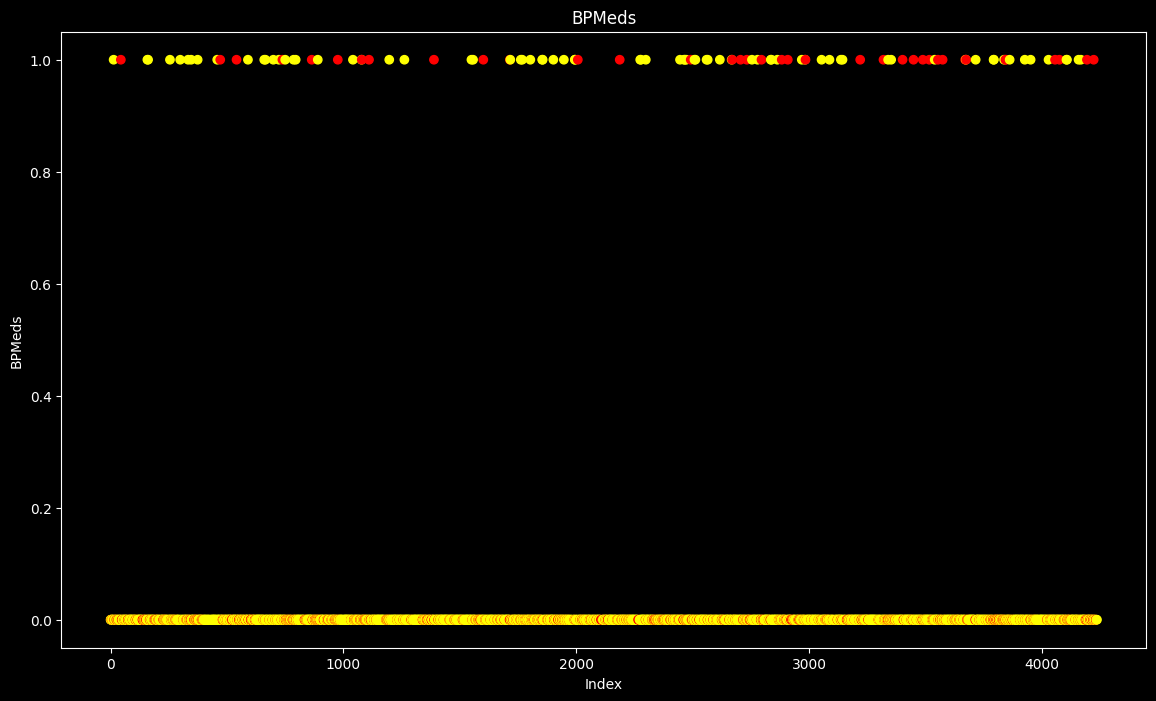

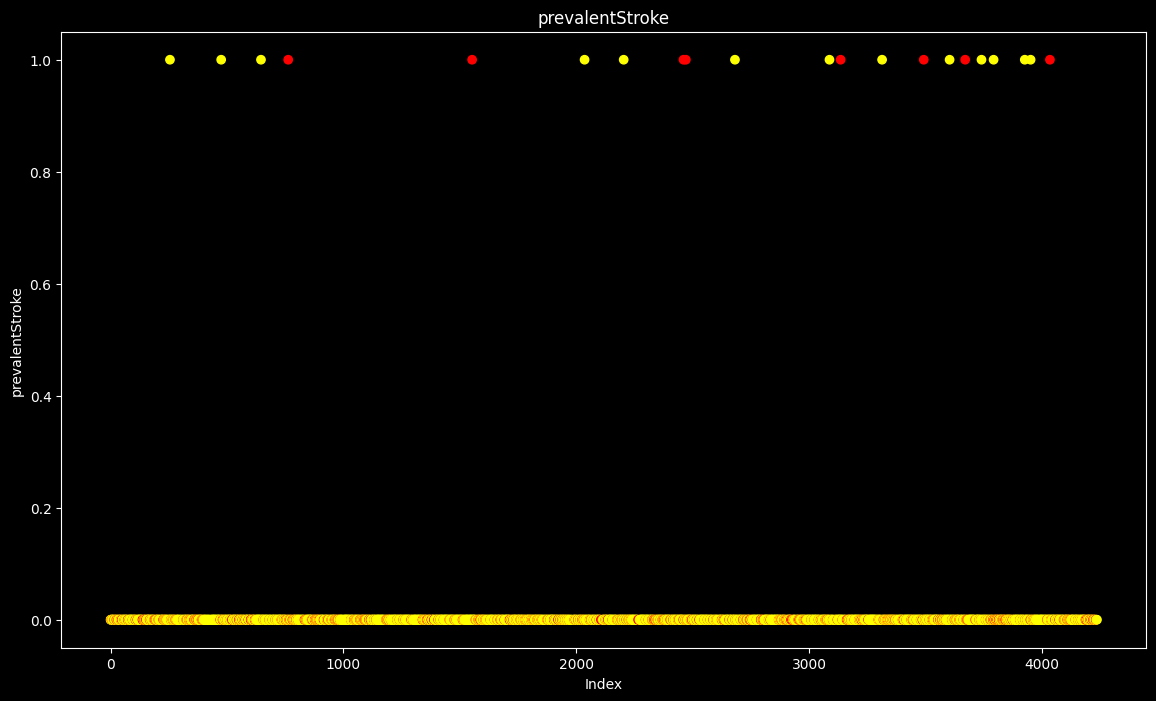

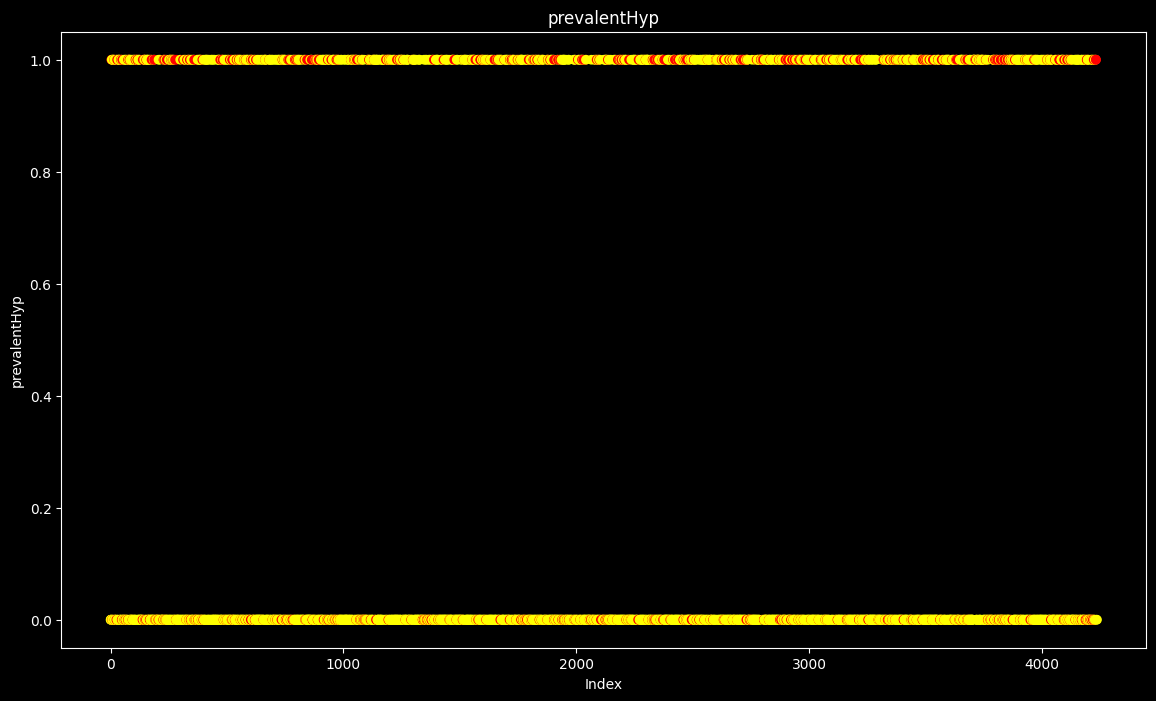

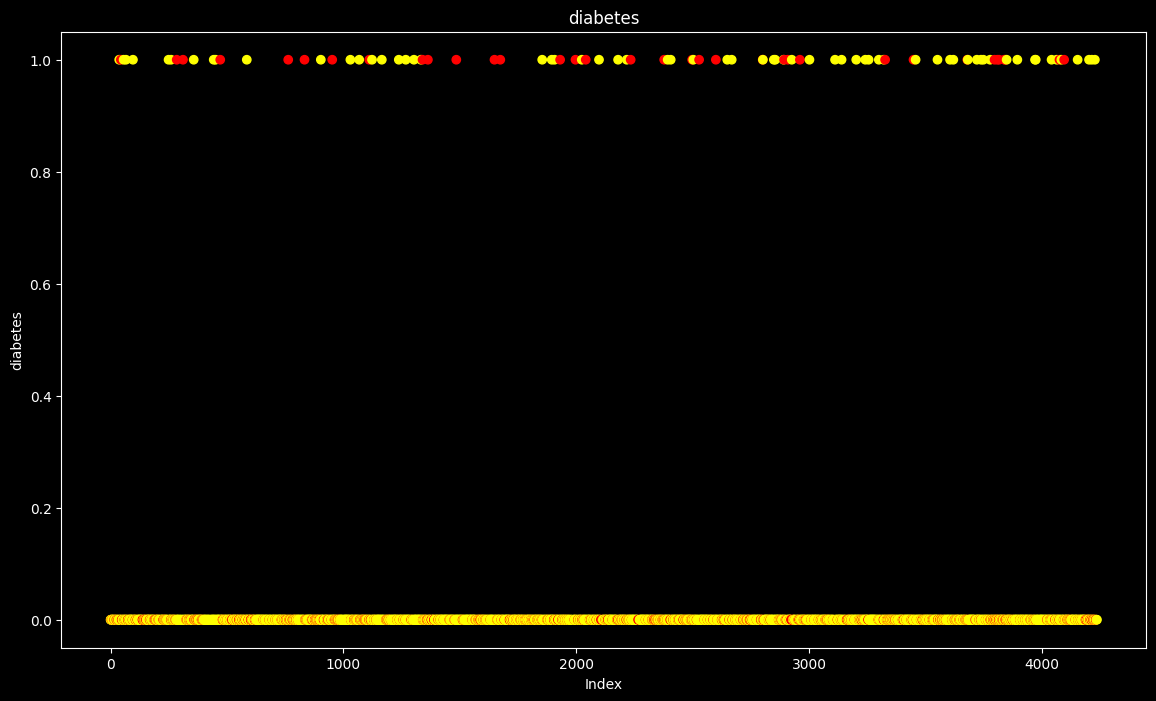

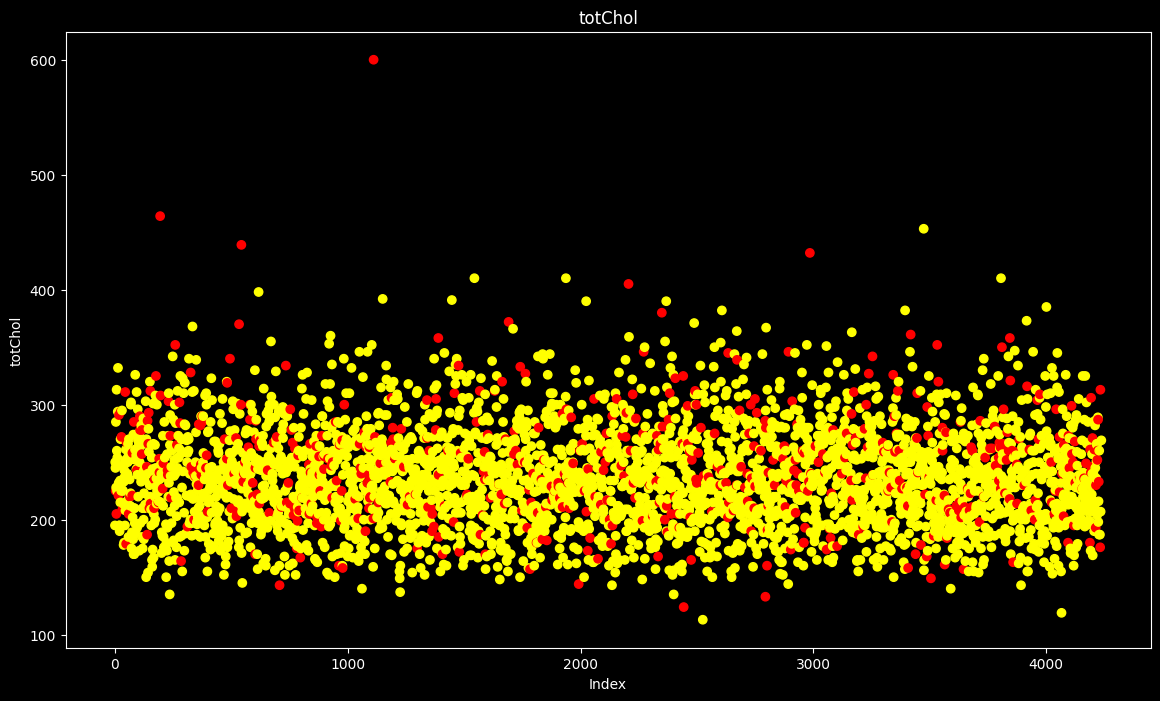

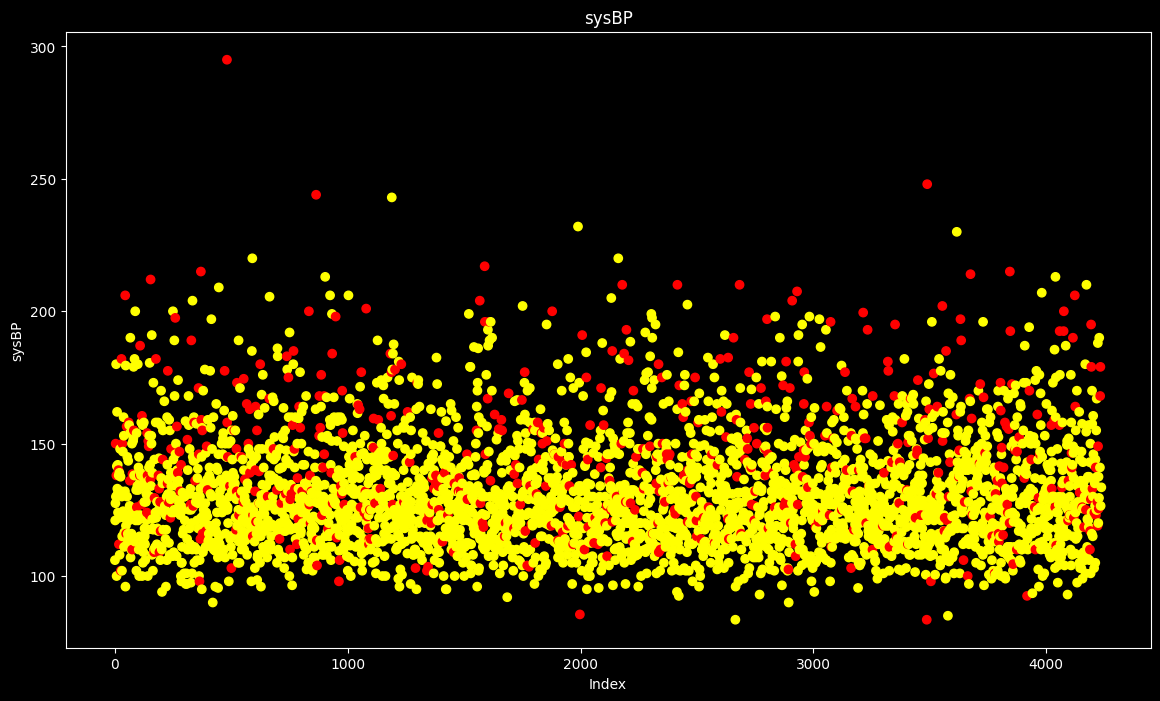

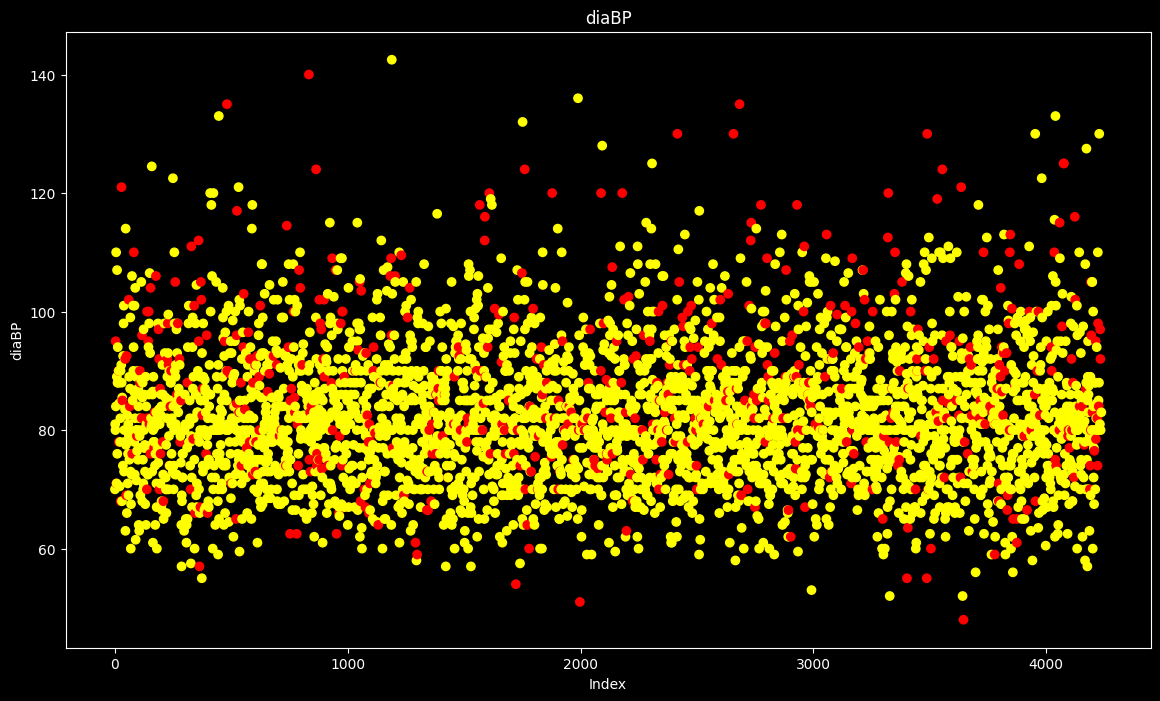

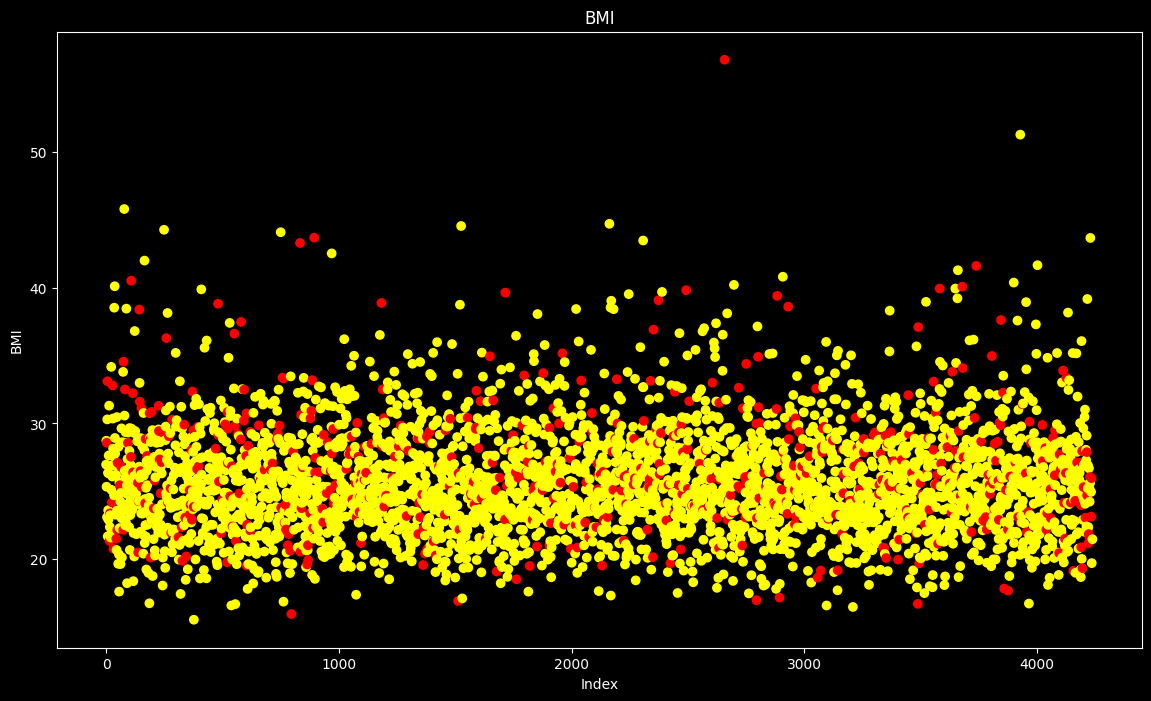

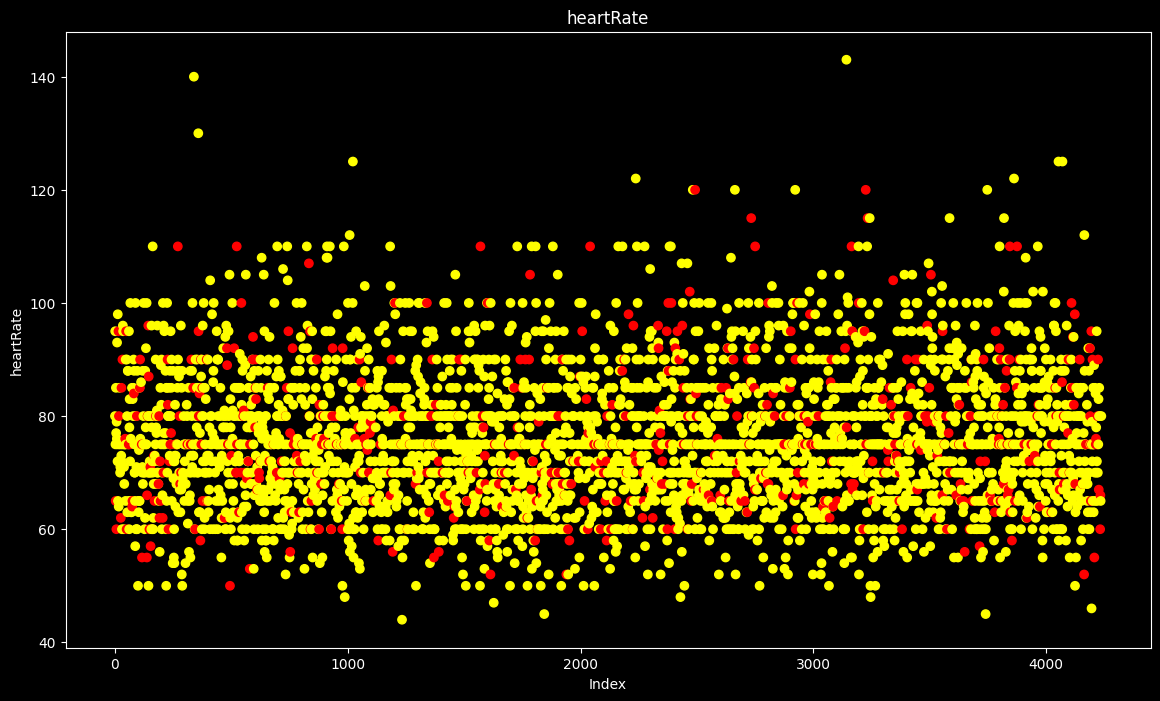

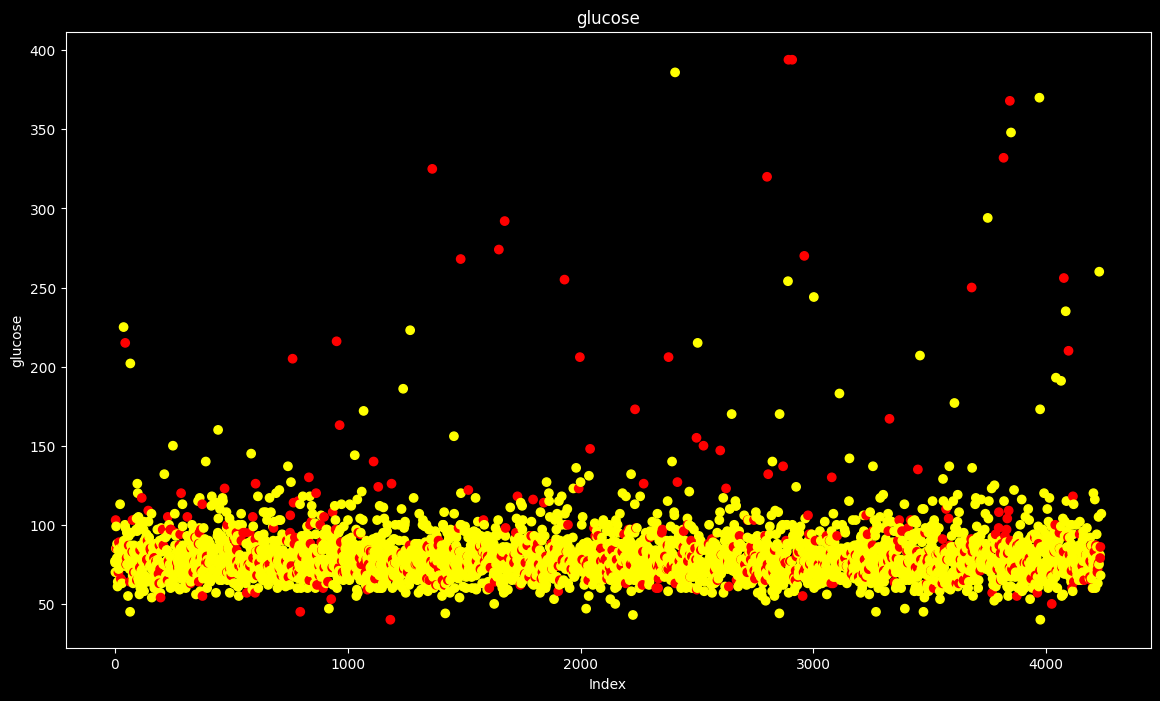

In [105]:
# List of all column names
all_columns = df.columns.tolist()

# Create scatter-plots for each variable
for column in all_columns:
    
    if column != 'TenYearCHD': #Exclude 'TenYearCHD' from the column list
        plt.figure(figsize=(14,8))
        colors = np.where(df['TenYearCHD']==1, 'red', 'yellow') #Set colors based on 'TenYearCHD' value
        plt.scatter(df.index, df[column], c=colors)
        plt.title(column)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

# Save the plot as dist.png in the current folder    
# plt.savefig('dist.png')

<span style="color:orange">Scatter Plots by 'TenYearCHD' Category for Variable Pairs

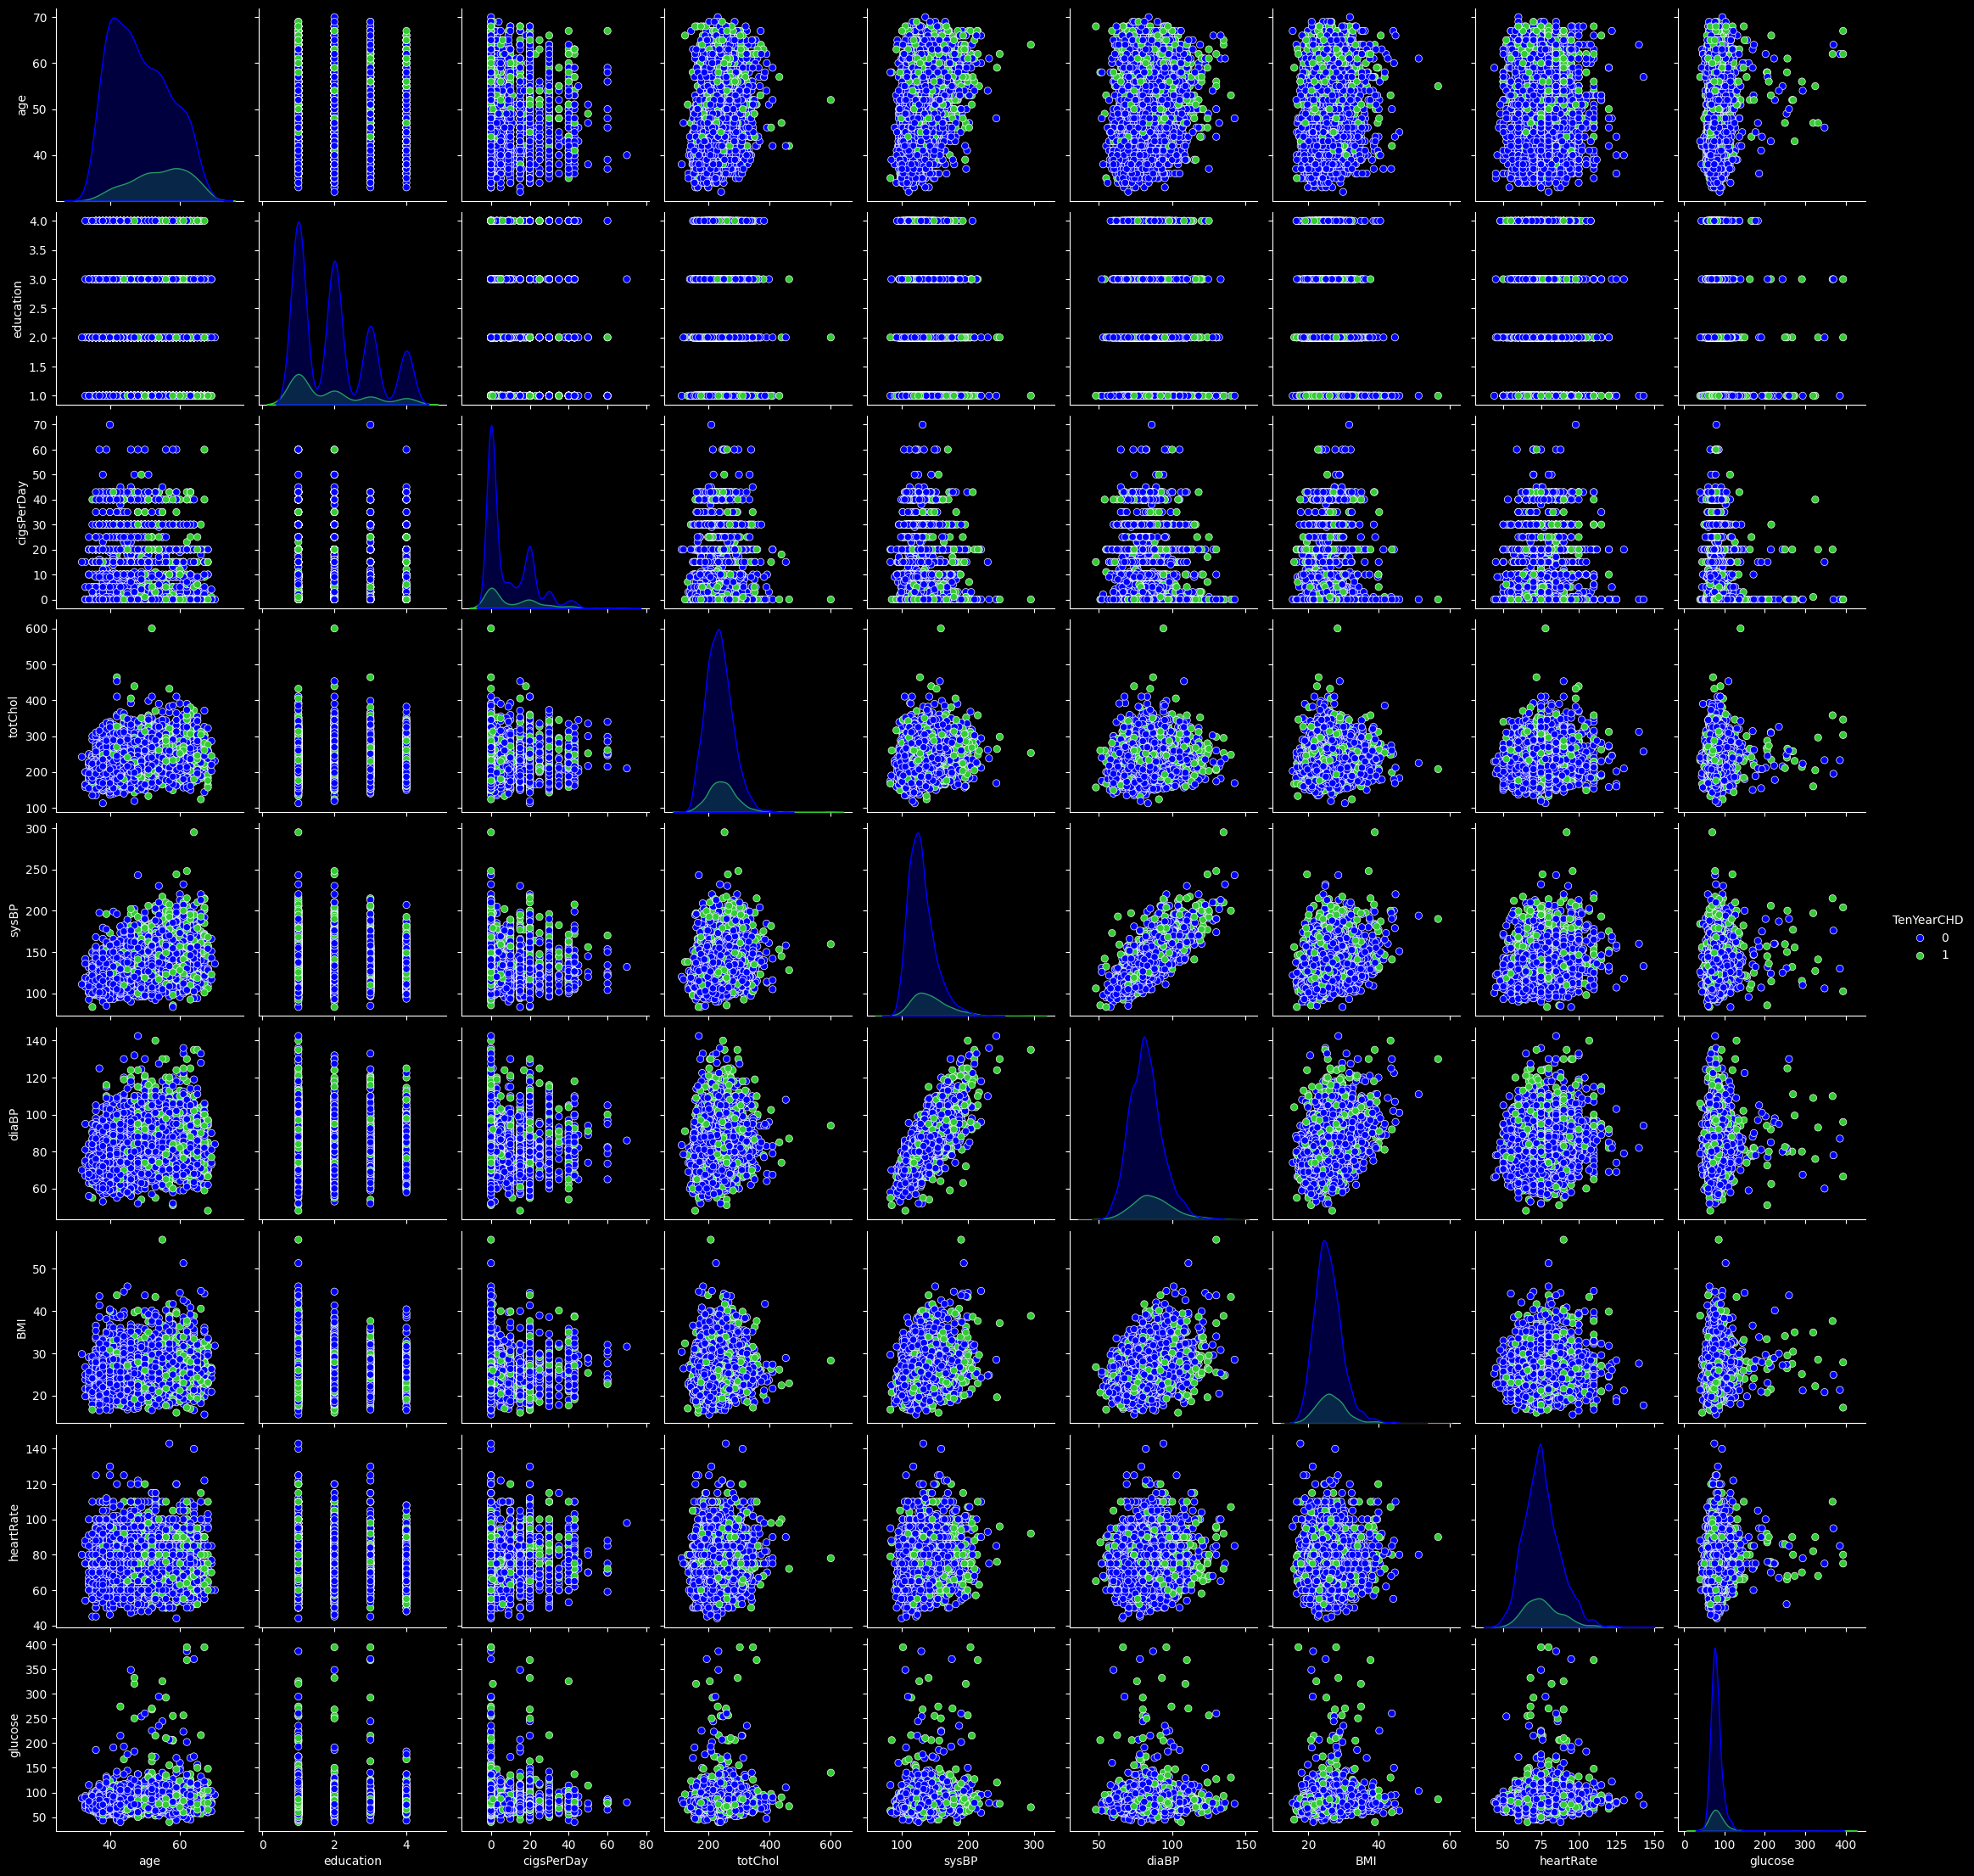

In [ ]:
# Ignore all warnings that may be generated during code execution.
wr.filterwarnings('ignore')

# Create a plot showing relationships between all variable pairs in the DataFrame, with different colors for 'TenYearCHD' categories.
sns.pairplot(data=df, hue='TenYearCHD', palette=['Blue', 'limegreen']);

# Save the plot as dist.png in the current folder 
# plt.savefig('dist.png')

<span style="color:orange">Density Plots

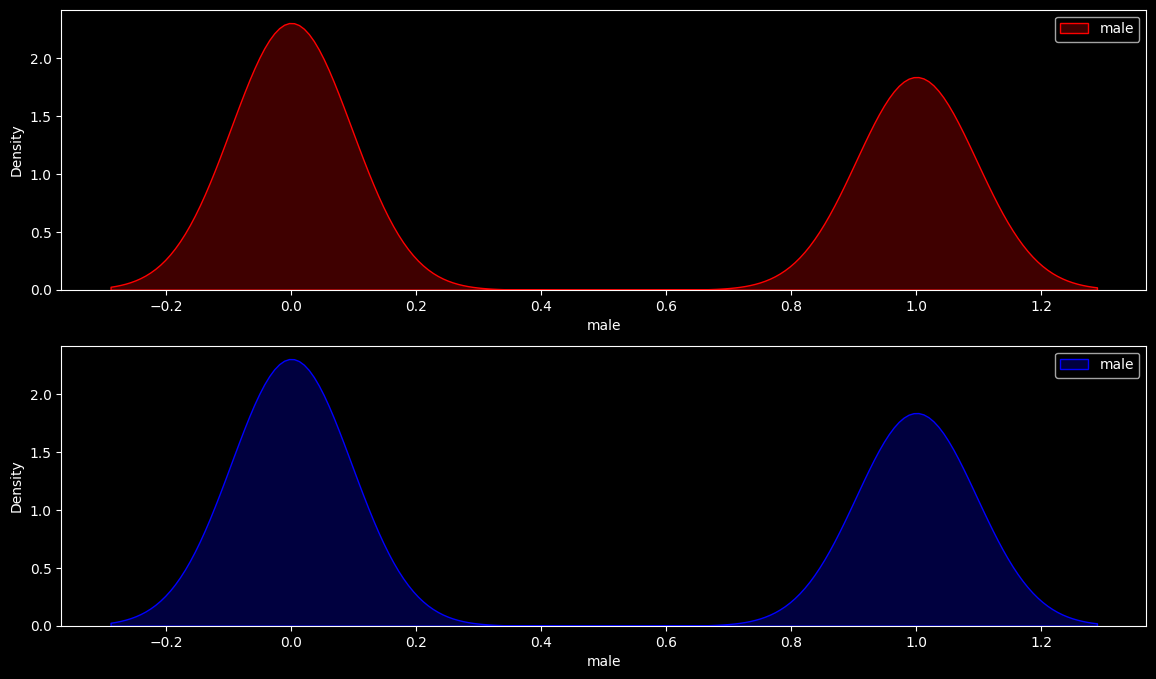

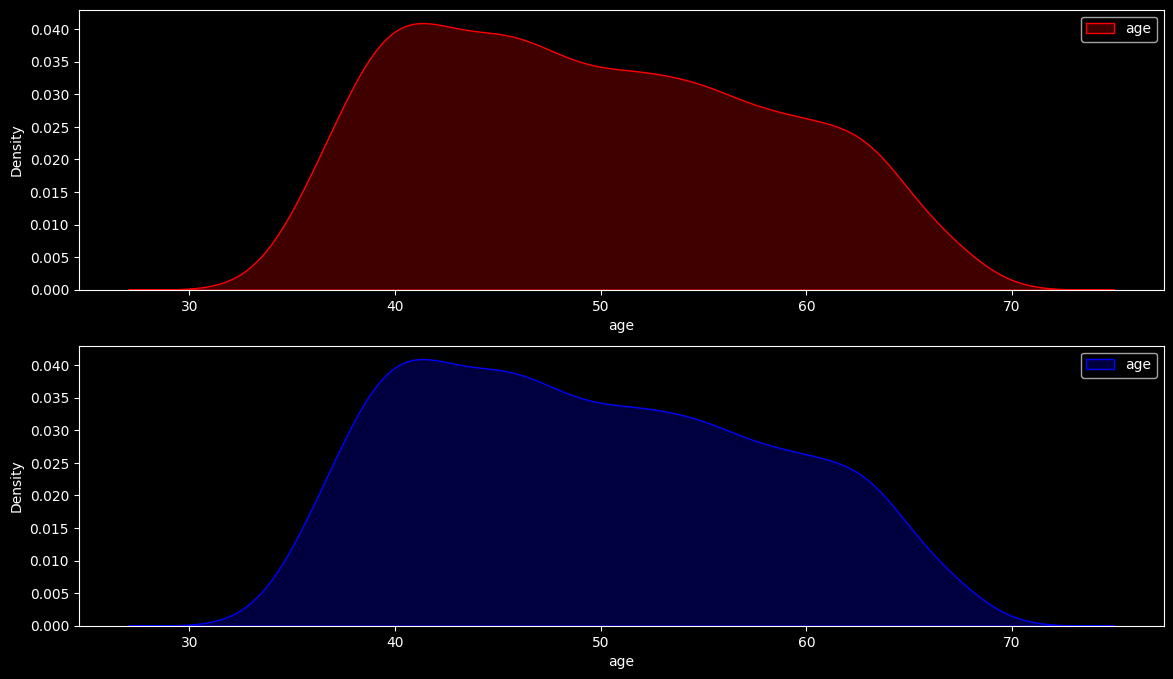

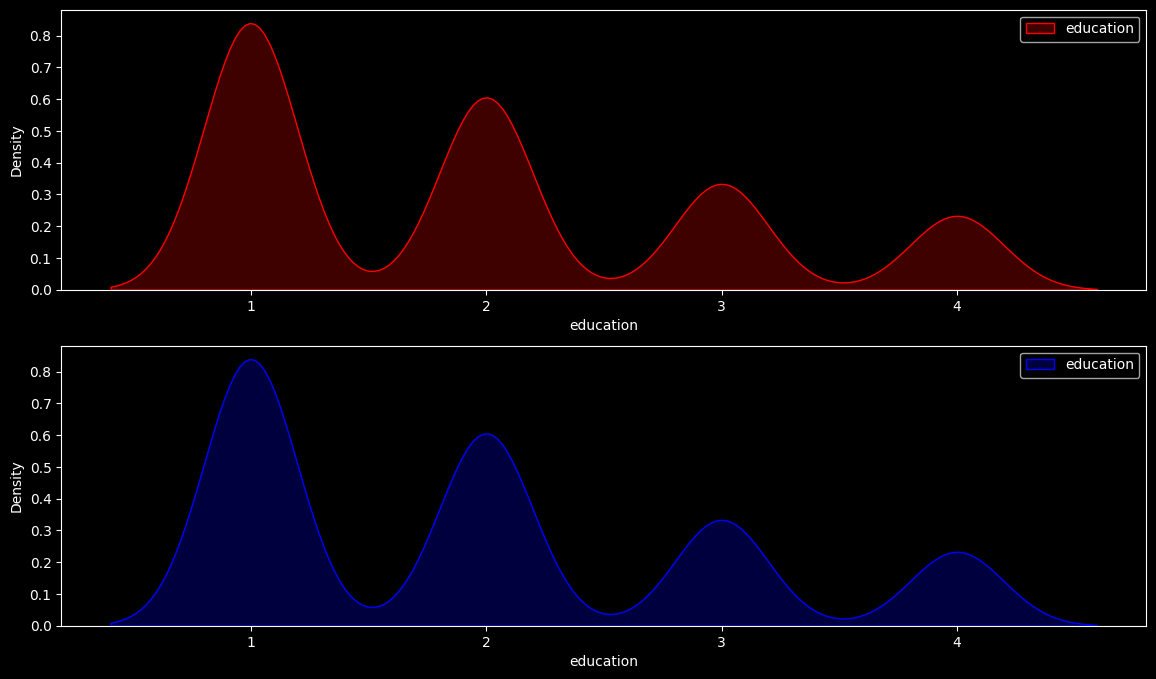

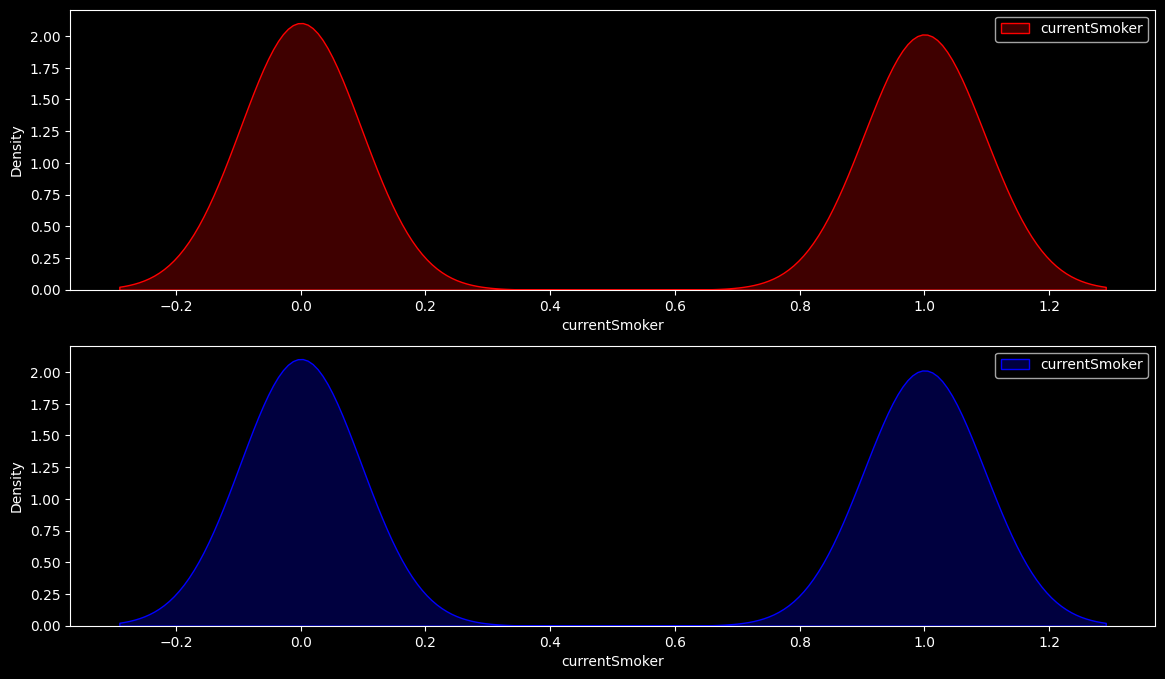

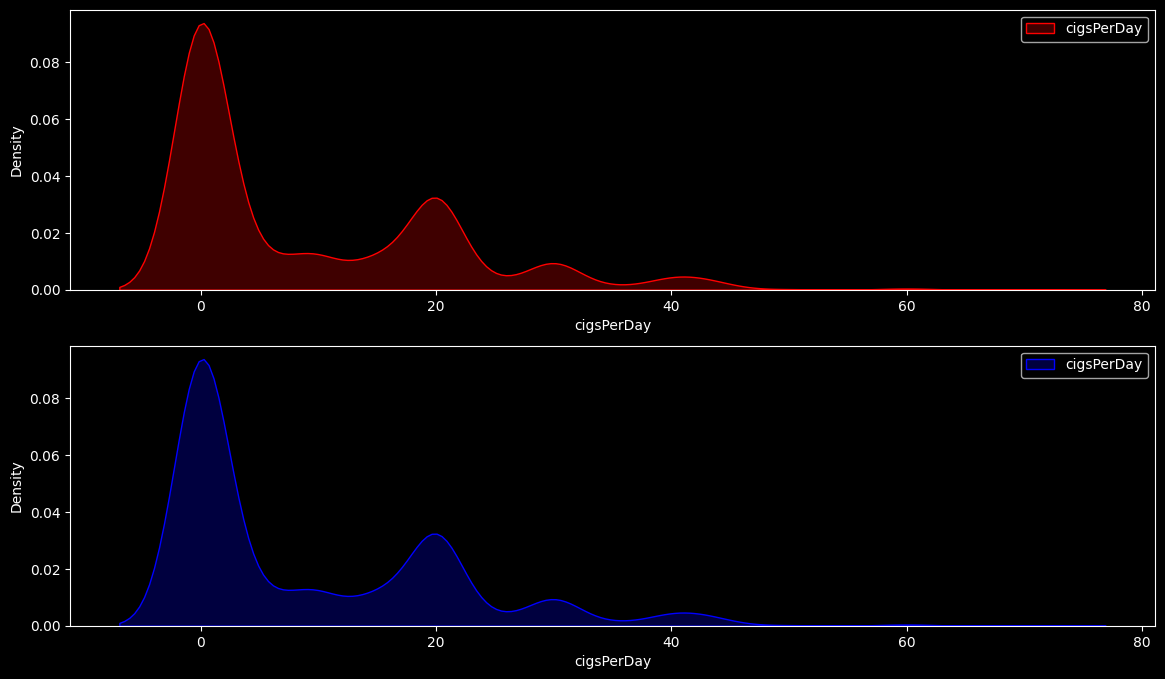

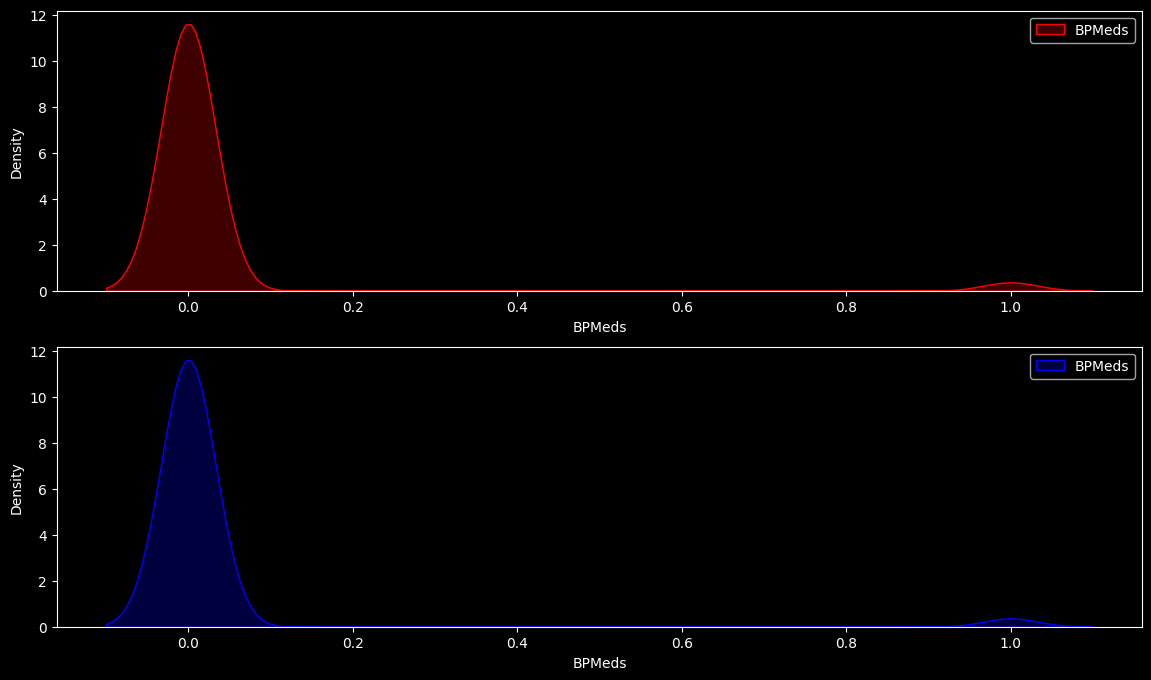

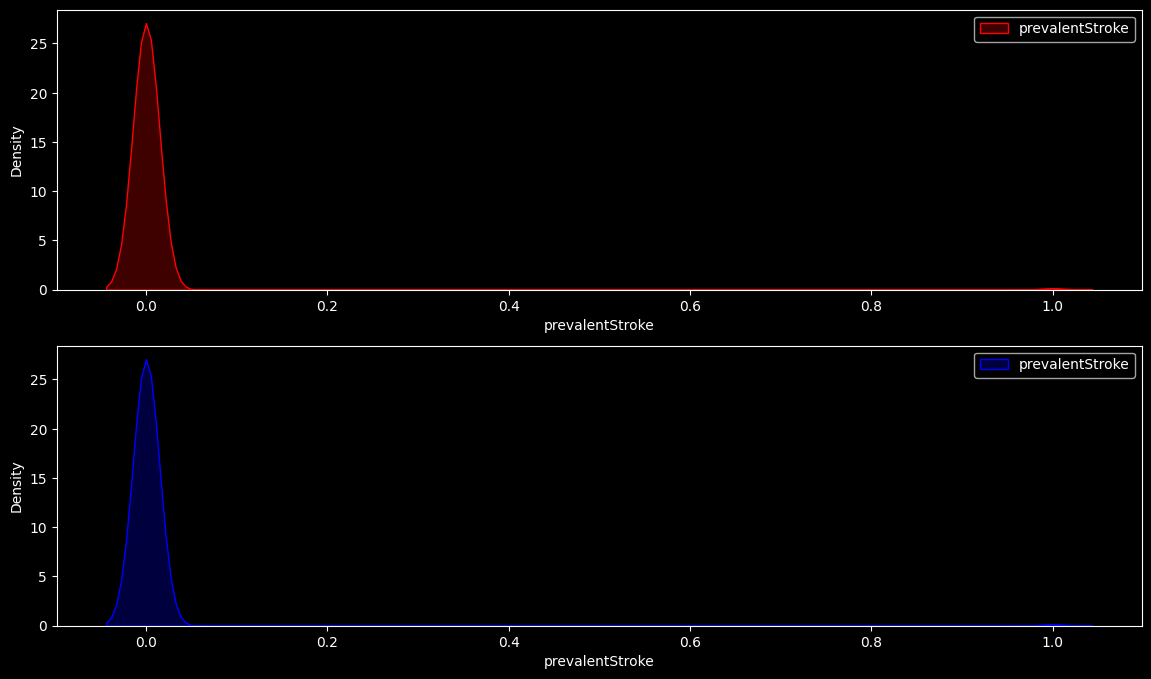

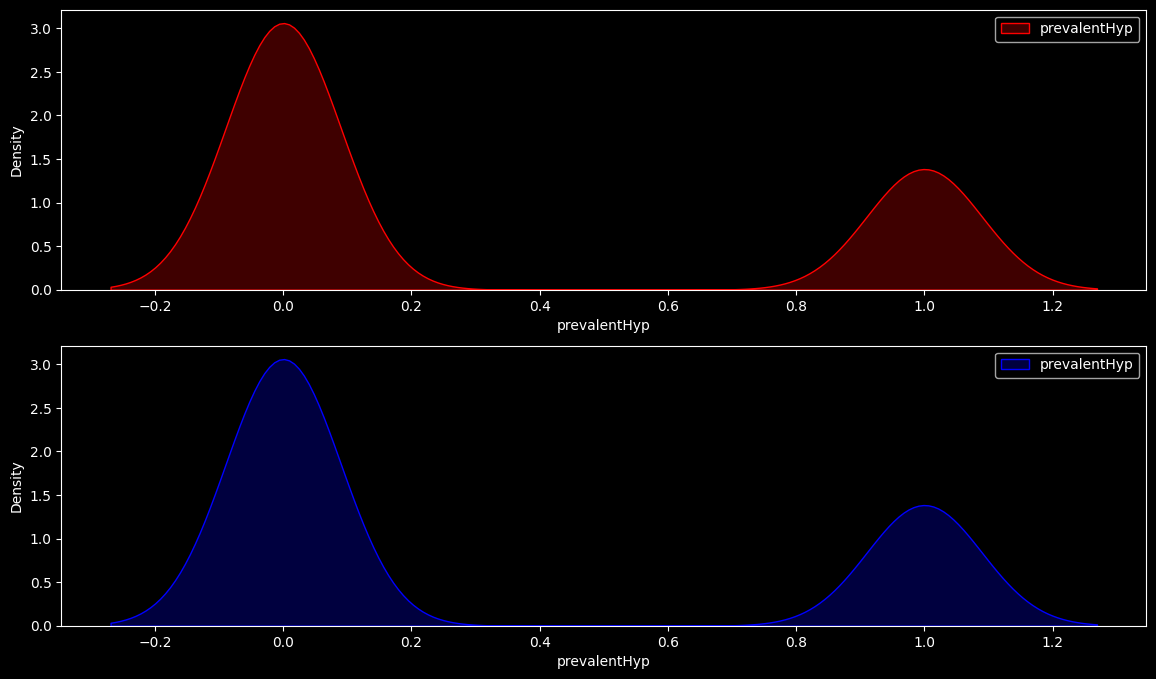

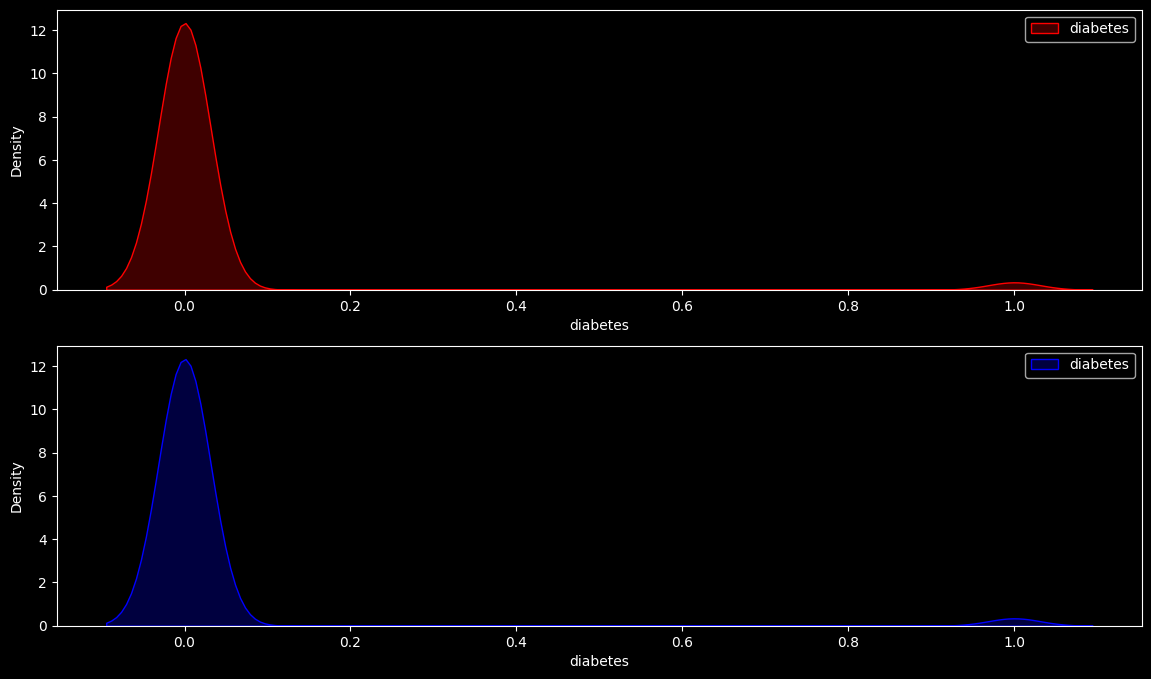

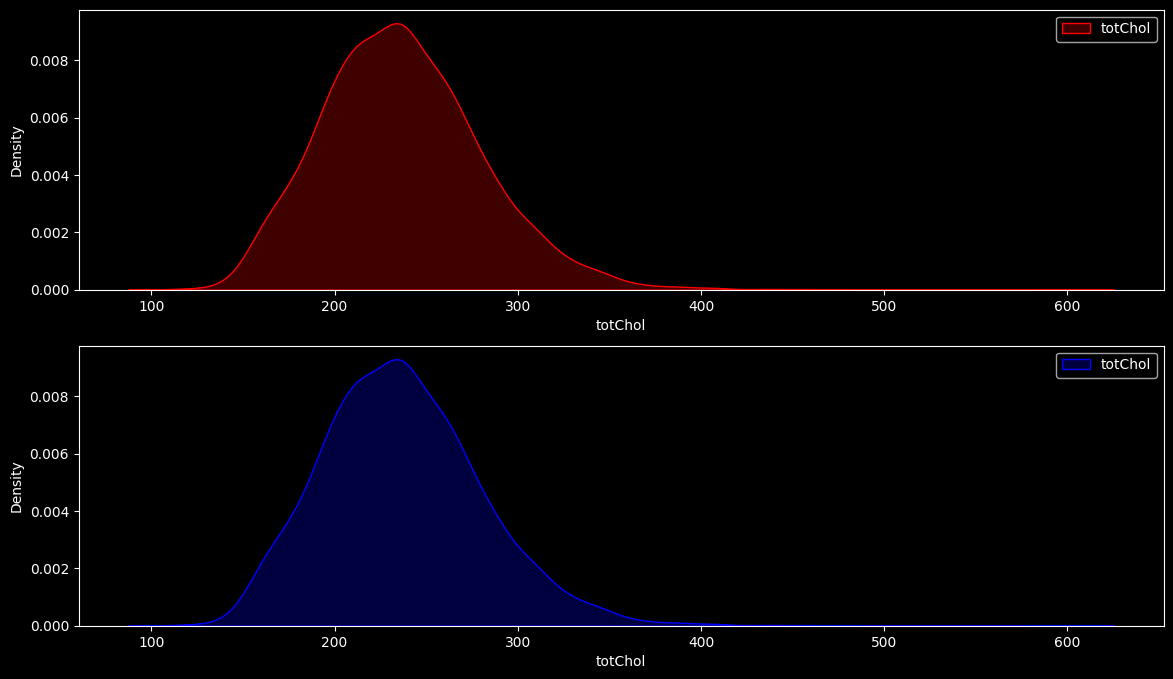

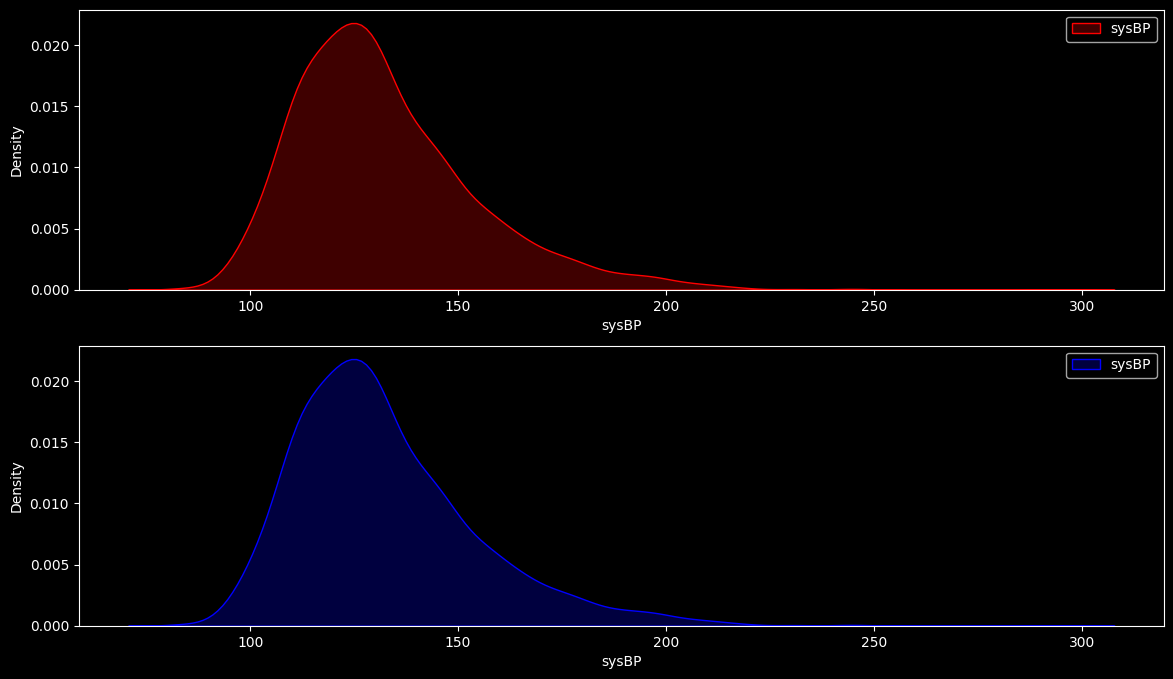

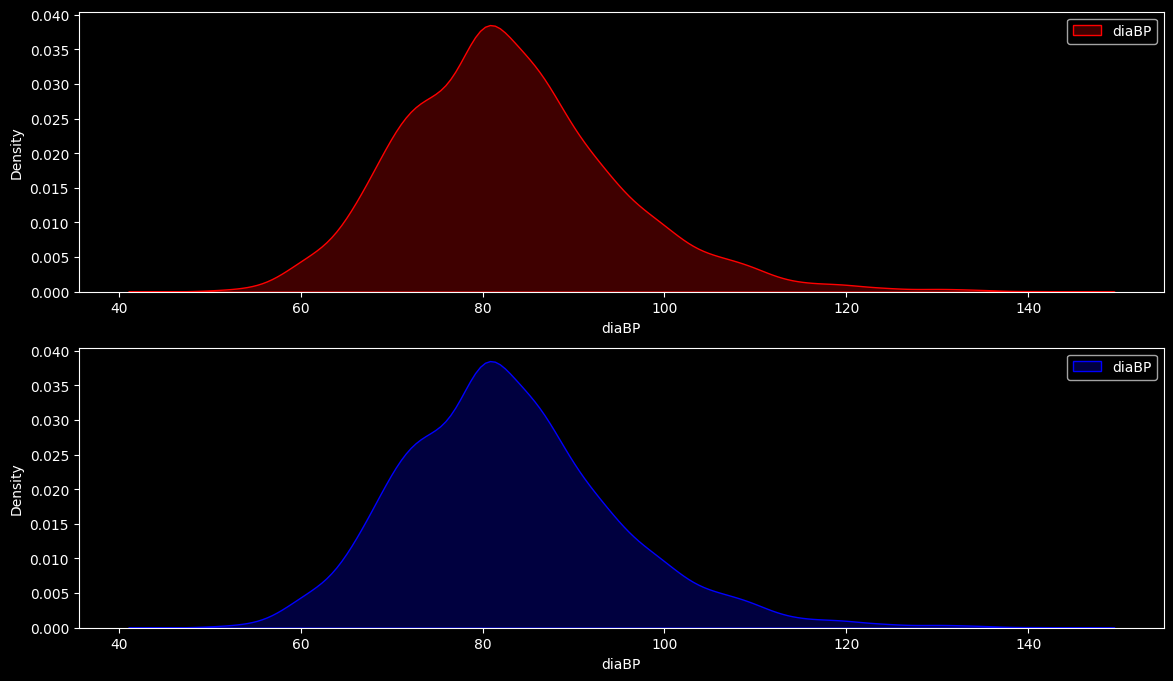

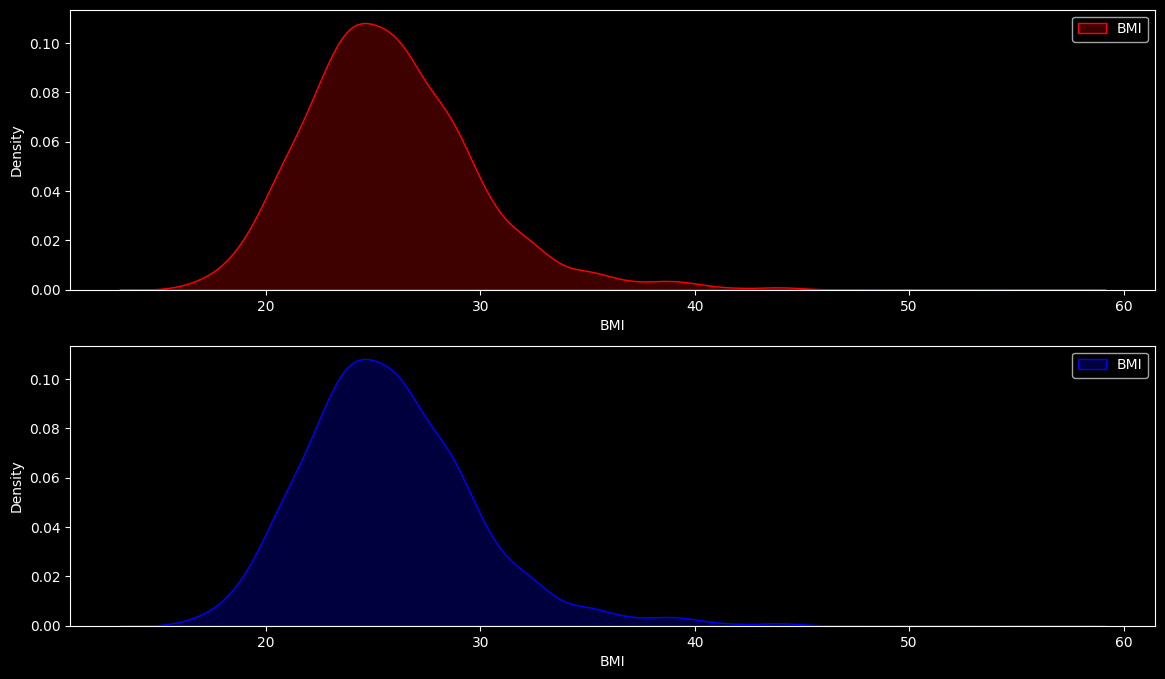

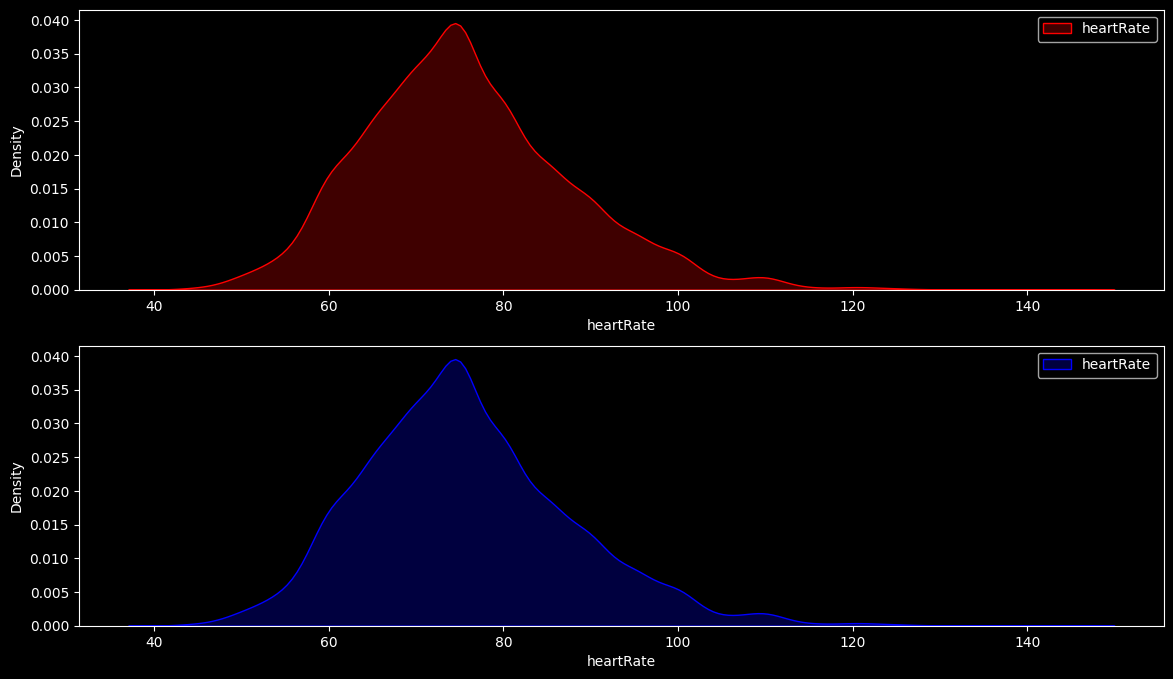

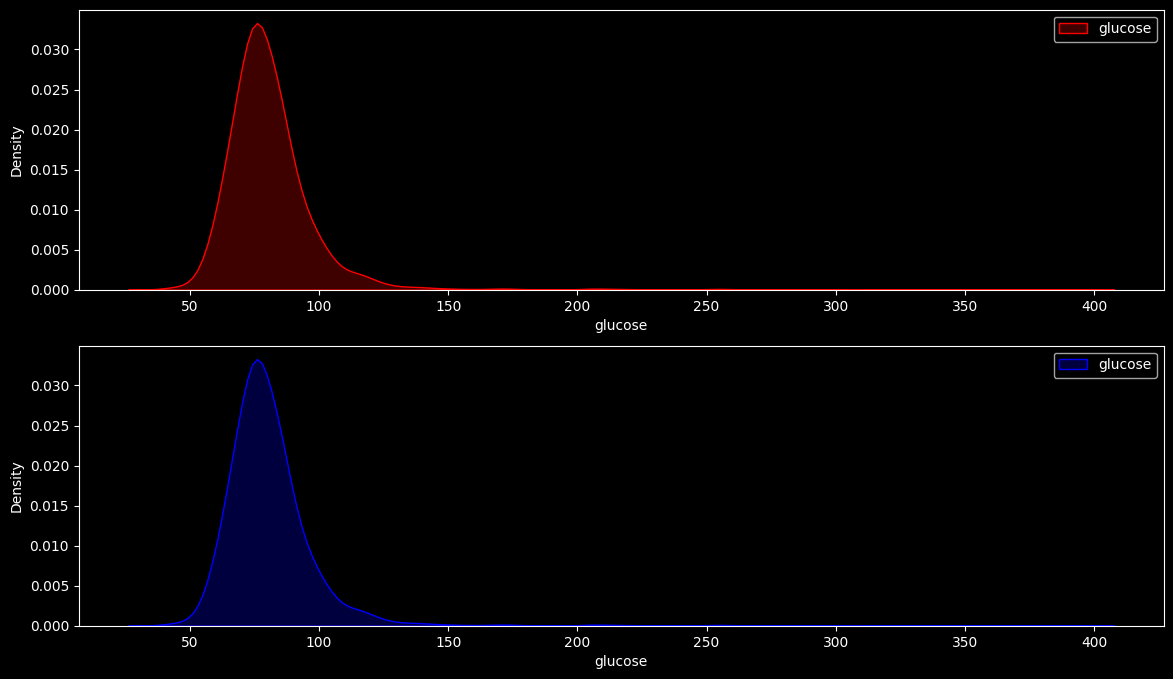

In [107]:
# List of all column names
all_columns = df.columns.tolist()

# Iterate through all DataFrame columns
for column in all_columns:
    # Check if the column is categorical
    if df[column].dtype.name == 'category':
        # Convert the categorical column to numeric
        df[column] = df[column].astype('int')


# Create distribution plots for each variable
for column in all_columns:
    if column != 'TenYearCHD':  # Exclude 'TenYearCHD' from the column list
        ax1 = plt.subplot(211)
        sns.kdeplot(df[column], color = 'r', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        ax2 = plt.subplot(212)
        sns.kdeplot(df[column], color = 'b', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        plt.show()

# Save the plot as dist.png in the current folder 
 # plt.savefig('dist.png')

# <span style="color:lime">CORRELATION COEFFICIENT

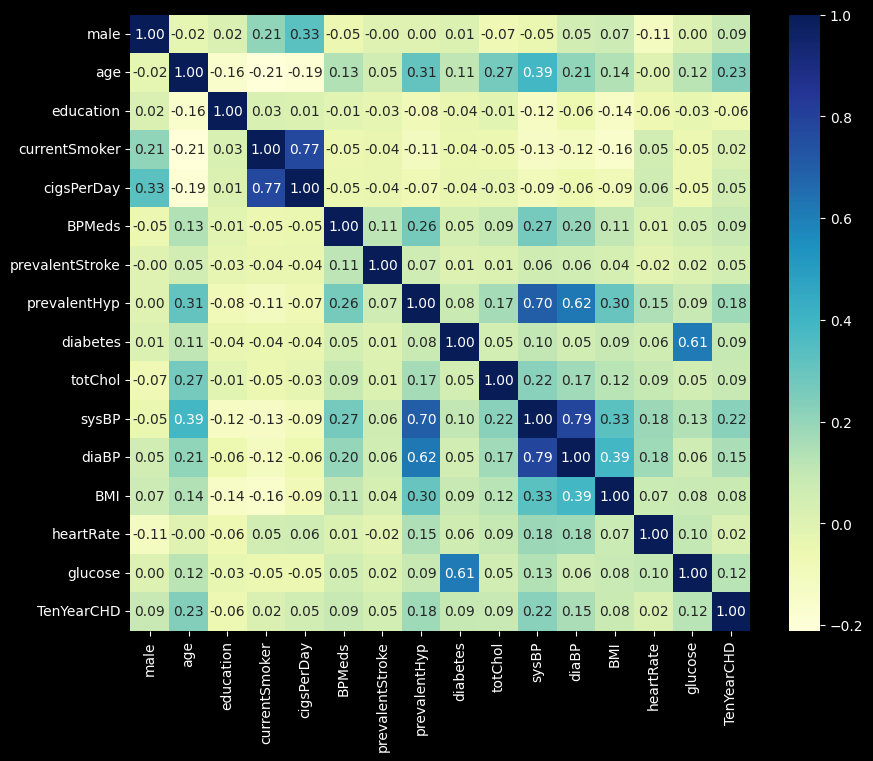

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')

# Show the heatmap
plt.show()

# <span style="color:lime">COMMENTS ON DATA PROCESSING AND ANALYSIS

<span style="color:orange">DESCRIPTIVE STATISTICS:

<span style="color:orange">The Framingham dataset includes 4238 observations with information on various cardiovascular risk factors. The average age is 49.6 years, and 42.9% of participants are male. Education is mainly at the secondary level (mean 1.98). Nearly half (49.4%) are smokers, with an average of 9.00 cigarettes per day. Only 3% take blood pressure medication, while 31% have hypertension. Diabetes prevalence is low at 2.6%. Mean values for total cholesterol, systolic and diastolic blood pressure are 236.72 mg/dL, 132.35 mmHg, and 82.89 mmHg, respectively. BMI averages 25.80 kg/m², indicating most participants are borderline normal weight to obese. Average heart rate is 75.88 bpm, and mean glucose is 81.97 mg/dL. Finally, 15.2% are at risk of developing coronary heart disease within 10 years. These statistics provide a valuable basis for understanding risk factors and developing preventive measures.

<span style="color:orange">PLOTS:

<span style="color:orange">1. Scatter plots show the distribution of variable values by row index, with colors representing the presence or absence of cardiovascular disease in ten years (TenYearCHD). Red dots represent individuals who will develop heart disease, yellow dots those who will not. Extreme values in systolic blood pressure (sysBP) and cholesterol (totChol) have more red dots, indicating a relationship between these factors and heart disease risk.

<span style="color:orange">2. Density plots show the distribution of variable values, with two colors representing TenYearCHD categories. These plots reveal differences in value distributions between those who will and will not develop heart disease. For example, distributions of systolic blood pressure (sysBP) and cholesterol (totChol) show that higher values are associated with increased risk.

<span style="color:orange">3. The pair-plot shows relationships between all variable pairs, with different colors for TenYearCHD categories. This helps understand variable correlations and identify possible relationships not immediately apparent. Age, systolic blood pressure (sysBP), and cholesterol (totChol) have more distinct distributions between the two categories.

<span style="color:orange">4. The correlation matrix shows a strong positive correlation between systolic and diastolic blood pressure (sysBP and diaBP), which is expected. Age is positively correlated with BMI, suggesting weight increases with age.



# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.9) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [109]:
# Prints the first 10 rows of the DataFrame
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0       0                0   
1     0   46        2.0              0         0.0       0                0   
2     1   48        1.0              1        20.0       0                0   
3     0   61        3.0              1        30.0       0                0   
4     0   46        3.0              1        23.0       0                0   
5     0   43        2.0              0         0.0       0                0   
6     0   63        1.0              0         0.0       0                0   
7     0   45        2.0              1        20.0       0                0   
8     1   52        1.0              0         0.0       0                0   
9     1   43        1.0              1        30.0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [110]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
2251     0   38        1.0              1        10.0       0   
742      1   52        2.0              0         0.0       0   
431      0   57        1.0              0         0.0       0   
1847     1   62        1.0              0         0.0       0   
232      1   48        2.0              0         0.0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
2251                0             0         0    220.0  114.0   73.5  27.06   
742                 0             1         0    196.0  126.0   80.0  22.32   
431                 0             0         0    197.0   96.0   64.0  18.59   
1847                0             0         0    232.0  120.0   67.5  23.24   
232                 0             0         0    232.0  112.5   79.0  28.62   

      heartRate  glucose  
2251       68.0     67.0  
742       104.0     74.0  
431        60.0     77.0  
1847       60.0     62.0  
232        85.0    100.0

In [111]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

1753    0
3257    0
248     0
704     0
55      0
Name: TenYearCHD, dtype: int64

In [112]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

[[1.         0.18421053 1.         0.         0.         0.
  0.         0.         0.         0.16837782 0.10638298 0.23280423
  0.27702375 0.36363636 0.10451977]]


In [113]:
# Prints the range of values in the X table
(X.max() - X.min())

np.float64(1.0000000000000002)

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [116]:
# Trains the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [119]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

Η ακρίβεια του μοντέλου KNN είναι 83.08%


<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [120]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

Η νέα παρατήρηση είναι [0, 35, 2, 1, 6, 1, 1, 0, 0, 347, 139, 65, 34, 105, 183]
Η πρόβλεψη για τη νέα παρατήρηση είναι [0]


<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

Sample 0:
[1.         0.18421053 1.         0.         0.         0.
 0.         0.         0.         0.16837782 0.10638298 0.23280423
 0.27702375 0.36363636 0.10451977]
Predicted probabilities: [0.8 0.2]


Sample 1:
[0.         0.36842105 0.33333333 0.         0.         0.
 0.         0.         0.         0.28131417 0.17730496 0.34920635
 0.31968008 0.51515152 0.10169492]
Predicted probabilities: [0.8 0.2]


Sample 3:
[0.         0.76315789 0.66666667 1.         0.42857143 0.
 0.         1.         0.         0.22997947 0.3144208  0.4973545
 0.3160446  0.21212121 0.1779661 ]
Predicted probabilities: [0.8 0.2]


Sample 6:
[0.         0.81578947 0.         0.         0.         0.
 0.         0.         0.         0.1889117  0.25768322 0.24338624
 0.42583616 0.16161616 0.12711864]
Predicted probabilities: [0.8 0.2]


Sample 9:
[1.         0.28947368 0.         1.         0.42857143 0.
 0.         1.         0.         0.22997947 0.37115839 0.62433862
 0.19558895 0.49494949 0.13559322

<span style="color:orange">Probabilities of each class for each sample in a results table

In [122]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

      Sample  male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0          0   1.0  39.0        4.0            0.0         0.0     0.0   
1          1   0.0  46.0        2.0            0.0         0.0     0.0   
2          2   1.0  48.0        1.0            1.0        20.0     0.0   
3          3   0.0  61.0        3.0            1.0        30.0     0.0   
4          4   0.0  46.0        3.0            1.0        23.0     0.0   
...      ...   ...   ...        ...            ...         ...     ...   
3651    3651   1.0  58.0        3.0            0.0         0.0     0.0   
3652    3652   1.0  68.0        1.0            0.0         0.0     0.0   
3653    3653   1.0  50.0        1.0            1.0         1.0     0.0   
3654    3654   1.0  51.0        3.0            1.0        43.0     0.0   
3655    3655   0.0  52.0        2.0            0.0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0           

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [123]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

Ακρίβεια: 83.08%
Ανάκληση: 3.32%
Ακρίβεια F1: 5.75%
Περιοχή κάτω από την καμπύλη ROC: 50.54%


<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [124]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

Ακρίβεια για K=1: 77.36%
Ακρίβεια για K=2: 83.71%
Ακρίβεια για K=3: 82.16%
Ακρίβεια για K=4: 84.17%
Ακρίβεια για K=5: 83.65%
Ακρίβεια για K=6: 84.44%
Ακρίβεια για K=7: 84.35%
Ακρίβεια για K=8: 84.44%
Ακρίβεια για K=9: 84.44%
Ακρίβεια για K=10: 84.44%
Ακρίβεια για K=11: 84.44%
Ακρίβεια για K=12: 84.44%
Ακρίβεια για K=13: 84.47%
Ακρίβεια για K=14: 84.44%
Ακρίβεια για K=15: 84.44%
Ακρίβεια για K=16: 84.44%
Ακρίβεια για K=17: 84.44%
Ακρίβεια για K=18: 84.44%
Ακρίβεια για K=19: 84.44%
Ακρίβεια για K=20: 84.44%

Η καλύτερη τιμή για το K είναι 13 με ακρίβεια 84.47%


# <span style="color:lime">KNN METHOD GRAPHS (test_size=0.9)

 <span style="color:orange">Confusion Matrix

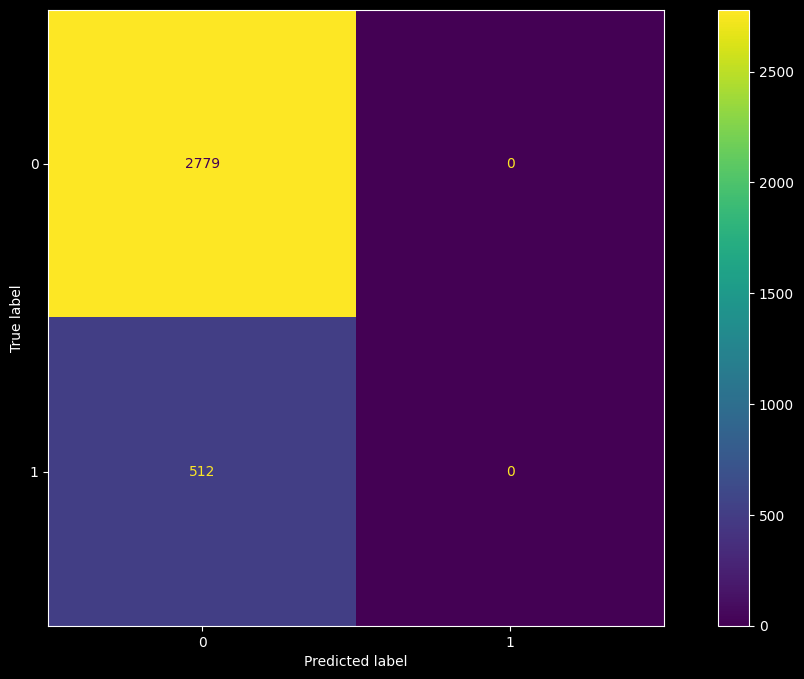

In [125]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Model Accuracy Visualization for Various K Values

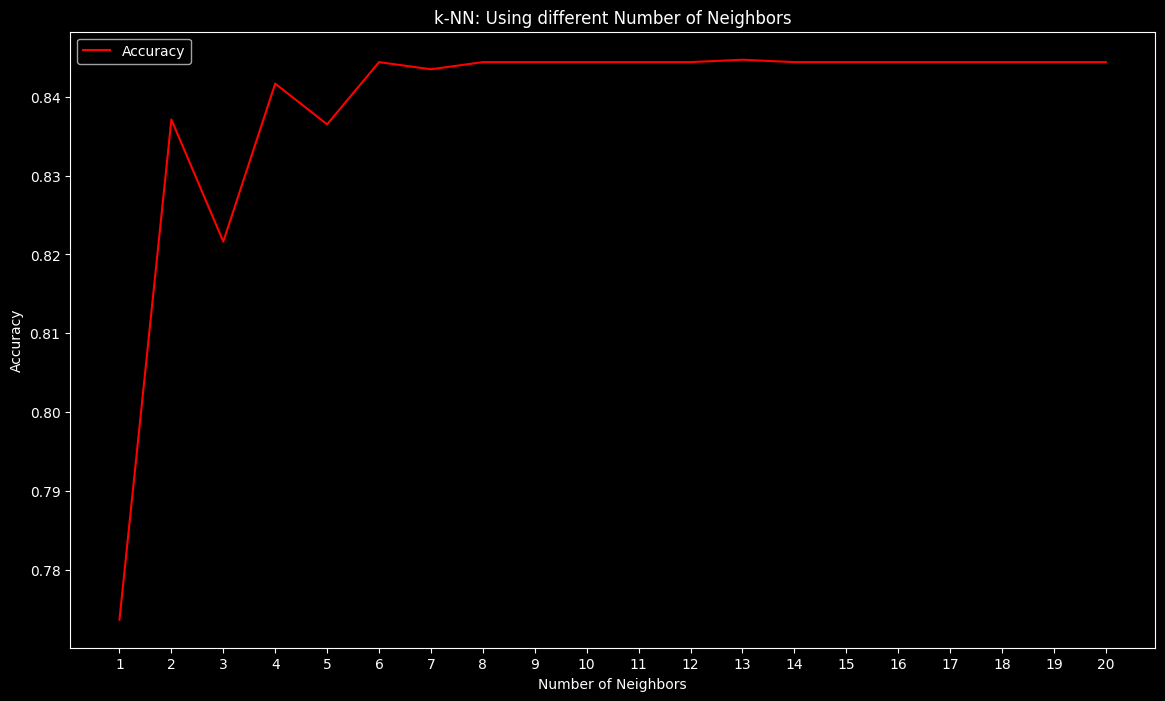

In [126]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

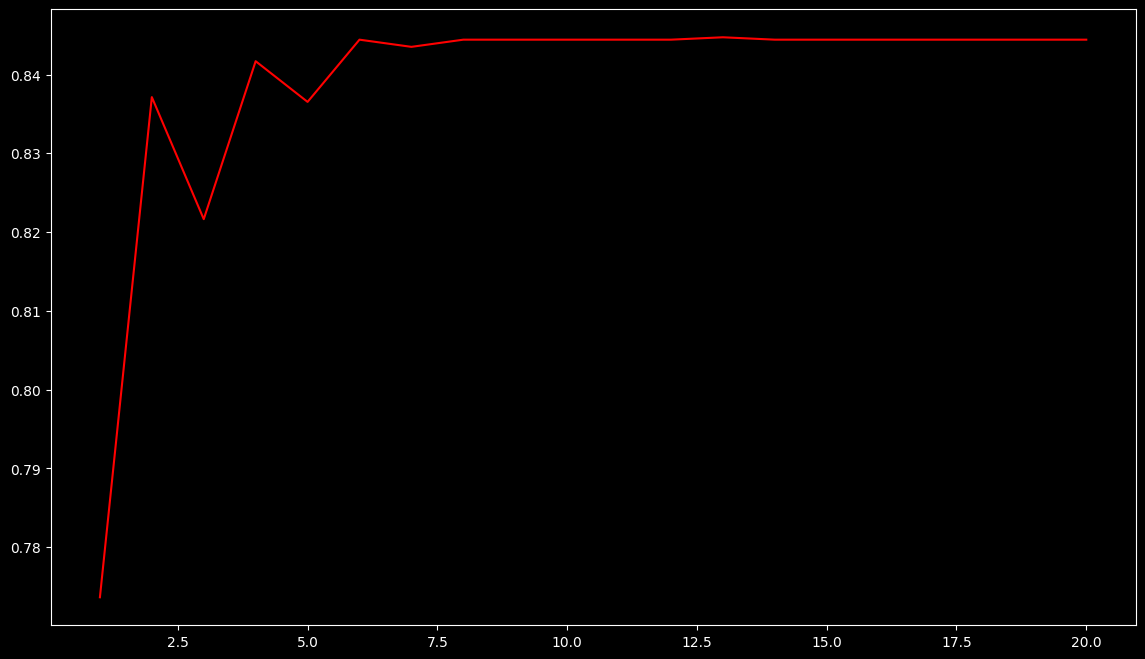

In [127]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

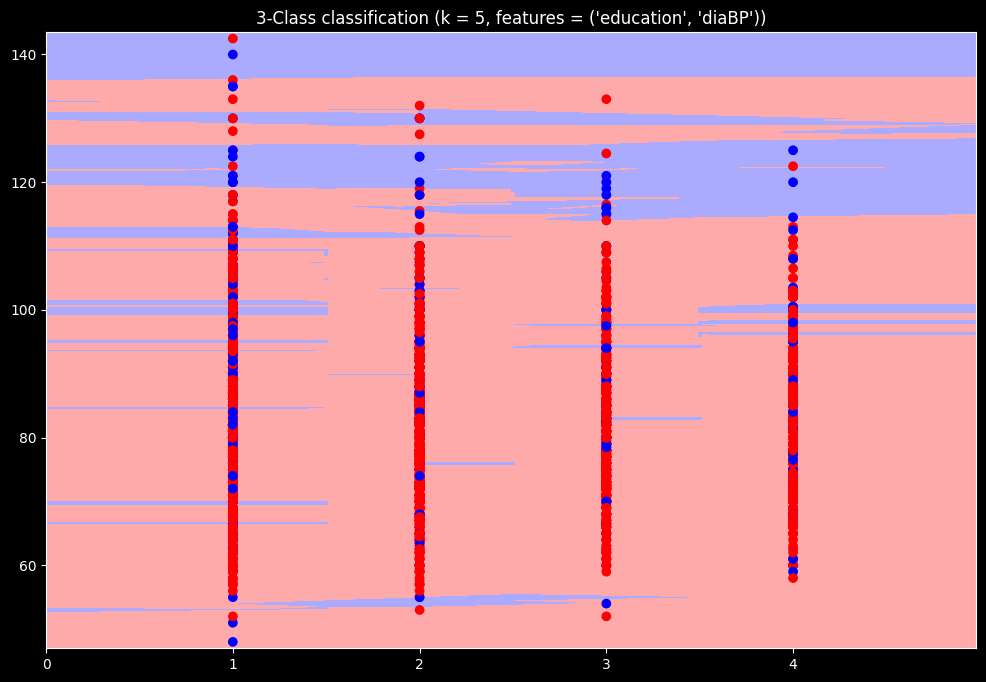

In [128]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [129]:
# Prints the first 10 rows of the DataFrame
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0       0                0   
1     0   46        2.0              0         0.0       0                0   
2     1   48        1.0              1        20.0       0                0   
3     0   61        3.0              1        30.0       0                0   
4     0   46        3.0              1        23.0       0                0   
5     0   43        2.0              0         0.0       0                0   
6     0   63        1.0              0         0.0       0                0   
7     0   45        2.0              1        20.0       0                0   
8     1   52        1.0              0         0.0       0                0   
9     1   43        1.0              1        30.0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [130]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
656      1   51        1.0              1        20.0       0   
2716     1   62        4.0              0         0.0       0   
2312     0   44        1.0              1         5.0       0   
3428     1   39        1.0              1        40.0       0   
1185     1   46        1.0              0         0.0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
656                 0             0         0    243.0  130.0   86.5  29.86   
2716                0             1         0    240.0  152.0   95.0  25.37   
2312                0             0         0    205.0  120.0   83.5  24.30   
3428                0             1         0    215.0  145.5   92.5  28.35   
1185                0             0         0    205.0  118.0   76.5  23.48   

      heartRate  glucose  
656        85.0     74.0  
2716       63.0     70.0  
2312       67.0     77.0  
3428       75.0     94.0  
1185       75.0     77.0

In [131]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

3720    0
3348    1
2305    0
970     1
4126    0
Name: TenYearCHD, dtype: int64

In [132]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

[[1.         0.18421053 1.         0.         0.         0.
  0.         0.         0.         0.16837782 0.10638298 0.23280423
  0.27702375 0.36363636 0.10451977]]


In [133]:
# Prints the range of values in the X table
(X.max() - X.min())

np.float64(1.0000000000000002)

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [136]:
# Trains the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [139]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

Η ακρίβεια του μοντέλου KNN είναι 83.01%


<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [140]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

Η νέα παρατήρηση είναι [0, 59, 2, 0, 58, 0, 1, 0, 0, 552, 155, 52, 42, 127, 195]
Η πρόβλεψη για τη νέα παρατήρηση είναι [0]


<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

Sample 0:
[1.         0.18421053 1.         0.         0.         0.
 0.         0.         0.         0.16837782 0.10638298 0.23280423
 0.27702375 0.36363636 0.10451977]
Predicted probabilities: [0.8 0.2]


Sample 2:
[1.         0.42105263 0.         1.         0.28571429 0.
 0.         0.         0.         0.27104723 0.20803783 0.33862434
 0.23751818 0.31313131 0.08474576]
Predicted probabilities: [0.8 0.2]


Sample 3:
[0.         0.76315789 0.66666667 1.         0.42857143 0.
 0.         1.         0.         0.22997947 0.3144208  0.4973545
 0.3160446  0.21212121 0.1779661 ]
Predicted probabilities: [0.6 0.4]


Sample 5:
[0.         0.28947368 0.33333333 0.         0.         0.
 0.         1.         0.         0.23613963 0.45626478 0.65608466
 0.35773146 0.33333333 0.16666667]
Predicted probabilities: [0.8 0.2]


Sample 7:
[0.         0.34210526 0.33333333 1.         0.28571429 0.
 0.         0.         0.         0.41067762 0.07801418 0.24338624
 0.14881241 0.35353535 0.10734463

<span style="color:orange">Probabilities of each class for each sample in a results table

In [142]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

      Sample  male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0          0   1.0  39.0        4.0            0.0         0.0     0.0   
1          1   0.0  46.0        2.0            0.0         0.0     0.0   
2          2   1.0  48.0        1.0            1.0        20.0     0.0   
3          3   0.0  61.0        3.0            1.0        30.0     0.0   
4          4   0.0  46.0        3.0            1.0        23.0     0.0   
...      ...   ...   ...        ...            ...         ...     ...   
3639    3651   1.0  58.0        3.0            0.0         0.0     0.0   
3640    3652   1.0  68.0        1.0            0.0         0.0     0.0   
3641    3653   1.0  50.0        1.0            1.0         1.0     0.0   
3642    3654   1.0  51.0        3.0            1.0        43.0     0.0   
3643    3655   0.0  52.0        2.0            0.0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0           

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

# <span style="color:lime">KNN METHOD GRAPHS (test_size=0.9)

 <span style="color:orange">Confusion Matrix

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Model Accuracy Visualization for Various K Values

In [ ]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

In [ ]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

In [ ]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [ ]:
# Prints the first 10 rows of the DataFrame
df.head(10)

In [ ]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

In [ ]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

In [ ]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

In [ ]:
# Prints the range of values in the X table
(X.max() - X.min())

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Trains the classifier
knn.fit(X_train, y_train)

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [ ]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

<span style="color:orange">Probabilities of each class for each sample in a results table

In [ ]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

# <span style="color:lime">KNN METHOD GRAPHS (test_size=0.7)

 <span style="color:orange">Confusion Matrix

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Model Accuracy Visualization for Various K Values

In [ ]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

In [ ]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

In [ ]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [ ]:
# Prints the first 10 rows of the DataFrame
df.head(10)

In [ ]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

In [ ]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

In [ ]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

In [ ]:
# Prints the range of values in the X table
(X.max() - X.min())

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Trains the classifier
knn.fit(X_train, y_train)

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [ ]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

<span style="color:orange">Probabilities of each class for each sample in a results table

In [ ]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

# <span style="color:lime">KNN METHOD GRAPHS (test_size=0.7)

 <span style="color:orange">Confusion Matrix

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Model Accuracy Visualization for Various K Values

In [ ]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

In [ ]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

In [ ]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [ ]:
# Prints the first 10 rows of the DataFrame
df.head(10)

In [ ]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

In [ ]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

In [ ]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

In [ ]:
# Prints the range of values in the X table
(X.max() - X.min())

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Trains the classifier
knn.fit(X_train, y_train)

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [ ]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

<span style="color:orange">Probabilities of each class for each sample in a results table

In [ ]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

# <span style="color:lime">KNN METHOD GRAPHS (test_size=0.7)

 <span style="color:orange">Confusion Matrix

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Model Accuracy Visualization for Various K Values

In [ ]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

In [ ]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

In [ ]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">KNN METHOD FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:orange">K-Nearest Neighbors (KNN) Model 

In [ ]:
# Prints the first 10 rows of the DataFrame
df.head(10)

In [ ]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

In [ ]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

In [ ]:
# These commands normalize the data, transforming it to a scale between -1 and 1, and then to a scale between 0 and 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Display the first 5 rows of the normalized X table
print(X[:1])

In [ ]:
# Prints the range of values in the X table
(X.max() - X.min())

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Trains the classifier
knn.fit(X_train, y_train)

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Prints the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy*100:.2f}%")

<span style="color:orange">Incorporating a new observation into the KNN model for class prediction

In [ ]:
# Creates a DataFrame without the 'TenYearCHD' column
df_without_target = df.drop(columns=['TenYearCHD'])

# Creates the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the classifier
knn.fit(X_train, y_train)

# Generates a new random row with integer values
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Converts the new observation to a 2D array
new_observation = np.array(new_row).reshape(1, -1)

# Pre-processes the new observation
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Predicts the class of the new observation
prediction = knn.predict(new_observation)

print(f"The new observation is {new_row}")
print(f"The prediction for the new observation is {prediction}")

<span style="color:orange">Probabilities of each class for each sample and insertion into a DataFrame

In [ ]:
# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Prints these samples and their corresponding probabilities
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

<span style="color:orange">Probabilities of each class for each sample in a results table

In [ ]:
# Selects all features except the last for X and the last for y
X = df.iloc[:, :-1].values
y = df['TenYearCHD'].values

# Gets the predicted probabilities for each sample
probabilities = knn.predict_proba(X)

# Finds the indices of the samples where the maximum probability is not 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Initializes an empty DataFrame to store the results and excludes the target column 'TenYearCHD' from the columns
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['TenYearCHD']).columns) + ["Predicted Probabilities"])

# Repeats for each index
for i in indices[0]:
    # Adds the sample index, features, and predicted probabilities to the DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Prints the results DataFrame
print(results_df)

<span style="color:orange">Calculation and Printing of Performance Metrics for the KNN Model

In [ ]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculates the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculates the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

# Calculates the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area under the ROC curve: {roc_auc*100:.2f}%")

<span style="color:orange">Confusion Matrix

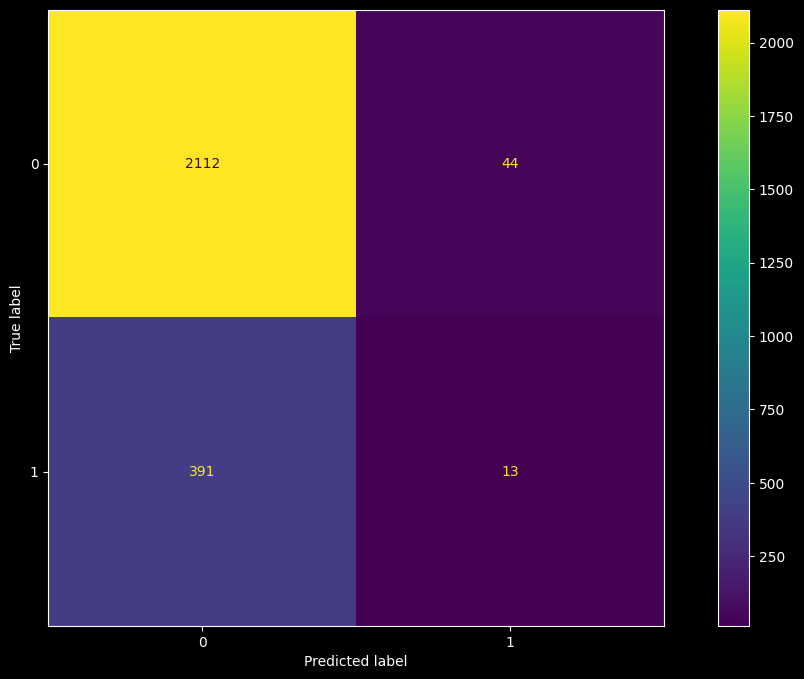

In [144]:
# Predicts the values for the test data
y_pred = knn.predict(X_test)

# Creates the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:orange">Optimal K Value for KNN Classifier through Iterative Testing

In [145]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Displays all accuracies
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for K={i}: {accuracy*100:.2f}%")

# Finds the K value that gives the best accuracy
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nThe best K value is {best_k} with an accuracy of {max(accuracies)*100:.2f}%")

Ακρίβεια για K=1: 77.50%
Ακρίβεια για K=2: 83.36%
Ακρίβεια για K=3: 81.95%
Ακρίβεια για K=4: 83.87%
Ακρίβεια για K=5: 83.16%
Ακρίβεια για K=6: 83.95%
Ακρίβεια για K=7: 84.06%
Ακρίβεια για K=8: 84.26%
Ακρίβεια για K=9: 84.06%
Ακρίβεια για K=10: 84.10%
Ακρίβεια για K=11: 84.10%
Ακρίβεια για K=12: 84.22%
Ακρίβεια για K=13: 84.22%
Ακρίβεια για K=14: 84.26%
Ακρίβεια για K=15: 84.18%
Ακρίβεια για K=16: 84.18%
Ακρίβεια για K=17: 84.18%
Ακρίβεια για K=18: 84.26%
Ακρίβεια για K=19: 84.22%
Ακρίβεια για K=20: 84.22%

Η καλύτερη τιμή για το K είναι 8 με ακρίβεια 84.26%


<span style="color:orange">Model Accuracy Visualization for Various K Values

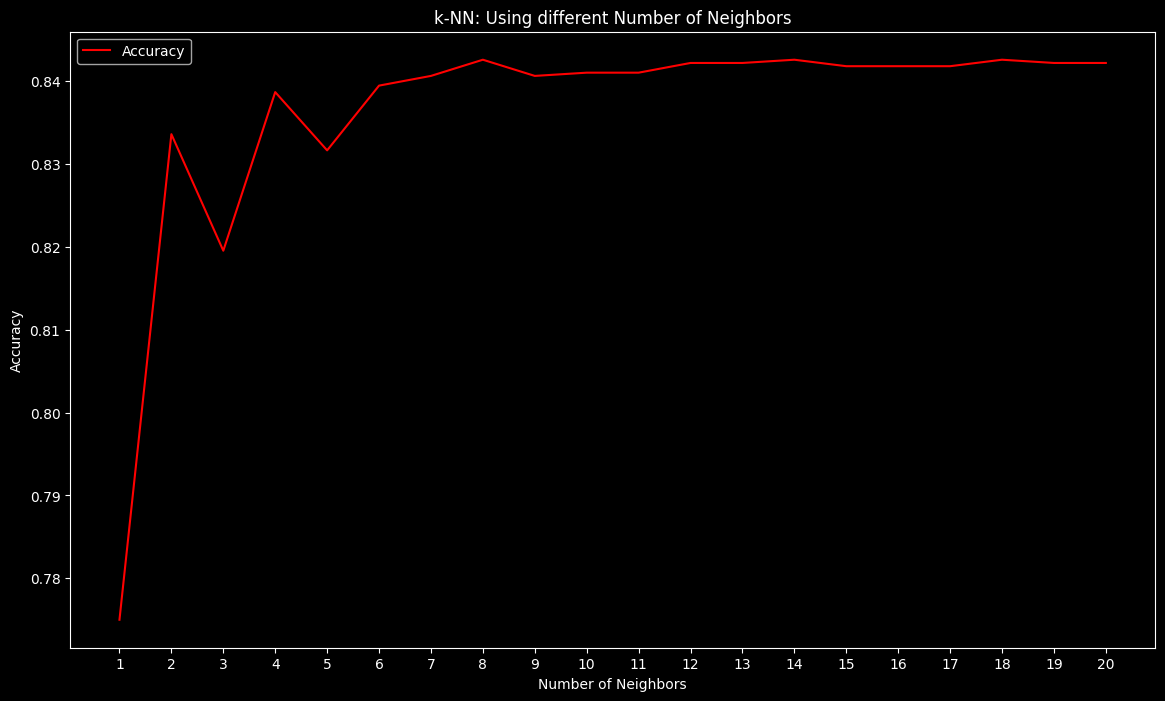

In [146]:
# Creates a list to store accuracies
accuracies = []

# Tests various K values
for k in range(1, 21):
    # Creates the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trains the classifier
    knn.fit(X_train, y_train)

    # Predicts the values for the test data
    y_pred = knn.predict(X_test)

    # Calculates the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adds the accuracy to the list
    accuracies.append(accuracy)

# Assuming 'neighbors' list contains K values and 'accuracies' list contains corresponding accuracies
neighbors = list(range(1, 21))  # This already has the actual K values
accuracies = accuracies  # This already has the actual accuracy values

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Adds a black grid
plt.grid(color='black')

plt.show()

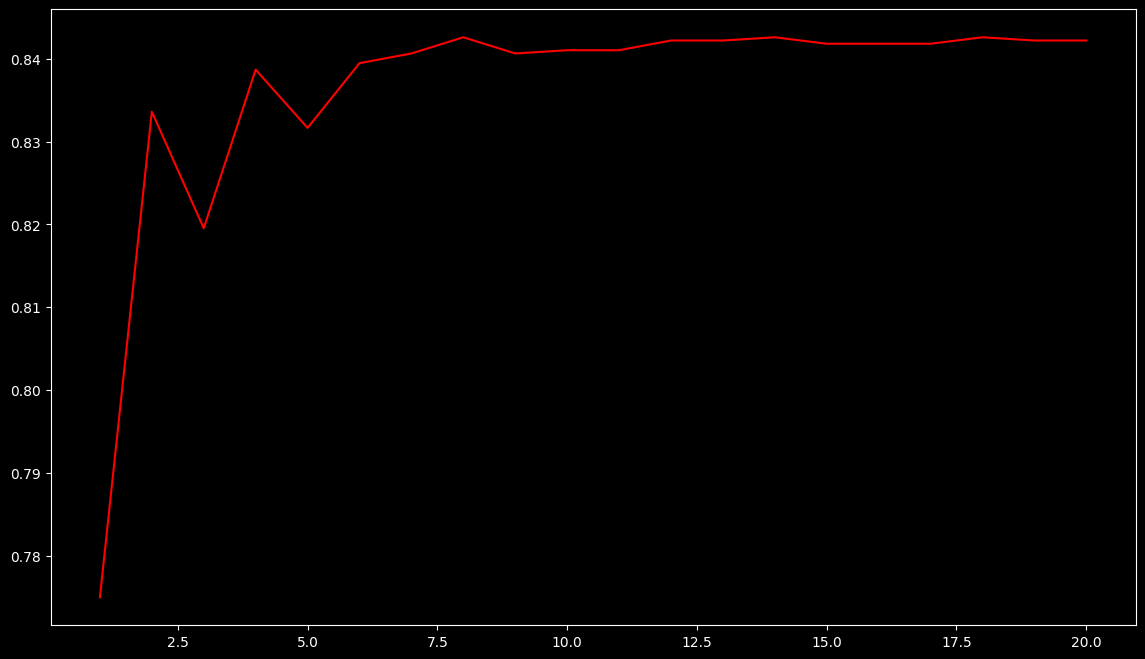

In [147]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

<span style="color:orange">Decision Boundary Visualization of the KNN Classifier with Random Features

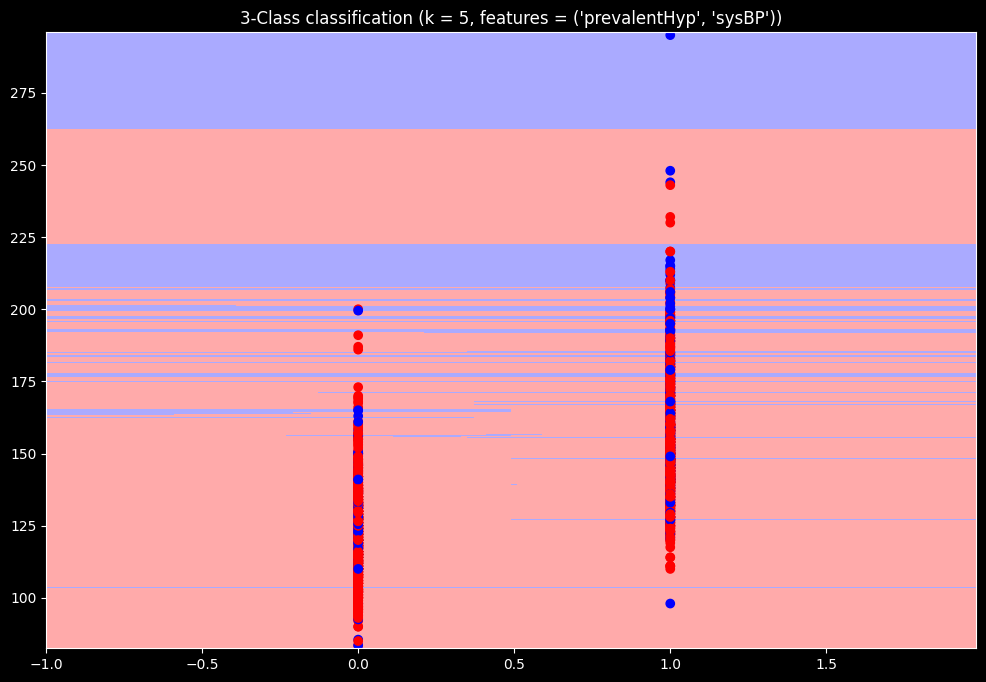

In [148]:
# List of all column names except 'TenYearCHD'
feature_columns = df.columns[:-1].tolist()

# Creates all possible combinations of features
feature_combinations = list(combinations(feature_columns, 2))

# Randomly selects a combination
combination = random.choice(feature_combinations)

# Selects the two features
X = df[list(combination)].values
y = df['TenYearCHD'].values

h = .02  # step size in the mesh

# Creates an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Trains the model with the training data
knn.fit(X, y)

# Creates color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plots the decision boundaries. For this, it assigns a color to each point in the grid [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Puts the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Also plots the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:lime">NBC (Naive Bayes Classifier) FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.9)

In [149]:
# Prints the first 10 rows of the DataFrame
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0       0                0   
1     0   46        2.0              0         0.0       0                0   
2     1   48        1.0              1        20.0       0                0   
3     0   61        3.0              1        30.0       0                0   
4     0   46        3.0              1        23.0       0                0   
5     0   43        2.0              0         0.0       0                0   
6     0   63        1.0              0         0.0       0                0   
7     0   45        2.0              1        20.0       0                0   
8     1   52        1.0              0         0.0       0                0   
9     1   43        1.0              1        30.0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [150]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
553      1   53        1.0              0         0.0       0   
3394     0   57        4.0              1         9.0       0   
377      1   67        1.0              0         0.0       0   
2611     1   49        1.0              1        20.0       0   
1731     1   58        2.0              0         0.0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
553                 0             1         0    240.0  174.5  103.0  29.82   
3394                0             0         0    382.0  140.0   94.0  21.20   
377                 0             0         0    203.0  122.0   74.0  15.54   
2611                0             0         0    288.0  128.0   89.0  35.96   
1731                0             1         0    241.0  151.0  102.0  26.00   

      heartRate  glucose  
553        81.0     74.0  
3394       98.0     70.0  
377        96.0     79.0  
2611       73.0     75.0  
1731       65.0     90.0

In [151]:
# Shows the data type of the X table
type(X)

pandas.core.frame.DataFrame

In [152]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

1350    1
1559    0
3022    1
803     0
1934    0
Name: TenYearCHD, dtype: int64

In [153]:
# Shows the data type of the y table
type(y)

pandas.core.series.Series

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [ ]:
# Creates the Naive Bayes classifier
gnb = GaussianNB()

In [156]:
# Trains the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicts the values for the test data
y_pred = gnb.predict(X_test)

In [158]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Ακρίβεια του μοντέλου: 80.95%


In [159]:
# Prints the count of mislabeled variables
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3291 points : 627


In [160]:
# The percentage of mislabeled points not explained by the model
627/3291

0.19051959890610756

# <span style="color:lime">NBC METHOD GRAPHS 

<span style="color:orange">Confusion Matrix

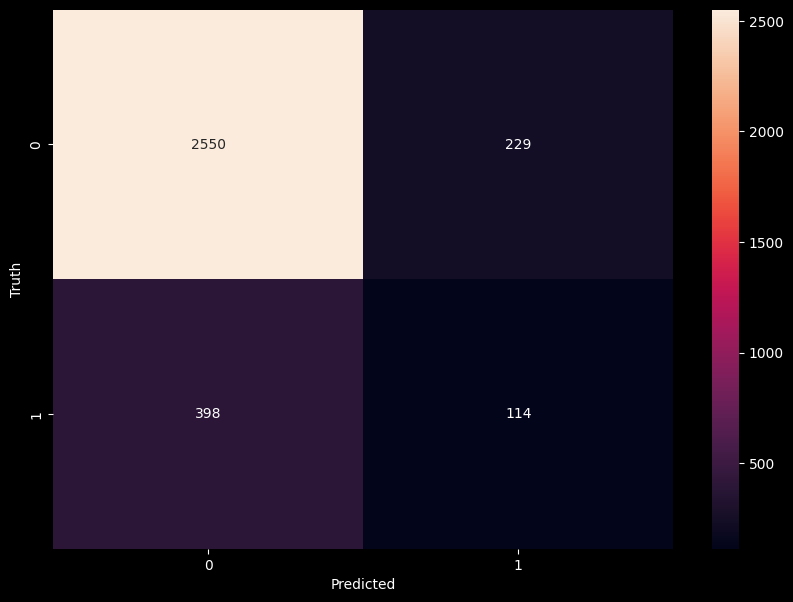

In [161]:
# Assumes y_test are the true values and y_pred are the predicted values
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<span style="color:orange">ROC Curve (Receiver Operating Characteristic)

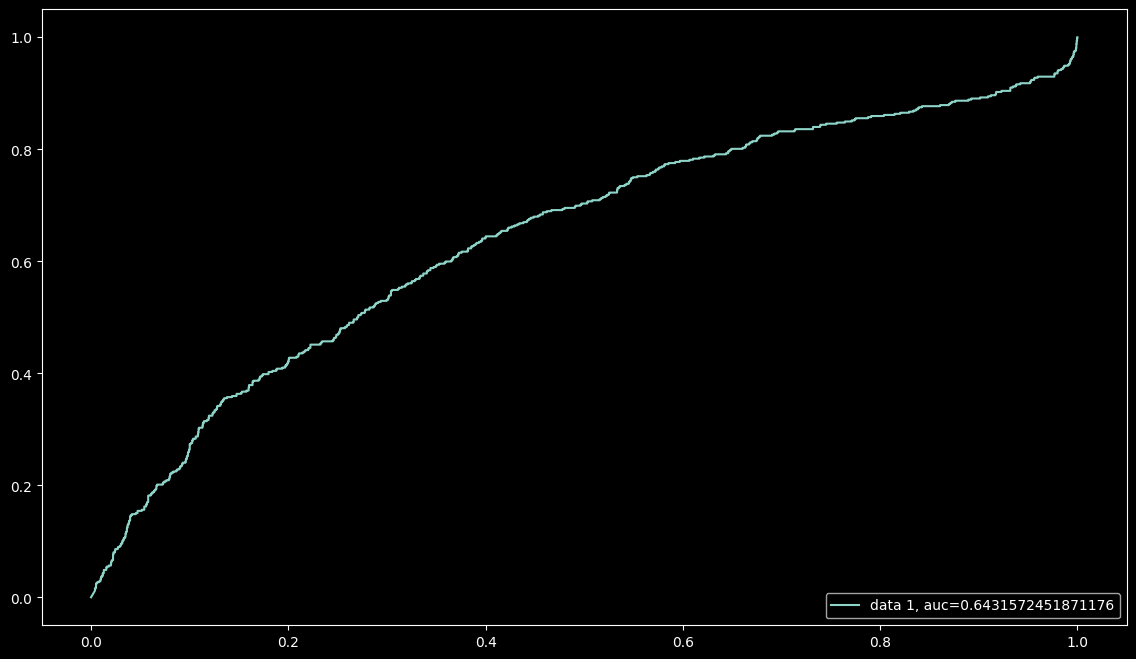

In [162]:
# Calculates probabilities for predictions
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Calculates the ROC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# Calculates the area under the ROC Curve
roc_auc = auc(fpr, tpr)

# Plots the ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

<span style="color:orange">Precision-Recall Curve

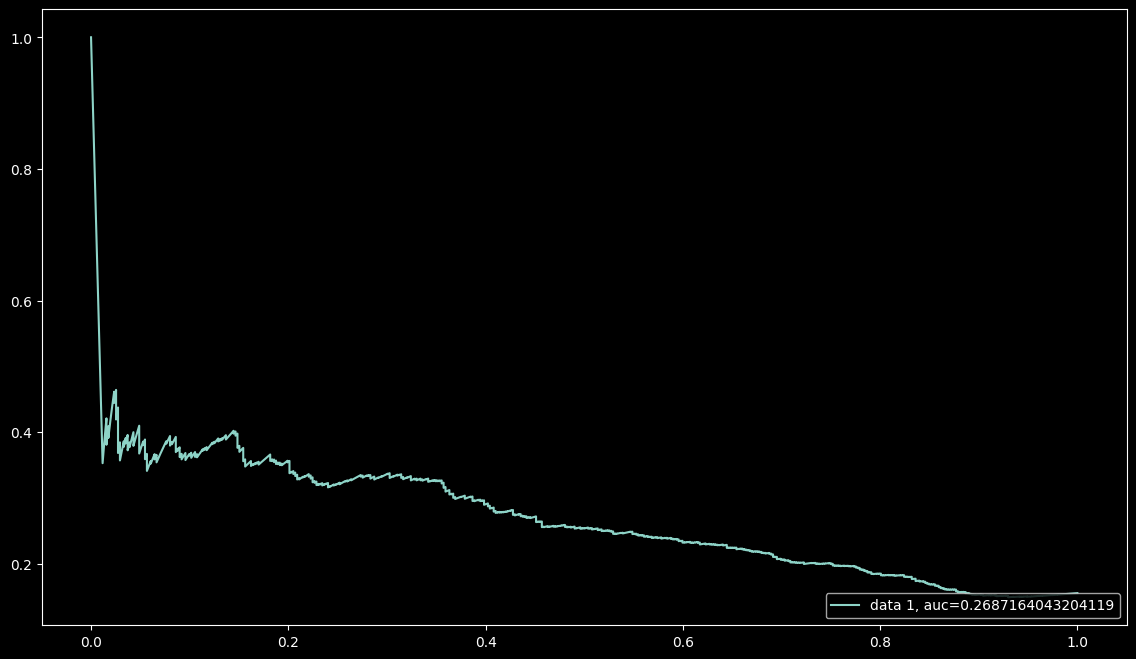

In [163]:
# Calculates probabilities for predictions
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Calculates the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

# Calculates the area under the Precision-Recall Curve
pr_auc = auc(recall, precision)

# Plots the Precision-Recall Curve
plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()

# <span style="color:lime">NBC (Naive Bayes Classifier) FOR PREDICTING THE LIKELIHOOD OF DEVELOPING CORONARY HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7)

In [164]:
# Prints the first 10 rows of the DataFrame
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0       0                0   
1     0   46        2.0              0         0.0       0                0   
2     1   48        1.0              1        20.0       0                0   
3     0   61        3.0              1        30.0       0                0   
4     0   46        3.0              1        23.0       0                0   
5     0   43        2.0              0         0.0       0                0   
6     0   63        1.0              0         0.0       0                0   
7     0   45        2.0              1        20.0       0                0   
8     1   52        1.0              0         0.0       0                0   
9     1   43        1.0              1        30.0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [165]:
# Uses all columns except the last as features
X = df.iloc[:, :-1]

# Prints the first 5 rows of the X table
X.sample(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3075     1   37        3.0              0         0.0       0   
20       0   42        2.0              1        30.0       0   
3652     0   41        3.0              1        15.0       0   
1204     1   46        3.0              0         0.0       0   
3869     0   64        2.0              0         0.0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3075                0             0         0    257.0  105.0   70.0  31.47   
20                  0             0         0    190.0  108.0   70.5  21.59   
3652                0             1         0    268.0  140.0   92.5  24.71   
1204                0             1         0    256.0  138.0  105.0  26.97   
3869                0             1         0    279.0  172.0   87.0  24.01   

      heartRate  glucose  
3075       75.0     80.0  
20         72.0     85.0  
3652       75.0     90.0  
1204       98.0    100.0  
3869       80.0     70.0

In [166]:
# Shows the data type of the X table
type(X)

pandas.core.frame.DataFrame

In [167]:
# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD']

# Prints the first 5 rows of the y table
y.sample(5)

3757    0
845     0
1367    0
1183    1
3598    0
Name: TenYearCHD, dtype: int64

In [168]:
# Shows the data type of the y table
type(y)

pandas.core.series.Series

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Creates the Naive Bayes classifier
gnb = GaussianNB()

In [171]:
# Trains the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicts the values for the test data
y_pred = gnb.predict(X_test)

In [173]:
# Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Ακρίβεια του μοντέλου: 82.19%


In [174]:
# Prints the count of mislabeled variables
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 2560 points : 456


In [175]:
# The percentage of mislabeled points not explained by the model
627/3291

0.19051959890610756

# <span style="color:lime">NBC METHOD GRAPHS 

<span style="color:orange">Confusion Matrix

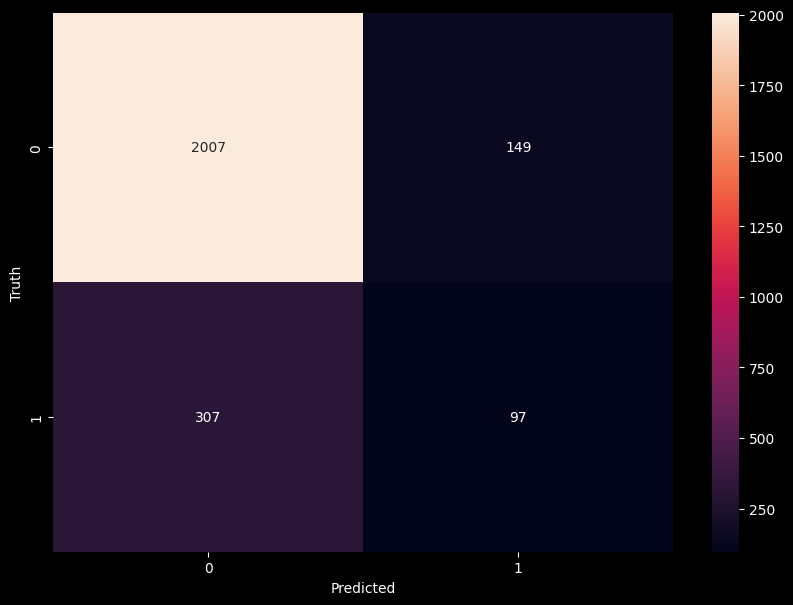

In [176]:
# Assumes y_test are the true values and y_pred are the predicted values
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<span style="color:orange">ROC Curve (Receiver Operating Characteristic)

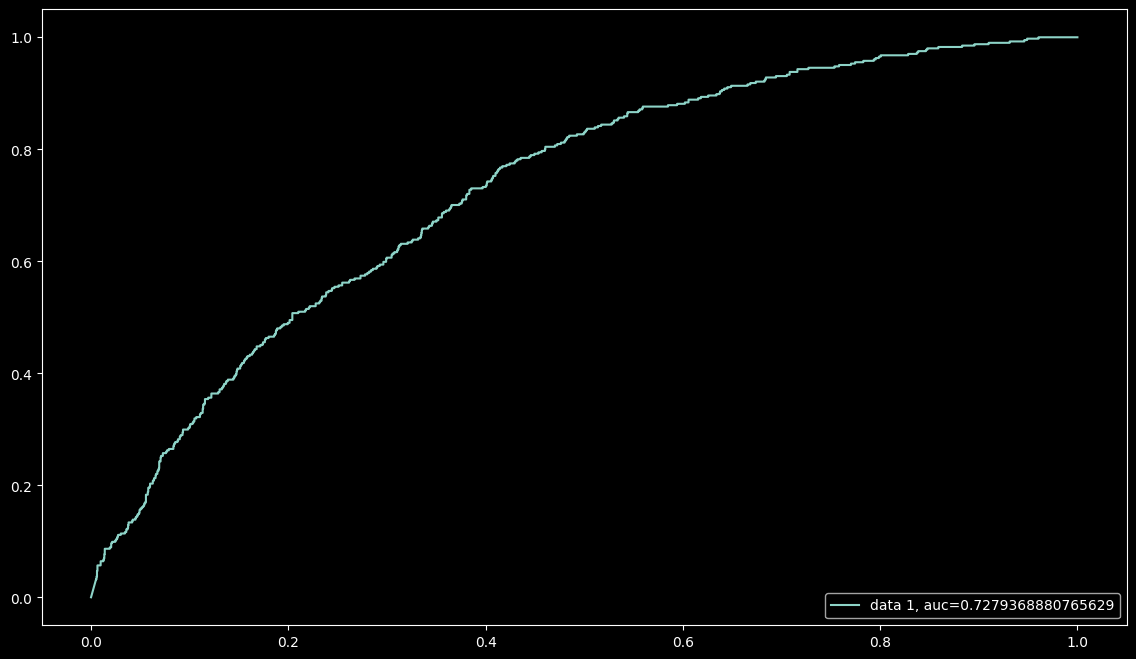

In [177]:
# Calculates probabilities for predictions
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Calculates the ROC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# Calculates the area under the ROC Curve
roc_auc = auc(fpr, tpr)

# Plots the ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

<span style="color:orange">Precision-Recall Curve

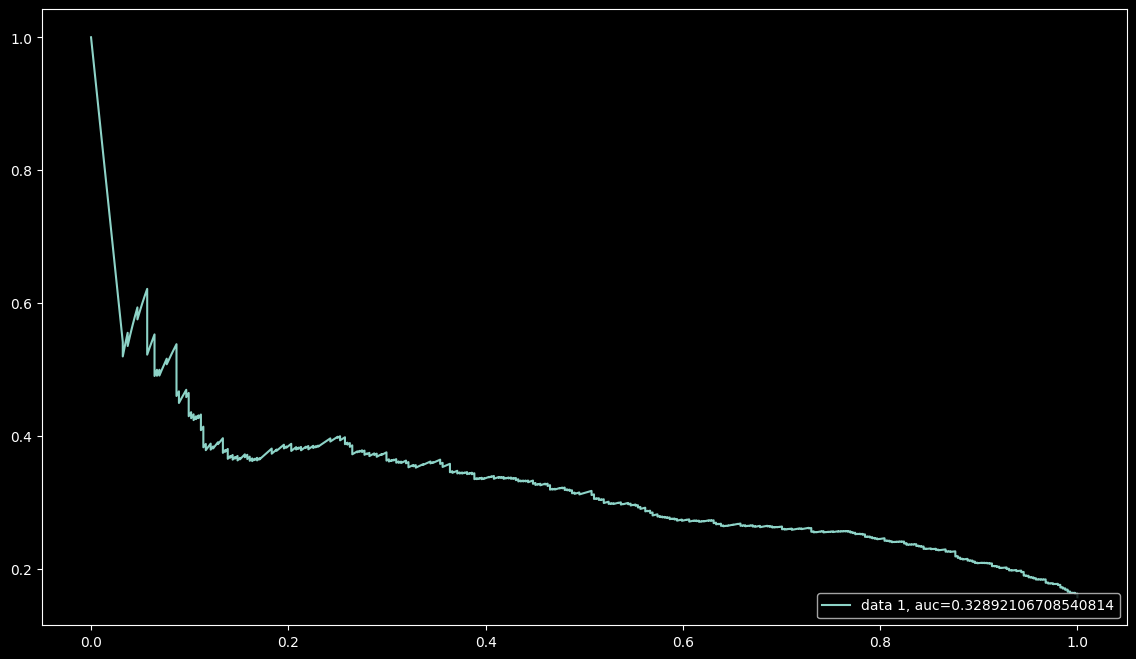

In [178]:
# Calculates probabilities for predictions
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Calculates the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

# Calculates the area under the Precision-Recall Curve
pr_auc = auc(recall, precision)

# Plots the Precision-Recall Curve
plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()

# <span style="color:lime">SUPPORT VECTOR MACHINES (SVM) FOR PREDICTING THE LIKELIHOOD OF DEVELOPING HEART DISEASE IN THE NEXT DECADE (SCI-KIT LEARN, TEST_SIZE=0.7)

 <span style="color:orange">Support Vector Machines (SVM) Model

In [ ]:
# Uses all columns except the last as features
X = df.iloc[:, :-1].values

# Uses the 'TenYearCHD' column as the target variable
y = df['TenYearCHD'].values

In [ ]:
# Creates the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=13)),  # feature selection
    ('svc', SVC())
])

In [ ]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Sets the parameter grid for SVC and SelectKBest
param_dist = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear'],
    'feature_selection__k': [10, 11, 12, 13],
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

In [ ]:
# Applies k-fold cross-validation using RandomizedSearchCV on the pipeline
cv = KFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, n_jobs=-1)

In [184]:
# Trains the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('feature_selection',
                                              SelectKBest(k=13)),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'feature_selection__k': [10, 11, 12,
                                                                 13],
                                        'scaler': [StandardScaler(),
                                                   MinMaxScaler(),
                                                   RobustScaler()],
                                        'svc__C': [0.1, 1, 10, 100],
                                        'svc__gamma': [1, 0.1, 0.01, 0.001],
                                        'svc__kernel': ['rbf', 'linear']})

<span style="color:orange">Analysis and Visualization of Parameter Optimization Results with RandomizedSearchCV

In [185]:
# Converts cv_results_ to DataFrame
cv_results_df = pd.DataFrame(random_search.cv_results_)

# Selects columns related to parameters and mean test score (accuracy)
results_df = cv_results_df.loc[:, ['params', 'mean_test_score']]

# Converts 'params' column to separate columns
params_df = pd.json_normalize(results_df['params'])

# Merges parameters DataFrame and accuracy column
results_df = pd.concat([params_df, results_df['mean_test_score']], axis=1)

# Renames 'mean_test_score' column to 'Accuracy'
results_df.rename(columns={'mean_test_score': 'Accuracy'}, inplace=True)

# Prints the DataFrame
results_df.sort_values(by="Accuracy", ascending=False)

svc__kernel  svc__gamma  svc__C            scaler  feature_selection__k  \
0         rbf    1.00e+00     1.0  StandardScaler()                    13   
1      linear    1.00e-03     1.0    MinMaxScaler()                    10   
2         rbf    1.00e-03    10.0    RobustScaler()                    11   
3         rbf    1.00e-01     0.1    RobustScaler()                    13   
4      linear    1.00e-01     1.0  StandardScaler()                    10   
6         rbf    1.00e-01     0.1    RobustScaler()                    10   
9      linear    1.00e-01     0.1    MinMaxScaler()                    13   
7      linear    1.00e+00    10.0    MinMaxScaler()                    12   
8         rbf    1.00e+00    10.0    MinMaxScaler()                    12   
5         rbf    1.00e-02    10.0    RobustScaler()                    12   

   Accuracy  
0      0.86  
1      0.86  
2      0.86  
3      0.86  
4      0.86  
6      0.86  
9      0.86  
7      0.86  
8      0.86  
5      0.86

In [186]:
# Prints the best parameters found by RandomizedSearchCV
print("Best parameters: ", random_search.best_params_)

Καλύτερες παράμετροι:  {'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__C': 1, 'scaler': StandardScaler(), 'feature_selection__k': 13}


<span style="color:orange">Hyperparameter Tuning for SVC and RandomForest

In [ ]:
# Defines two pipelines
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('feature_selection', SelectKBest(score_func=f_classif, k=13)),
    ('svc', SVC())  # SVC classifier
])

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('feature_selection', SelectKBest(score_func=f_classif, k=13)),
    ('rf', RandomForestClassifier())  # Random Forest classifier
])

# Sets the parameter grids
param_grid_svc = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear'],
    'feature_selection__k': [10, 11, 12, 13],
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

param_grid_rf = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'feature_selection__k': [10, 11, 12, 13],
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

# Creates RandomizedSearchCV objects
random_svc = RandomizedSearchCV(pipe_svc, param_grid_svc, n_iter=100, cv=cv, n_jobs=-1)
random_rf = RandomizedSearchCV(pipe_rf, param_grid_rf, n_iter=100, cv=cv, n_jobs=-1)

<span style="color:orange">Analysis of Hyperparameter Optimization Results for SVC and RandomForest

In [188]:
# Trains the RandomizedSearchCV object for SVC
random_svc.fit(X_train, y_train)

# Converts cv_results_ to DataFrame
cv_results_df = pd.DataFrame(random_svc.cv_results_)

# Selects columns related to parameters and mean test score (accuracy)
results_df = cv_results_df.loc[:, ['params', 'mean_test_score']]

# Converts 'params' column to separate columns
params_df = pd.json_normalize(results_df['params'])

# Merges parameters DataFrame and accuracy column
results_df = pd.concat([params_df, results_df['mean_test_score']], axis=1)

# Renames 'mean_test_score' column to 'Accuracy'
results_df.rename(columns={'mean_test_score': 'Accuracy'}, inplace=True)

# Prints the DataFrame
print(results_df.sort_values(by="Accuracy", ascending=False).head(6))

   svc__kernel  svc__gamma  svc__C            scaler  feature_selection__k  \
72         rbf    1.00e-02   100.0    RobustScaler()                    12   
44         rbf    1.00e-01     1.0  StandardScaler()                    10   
43         rbf    1.00e-01     1.0    RobustScaler()                    11   
24         rbf    1.00e-01   100.0    MinMaxScaler()                    12   
56         rbf    1.00e-01   100.0    MinMaxScaler()                    11   
29      linear    1.00e-03    10.0  StandardScaler()                    11   

    Accuracy  
72      0.86  
44      0.86  
43      0.86  
24      0.86  
56      0.86  
29      0.86  


# <span style="color:lime">SVM METHOD GRAPHS 

In [ ]:
# Assumes X and y are the features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Creates an instance of SVC with probability computation
svc = SVC(probability=True)

# Trains the model with the training data
svc.fit(X_train, y_train)

# Predicts the values for the test data
y_pred = svc.predict(X_test)

# Computes the decision function for the test data
y_score = svc.decision_function(X_test)

<span style="color:orange">Confusion Matrix

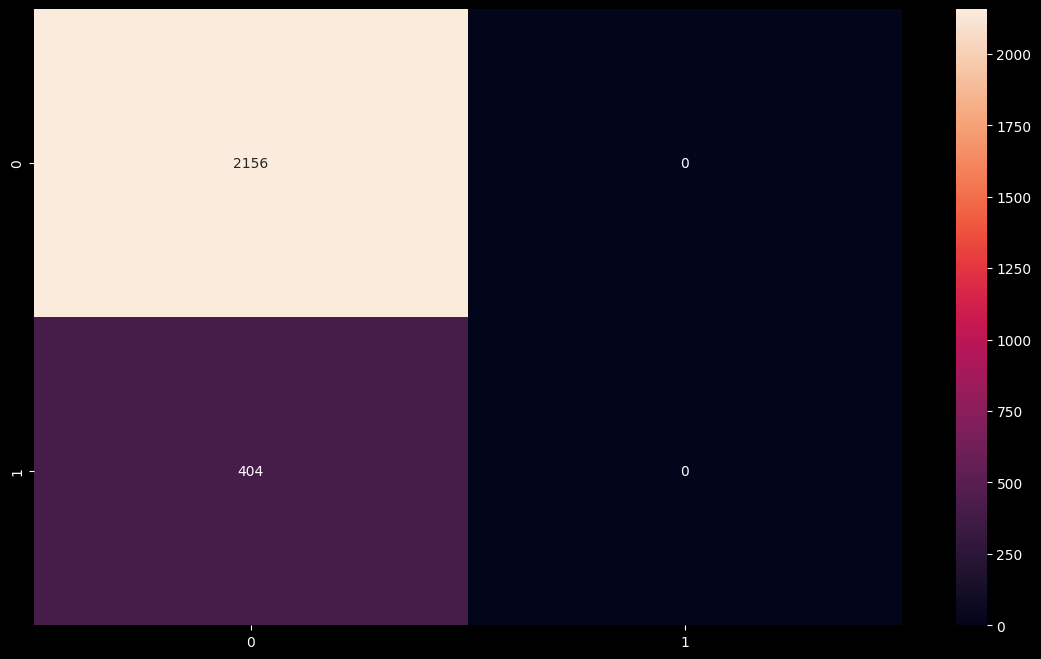

In [190]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<span style="color:orange">ROC Curve

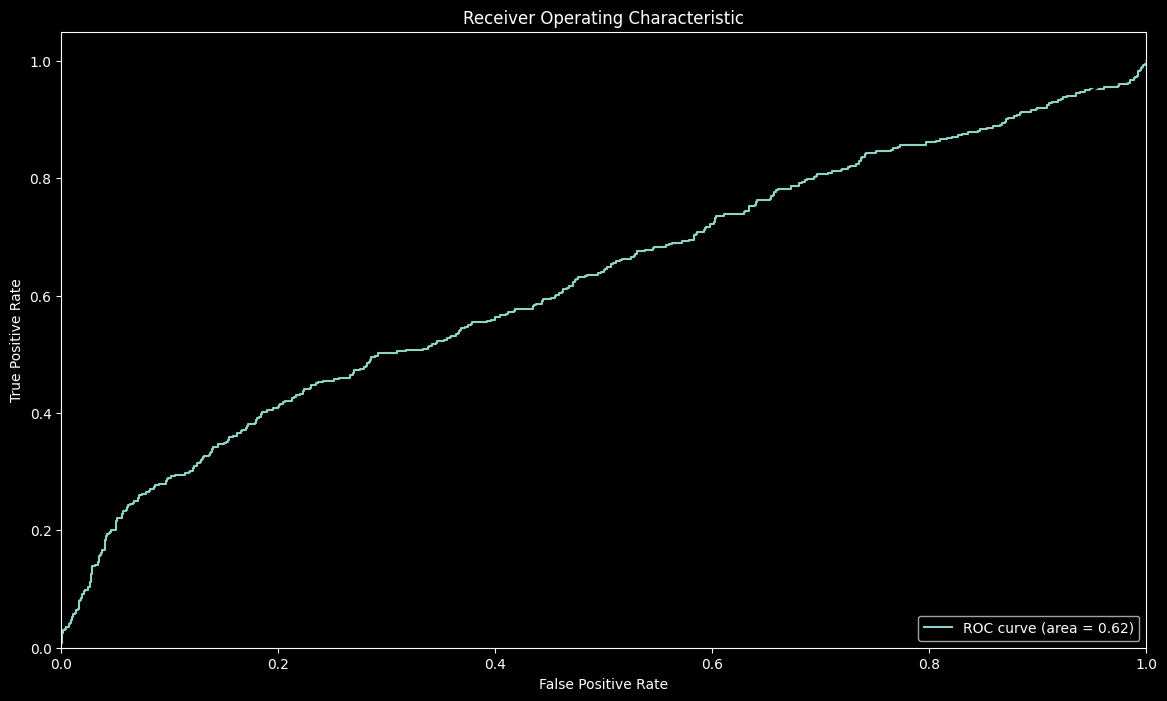

In [191]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<span style="color:orange">Precision-Recall Curve

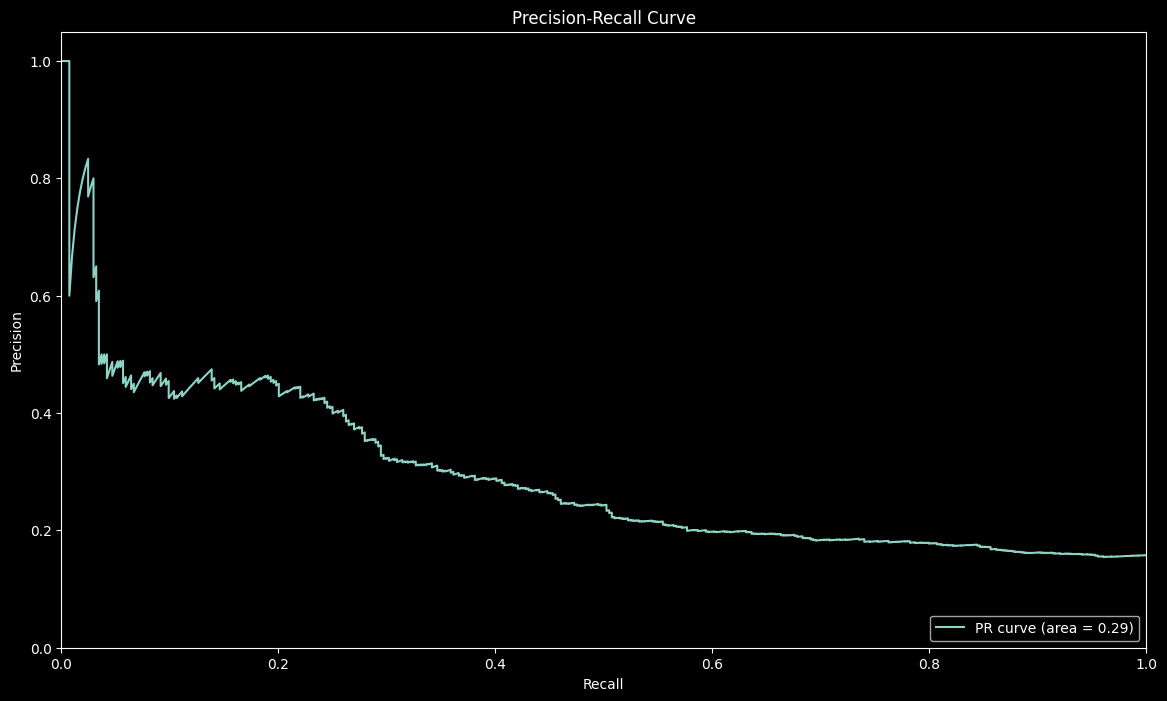

In [192]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# <span style="color:lime">SOM (Self- Organizing Maps) for predicting the likelihood of developing heart disease in the next decade (x_train= 250)

<span style="color:orange">Self-Organizing Maps Model 

In [ ]:
# Prepares the data
X = df.drop('TenYearCHD', axis=1).values
y = df['TenYearCHD'].values

In [ ]:
# Normalizes the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Creates the SOM
som = MiniSom(14, 14, X.shape[1], sigma=0.5, learning_rate=0.5)
# You can adjust the parameters

In [ ]:
# Trains the SOM
som.train_random(X, 250)  # You can adjust the number of epochs

In [211]:
# Prints the weights of the SOM
print(som.get_weights())

[[[-0.41547528  0.00558547  0.10018722 ...  0.00256709 -0.0543035
   -0.28523257]
  [ 0.15202408  0.01235151 -0.15045948 ... -0.08928773  0.07189716
    0.41890313]
  [ 0.30647774  0.32757795 -0.25464902 ...  0.12336664  0.35922632
   -0.33767143]
  ...
  [-0.31606154  0.1024756   0.19542671 ... -0.31879354 -0.26940582
   -0.19097755]
  [-0.13448369  0.27549374  0.09421979 ...  0.3600609  -0.29686379
   -0.27994039]
  [-0.21060535 -0.03654922  0.08694708 ... -0.04128983  0.06524353
   -0.22891609]]

 [[ 0.39048043  0.26168762 -0.0247409  ...  0.11464416  0.32625192
    0.19430003]
  [-0.39129686 -0.31058197  0.24283376 ...  0.3113569  -0.22154585
    0.00217847]
  [-0.29158849 -0.4083493  -0.34230847 ...  0.1362224  -0.37522666
   -0.33856105]
  ...
  [-0.21169637  0.26396936  0.29166326 ... -0.088969   -0.12087805
    0.31002357]
  [ 0.13042279 -0.29175208 -0.0833211  ...  0.01864261 -0.44979087
   -0.35527399]
  [-0.05930953 -0.37718149 -0.05115017 ...  0.36842336 -0.0588693
   -0.38

In [ ]:
# Groups the data
clusters = {}
for i, x in enumerate(X):
    w = som.winner(x)
    if w not in clusters:
        clusters[w] = []
    clusters[w].append(i)

In [ ]:
# Assigns neurons to class labels
labels_map = {}
for neuron, labels in clusters.items():
    most_common = Counter(labels).most_common(1)[0][0]
    labels_map[neuron] = most_common

In [214]:
# Prints the groups
for w, members in clusters.items():
    print(f"Neuron {w} includes samples {members}")

Neuron (np.int64(10), np.int64(2)) includes samples [0, 8, 18, 31, 34, 37, 44, 50, 56, 70, 78, 99, 101, 102, 104, 108, 111, 112, 113, 122, 126, 129, 132, 147, 149, 154, 169, 174, 180, 185, 201, 203, 205, 208, 216, 225, 228, 232, 235, 236, 239, 243, 246, 255, 259, 263, 265, 275, 281, 308, 317, 319, 323, 329, 336, 346, 350, 356, 358, 377, 382, 392, 399, 404, 406, 409, 412, 416, 422, 429, 435, 444, 461, 462, 465, 475, 476, 478, 482, 488, 490, 494, 500, 505, 515, 516, 517, 519, 535, 537, 539, 556, 562, 563, 564, 594, 599, 609, 611, 629, 631, 644, 648, 653, 654, 655, 658, 659, 663, 667, 683, 686, 691, 694, 700, 706, 707, 708, 712, 713, 718, 727, 730, 733, 741, 744, 758, 759, 760, 761, 766, 773, 775, 777, 790, 794, 800, 817, 834, 851, 860, 861, 862, 863, 871, 874, 882, 883, 885, 886, 888, 890, 892, 893, 903, 909, 910, 911, 915, 919, 925, 926, 930, 932, 942, 955, 956, 963, 974, 990, 1008, 1009, 1012, 1016, 1017, 1026, 1027, 1043, 1048, 1051, 1055, 1057, 1060, 1061, 1066, 1068, 1070, 1075, 107

In [215]:
# Prints the labels for each neuron
for neuron, label in labels_map.items():
    print(f"Neuron {neuron} is mapped to class {label}")

Neuron (np.int64(10), np.int64(2)) is mapped to class 0
Neuron (np.int64(6), np.int64(3)) is mapped to class 1
Neuron (np.int64(6), np.int64(2)) is mapped to class 2
Neuron (np.int64(6), np.int64(7)) is mapped to class 3
Neuron (np.int64(6), np.int64(1)) is mapped to class 4
Neuron (np.int64(5), np.int64(7)) is mapped to class 5
Neuron (np.int64(9), np.int64(2)) is mapped to class 381
Neuron (np.int64(3), np.int64(6)) is mapped to class 1072
Neuron (np.int64(7), np.int64(2)) is mapped to class 1136
Neuron (np.int64(7), np.int64(7)) is mapped to class 3101


In [216]:
# Calculates the number of observations for each class
class_counts = {}
for neuron, samples in clusters.items():
    class_label = labels_map[neuron]
    if class_label not in class_counts:
        class_counts[class_label] = len(samples)
    else:
        class_counts[class_label] += len(samples)

# Prints the number of observations for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label} has {count} samples")

Class 0 has 623 samples
Class 1 has 760 samples
Class 2 has 691 samples
Class 3 has 464 samples
Class 4 has 631 samples
Class 5 has 477 samples
Class 381 has 5 samples
Class 1072 has 3 samples
Class 1136 has 1 samples
Class 3101 has 1 samples


In [217]:
# Assumes the 'df' variable is the original DataFrame and 'clusters' is a dictionary mapping neurons to observations
class_counts = {}
for neuron, samples in clusters.items():
    class_label = labels_map.get(neuron)
    if class_label is None:
        continue
    if class_label not in class_counts:
        class_counts[class_label] = {'0': 0, '1': 0}
    for sample in samples:
        # Assumes 'sample' is the index of the observation in the DataFrame
        if sample in df.index:
            value = df.loc[sample, 'TenYearCHD']
            if value == 0:
                class_counts[class_label]['0'] += 1
            elif value == 1:
                class_counts[class_label]['1'] += 1

# Prints the number of observations for each class
for class_label, counts in class_counts.items():
    print(f"Class {class_label} has {counts['0']} samples with 0 and {counts['1']} samples with 1")

Class 0 has 450 samples with 0 and 77 samples with 1
Class 1 has 563 samples with 0 and 101 samples with 1
Class 2 has 504 samples with 0 and 81 samples with 1
Class 3 has 345 samples with 0 and 60 samples with 1
Class 4 has 453 samples with 0 and 86 samples with 1
Class 5 has 350 samples with 0 and 65 samples with 1
Class 381 has 4 samples with 0 and 1 samples with 1
Class 1072 has 1 samples with 0 and 1 samples with 1
Class 1136 has 1 samples with 0 and 0 samples with 1
Class 3101 has 1 samples with 0 and 0 samples with 1


# <span style="color:lime">Self-Organizing Maps (SOM) Graphs

<span style="color:orange">Visualization of Feature 0 Weights of the Self-Organizing Map

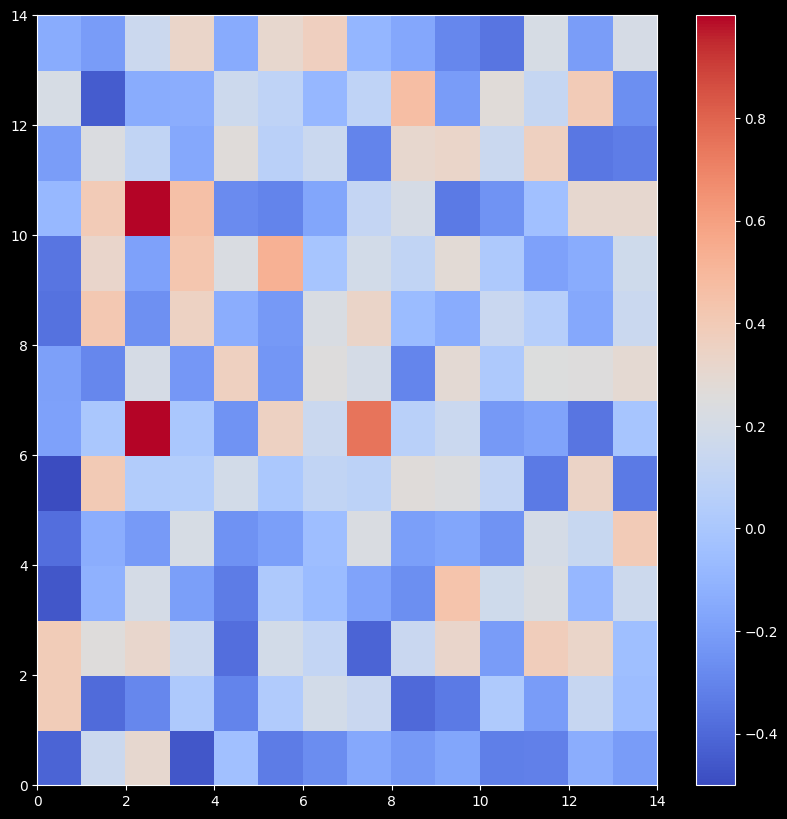

In [218]:
weights = som.get_weights()
plt.figure(figsize=(10, 10))
plt.pcolor(weights[:,:,0], cmap='coolwarm')  # Choose the appropriate colormap for your data
plt.colorbar()
plt.show()

<span style="color:orange">Calculation and Visualization of the U-Matrix for Self-Organizing Map

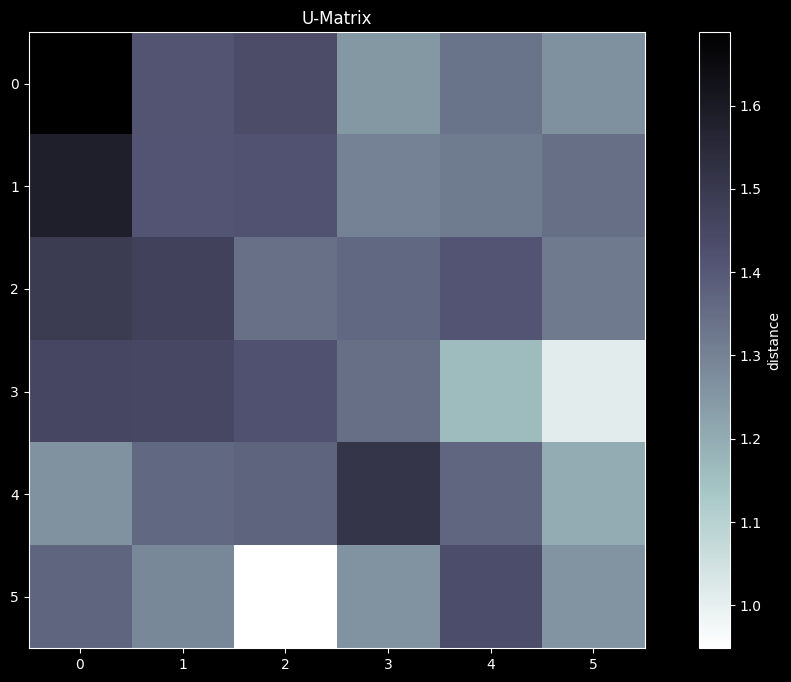

In [219]:
# Calculates the U-Matrix
u_matrix = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        v = som.get_weights()[i, j]  # Weights of the neuron (i, j)
        total_distance = 0
        count = 0
        if i-1 >= 0:    # Check for the left neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i-1, j])
            count += 1
        if i+1 < 6:    # Check for the right neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i+1, j])
            count += 1
        if j-1 >= 0:    # Check for the upper neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i, j-1])
            count += 1
        if j+1 < 6:    # Check for the lower neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i, j+1])
            count += 1
        u_matrix[i, j] = total_distance / count

# Visualization of the U-Matrix
plt.imshow(u_matrix, cmap='bone_r')  # Use the colormap you prefer
plt.colorbar(label='distance')
plt.title('U-Matrix')
plt.show()

<span style="color:orange">Visualization of Weights for Each Feature with Self-Organizing Map

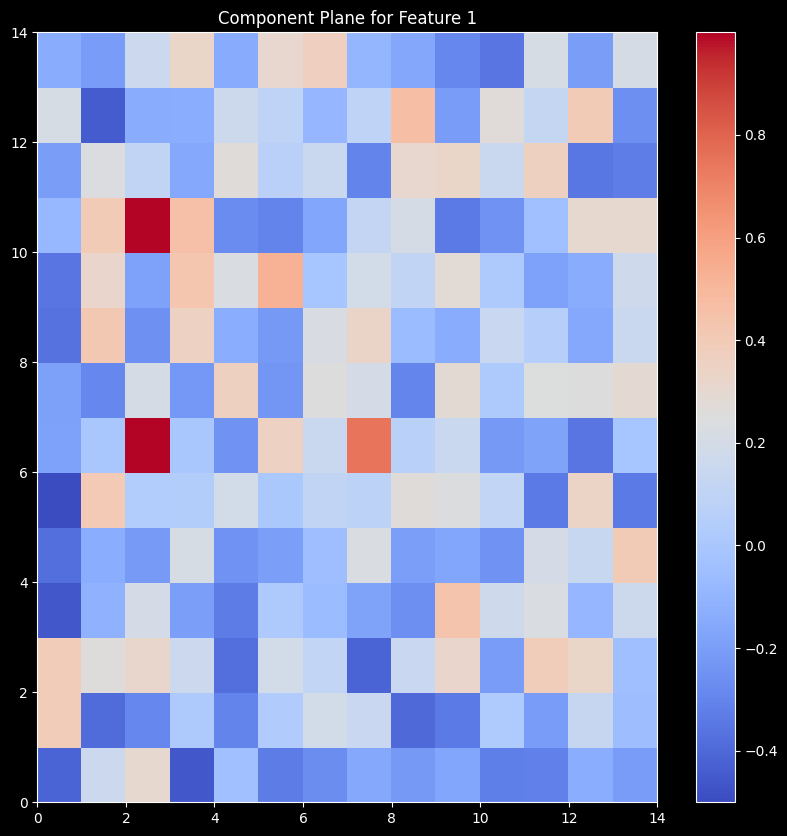

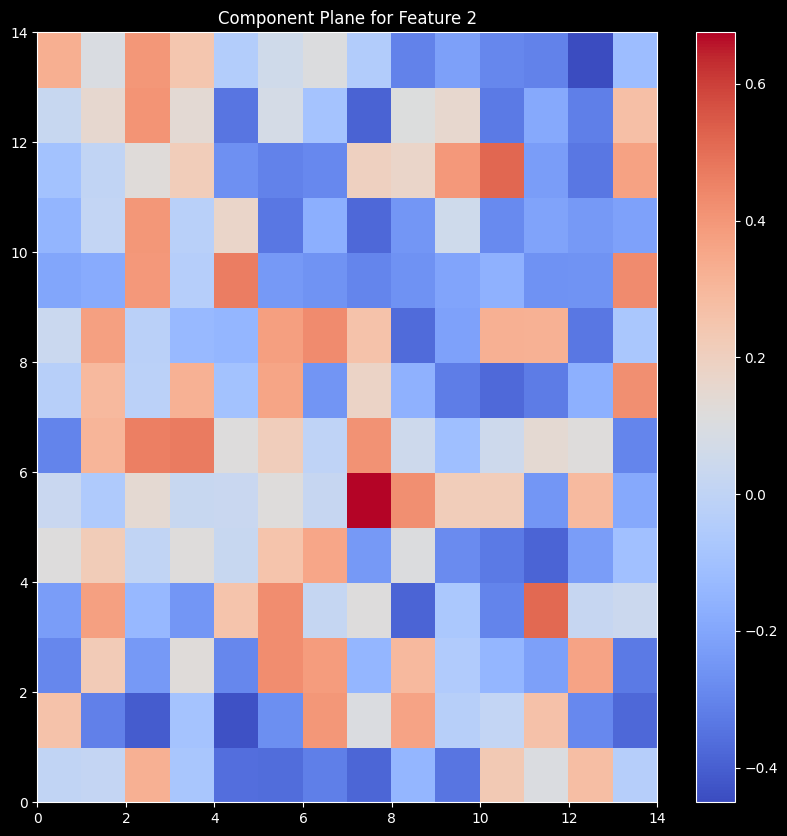

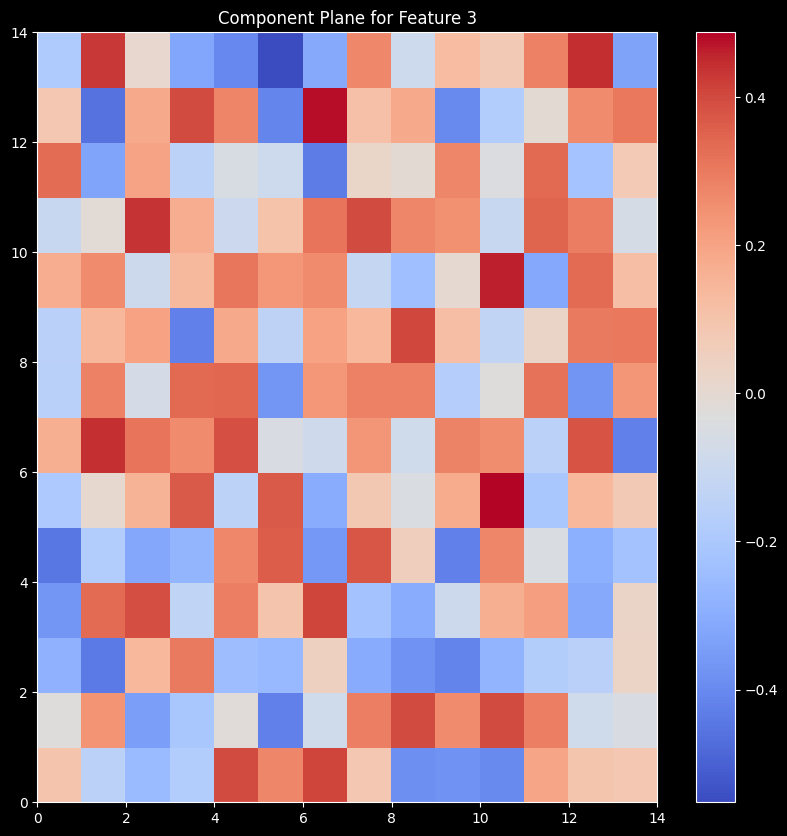

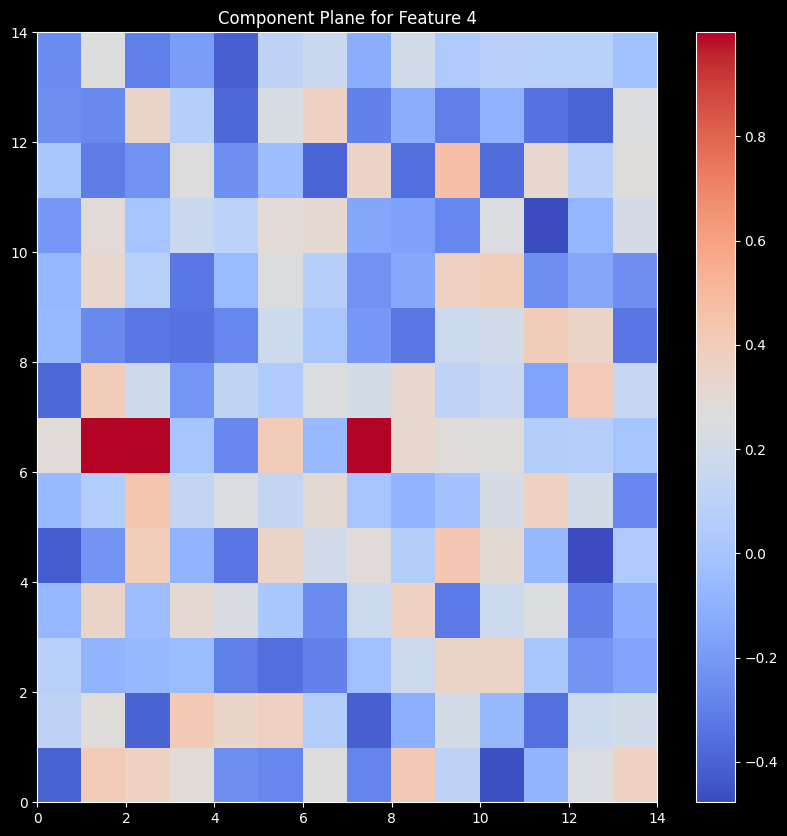

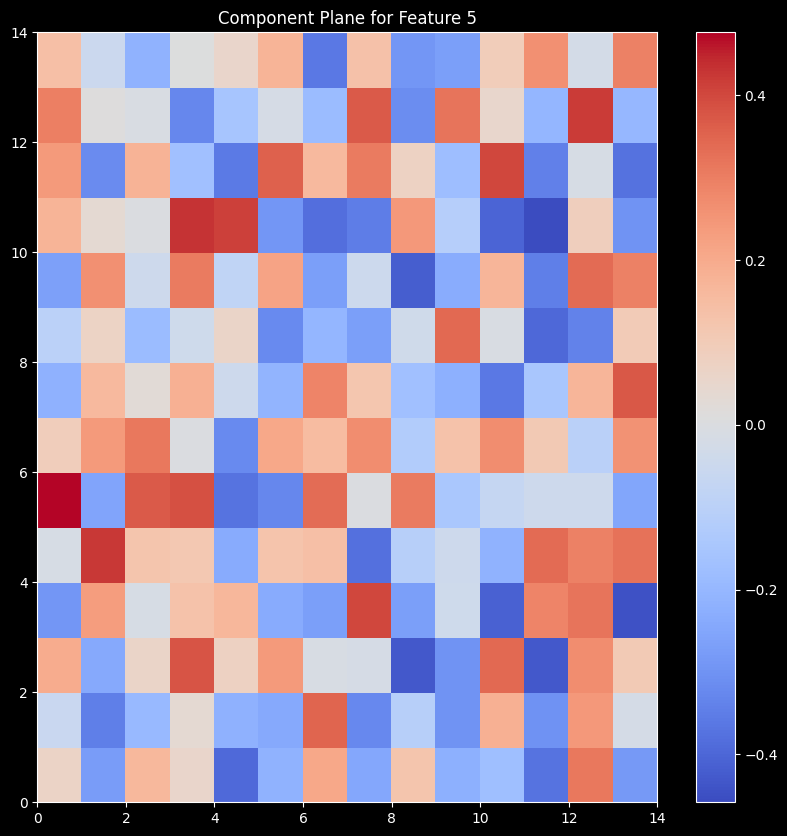

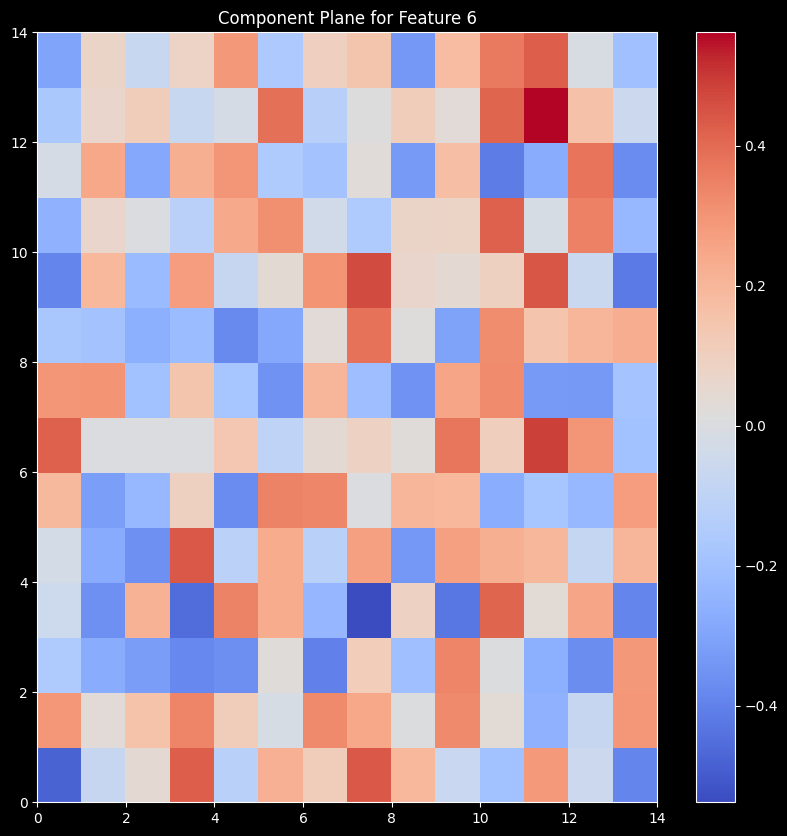

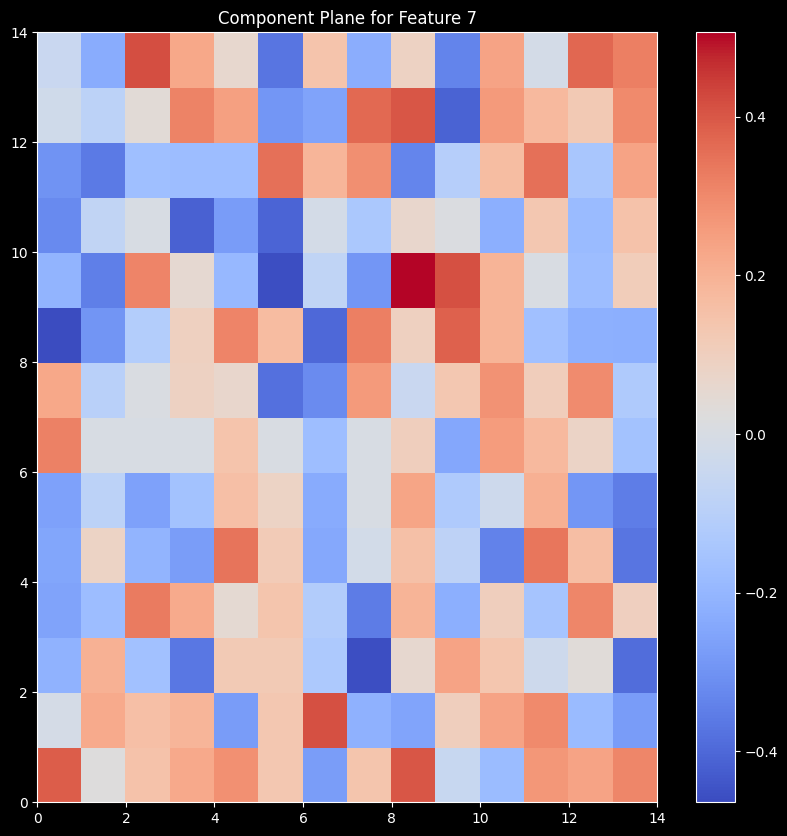

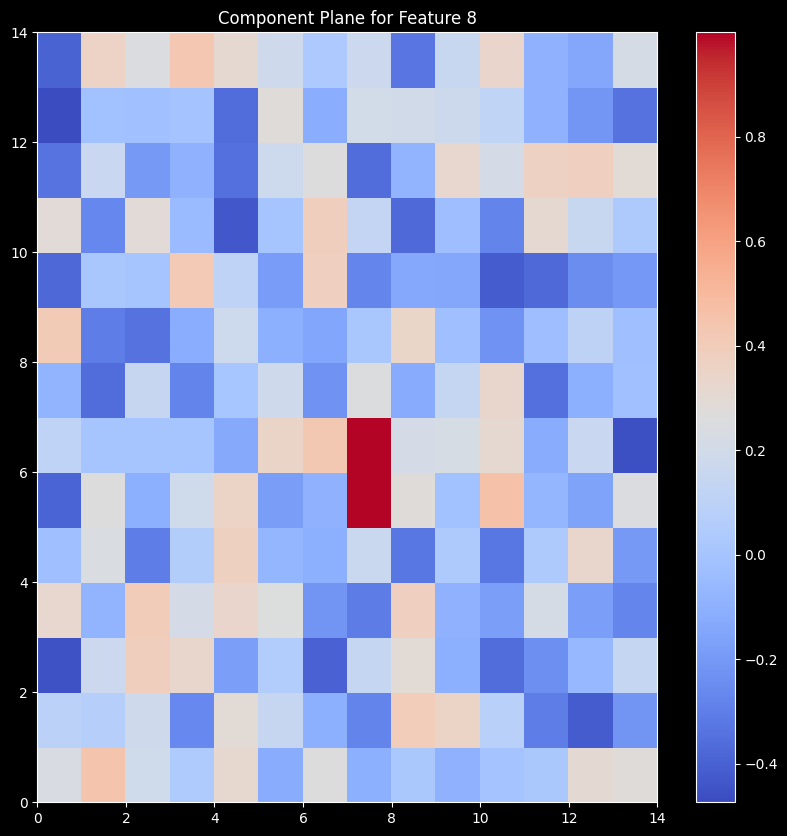

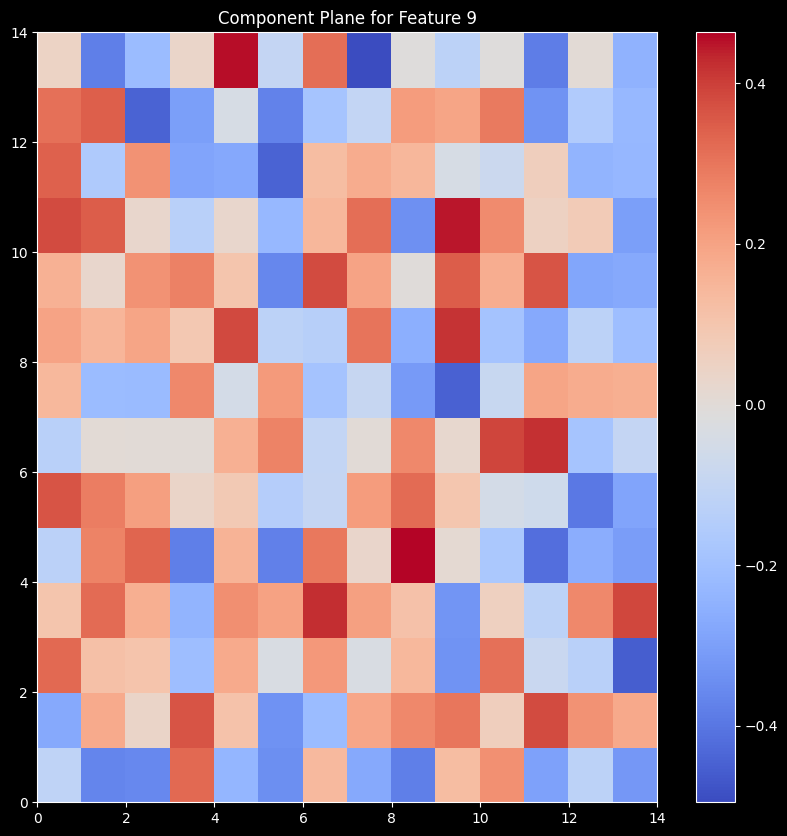

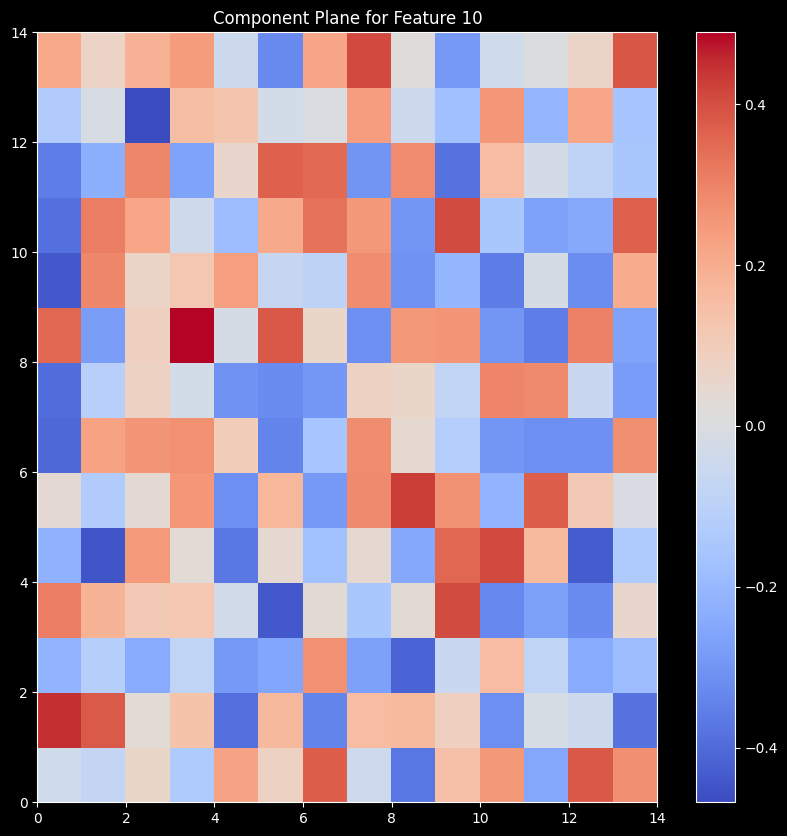

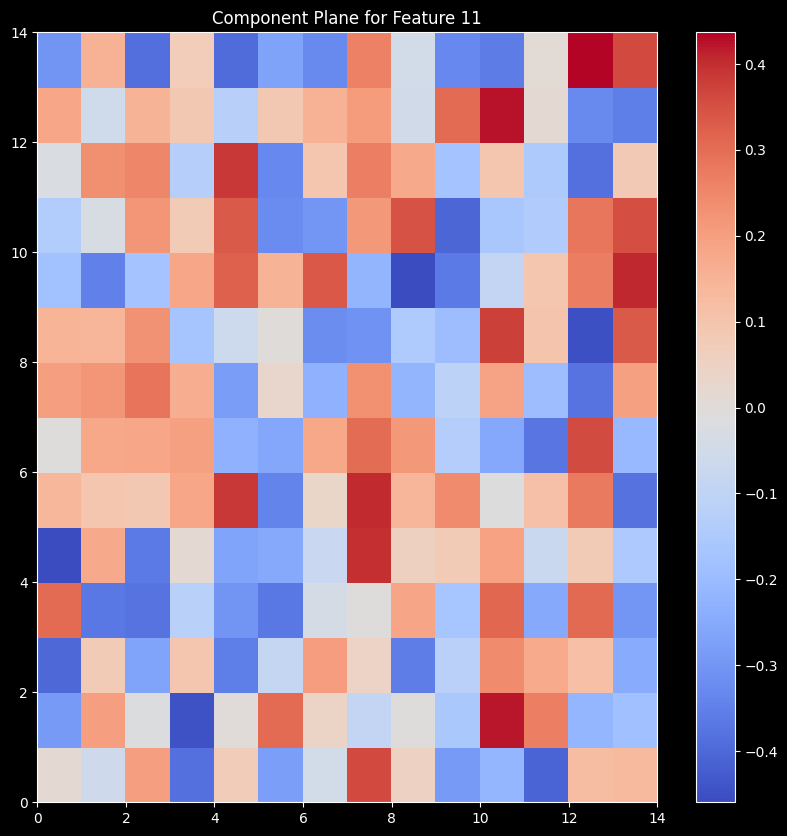

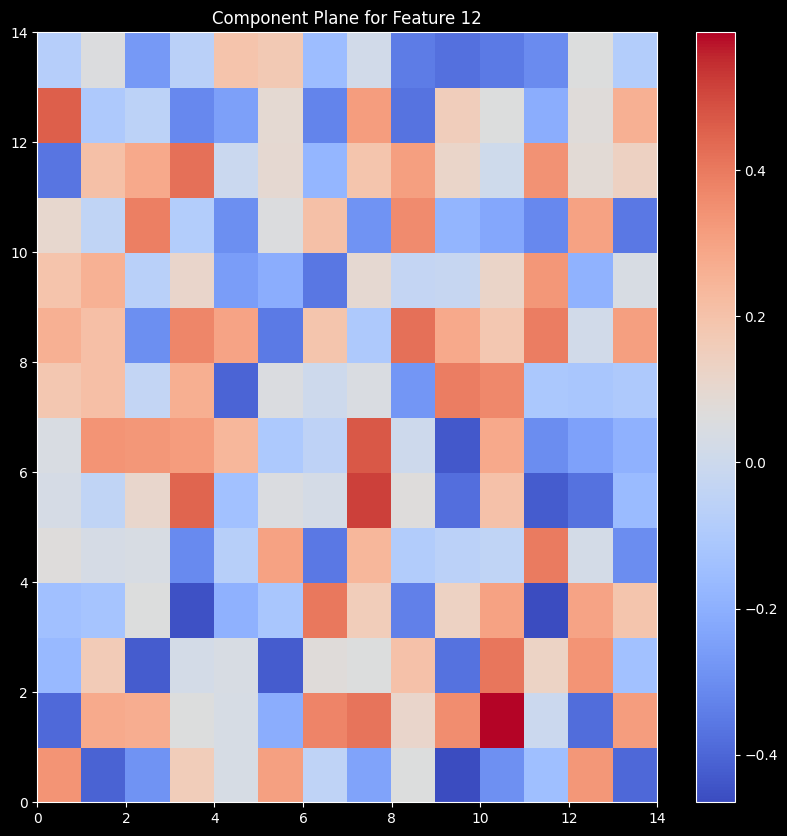

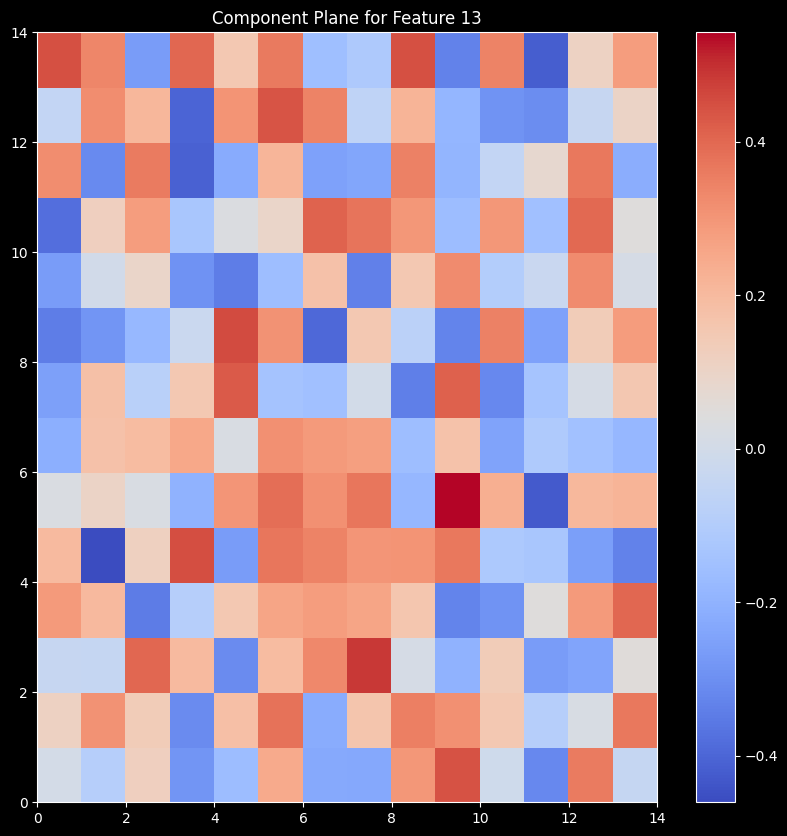

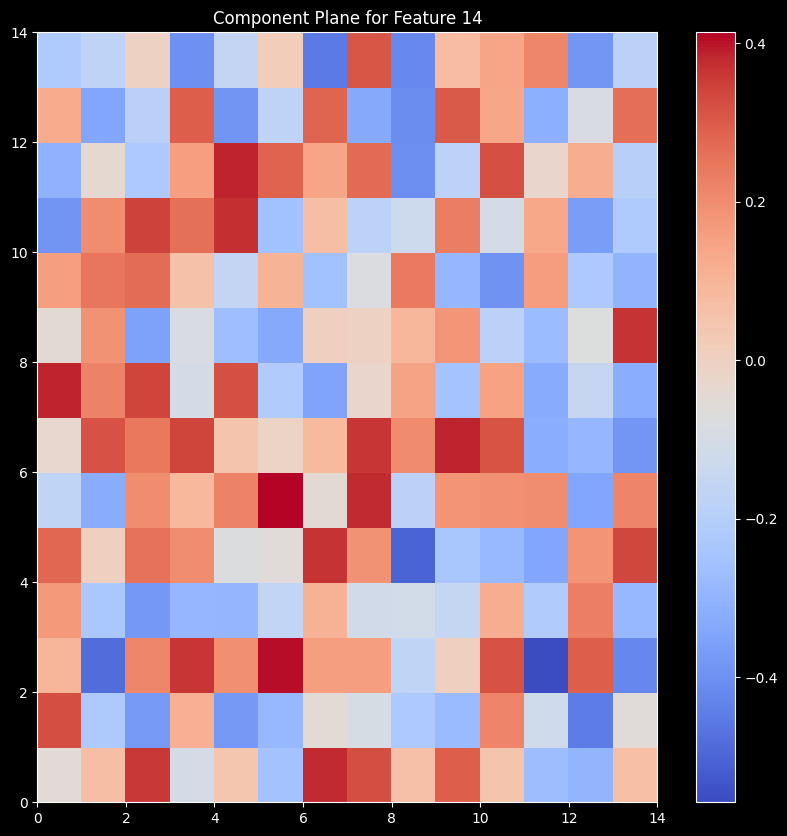

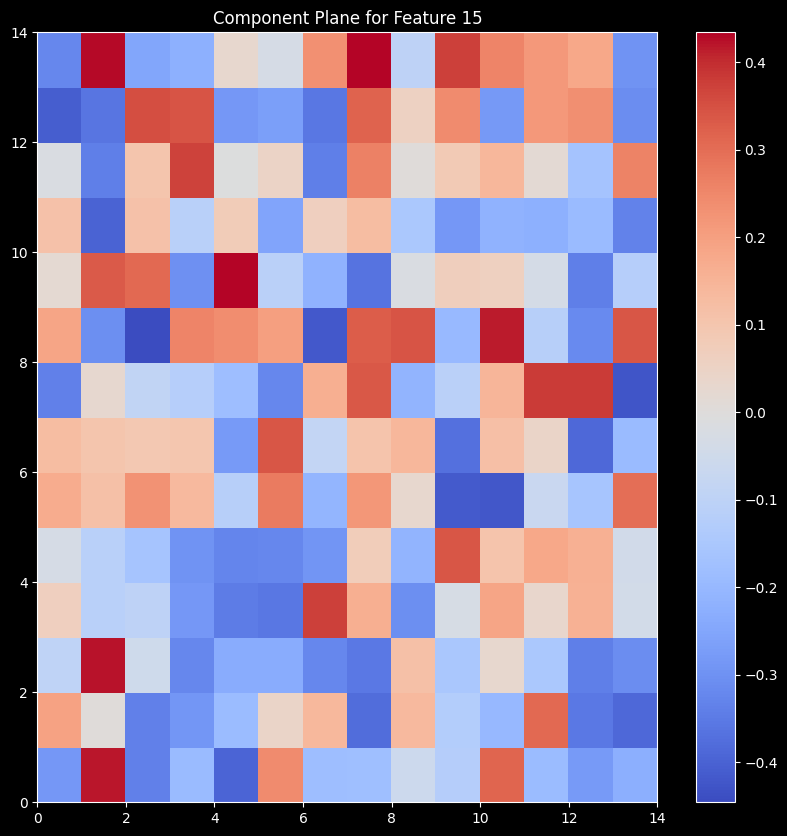

In [220]:
# Assumes som is the instance of the SOM you have created
weights = som.get_weights()

# Repeats for each feature
for i in range(weights.shape[2]):
    plt.figure(figsize=(10, 10))
    plt.pcolor(weights[:,:,i], cmap='coolwarm')  # Choose the appropriate colormap for your data
    plt.colorbar()
    plt.title(f'Component Plane for Feature {i+1}')
    plt.show()

# <span style="color:lime">SOM (Self- Organizing Maps) for predicting the likelihood of developing heart disease in the next decade (x_train= 750)

<span style="color:orange">Self-Organizing Maps Model 

In [ ]:
# Prepares the data
X = df.drop('TenYearCHD', axis=1).values
y = df['TenYearCHD'].values

In [ ]:
# Normalizes the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Creates the SOM
som = MiniSom(14, 14, X.shape[1], sigma=0.5, learning_rate=0.5)
# You can adjust the parameters

In [ ]:
# Trains the SOM
som.train_random(X, 750)  # You can adjust the number of epochs

In [225]:
# Prints the weights of the SOM
print(som.get_weights())

[[[-4.87890877e-02 -1.12734880e-01  5.39608349e-02 ... -3.59777284e-01
    2.42198314e-01  3.39376403e-01]
  [ 3.73678892e-01  6.46332752e-02  3.41059869e-01 ...  3.18368042e-01
    3.43030994e-01 -5.73897743e-02]
  [ 1.00000000e+00  4.67019726e-01  3.87873209e-01 ...  2.45001329e-01
    2.71028540e-01  1.08737189e-01]
  ...
  [ 7.71872474e-02  8.48803066e-03  4.66673482e-01 ... -3.32944071e-03
    2.44453825e-01  5.11684681e-01]
  [-2.83916313e-01 -5.34253253e-01  1.23849455e-01 ...  1.35783891e-01
    1.32348740e-01  8.53789132e-02]
  [-1.69803459e-01 -6.06679853e-02  1.78816146e-02 ... -3.42297718e-01
   -2.58948266e-01  3.99091352e-01]]

 [[-2.27858654e-01 -4.70412337e-02 -4.35338597e-01 ... -1.59361276e-01
   -3.92816439e-01 -1.86572686e-01]
  [ 5.90861372e-01  1.76674563e-01  2.79674614e-01 ...  2.28078067e-01
    2.31962389e-01 -1.01713046e-03]
  [ 1.00000000e+00  3.06606409e-01  8.20889905e-01 ...  2.41247366e-01
    3.00826728e-01  9.23247965e-02]
  ...
  [-2.32568695e-01  1.8

In [ ]:
# Groups the data
clusters = {}
for i, x in enumerate(X):
    w = som.winner(x)
    if w not in clusters:
        clusters[w] = []
    clusters[w].append(i)

In [ ]:
# Assigns neurons to class labels
labels_map = {}
for neuron, labels in clusters.items():
    most_common = Counter(labels).most_common(1)[0][0]
    labels_map[neuron] = most_common

In [228]:
# Prints the groups
for w, members in clusters.items():
    print(f"Neuron {w} includes samples {members}")

Neuron (np.int64(0), np.int64(2)) includes samples [0, 18, 34, 37, 44, 50, 56, 78, 99, 104, 108, 111, 112, 113, 122, 126, 132, 147, 149, 154, 174, 180, 185, 201, 208, 216, 225, 236, 239, 243, 246, 255, 259, 263, 265, 281, 317, 319, 329, 336, 346, 350, 356, 358, 377, 382, 392, 404, 406, 409, 416, 422, 429, 444, 462, 465, 476, 488, 490, 500, 505, 515, 516, 535, 539, 556, 562, 563, 564, 599, 611, 629, 653, 655, 658, 659, 667, 691, 694, 706, 707, 712, 713, 718, 727, 730, 741, 744, 758, 759, 760, 761, 766, 773, 775, 777, 790, 794, 834, 851, 860, 861, 863, 871, 874, 882, 883, 885, 886, 888, 892, 893, 903, 911, 915, 919, 925, 926, 930, 932, 942, 955, 956, 963, 974, 1008, 1009, 1026, 1048, 1060, 1061, 1066, 1068, 1070, 1075, 1079, 1086, 1089, 1094, 1096, 1098, 1111, 1118, 1124, 1128, 1137, 1153, 1166, 1172, 1173, 1175, 1188, 1196, 1209, 1217, 1236, 1243, 1261, 1269, 1270, 1282, 1284, 1285, 1287, 1301, 1302, 1305, 1314, 1358, 1359, 1363, 1380, 1392, 1393, 1398, 1406, 1410, 1416, 1448, 1451, 148

In [229]:
# Prints the labels for each neuron
for neuron, label in labels_map.items():
    print(f"Neuron {neuron} is mapped to class {label}")

Neuron (np.int64(0), np.int64(2)) is mapped to class 0
Neuron (np.int64(10), np.int64(3)) is mapped to class 1
Neuron (np.int64(1), np.int64(3)) is mapped to class 2
Neuron (np.int64(11), np.int64(3)) is mapped to class 3
Neuron (np.int64(11), np.int64(4)) is mapped to class 4
Neuron (np.int64(11), np.int64(2)) is mapped to class 5
Neuron (np.int64(9), np.int64(1)) is mapped to class 6
Neuron (np.int64(12), np.int64(3)) is mapped to class 7
Neuron (np.int64(13), np.int64(5)) is mapped to class 8
Neuron (np.int64(2), np.int64(2)) is mapped to class 9
Neuron (np.int64(11), np.int64(1)) is mapped to class 13
Neuron (np.int64(1), np.int64(2)) is mapped to class 23
Neuron (np.int64(8), np.int64(1)) is mapped to class 163
Neuron (np.int64(2), np.int64(11)) is mapped to class 1718
Neuron (np.int64(11), np.int64(13)) is mapped to class 2065
Neuron (np.int64(13), np.int64(0)) is mapped to class 3101


In [230]:
# Calculates the number of observations for each class
class_counts = {}
for neuron, samples in clusters.items():
    class_label = labels_map[neuron]
    if class_label not in class_counts:
        class_counts[class_label] = len(samples)
    else:
        class_counts[class_label] += len(samples)

# Prints the number of observations for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label} has {count} samples")

Class 0 has 425 samples
Class 1 has 431 samples
Class 2 has 515 samples
Class 3 has 176 samples
Class 4 has 212 samples
Class 5 has 326 samples
Class 6 has 303 samples
Class 7 has 419 samples
Class 8 has 211 samples
Class 9 has 290 samples
Class 13 has 136 samples
Class 23 has 176 samples
Class 163 has 32 samples
Class 1718 has 1 samples
Class 2065 has 2 samples
Class 3101 has 1 samples


In [231]:
# Assumes the 'df' variable is the original DataFrame and 'clusters' is a dictionary mapping neurons to observations
class_counts = {}
for neuron, samples in clusters.items():
    class_label = labels_map.get(neuron)
    if class_label is None:
        continue
    if class_label not in class_counts:
        class_counts[class_label] = {'0': 0, '1': 0}
    for sample in samples:
        # Assumes 'sample' is the index of the observation in the DataFrame
        if sample in df.index:
            value = df.loc[sample, 'TenYearCHD']
            if value == 0:
                class_counts[class_label]['0'] += 1
            elif value == 1:
                class_counts[class_label]['1'] += 1

# Prints the number of observations for each class
for class_label, counts in class_counts.items():
    print(f"Class {class_label} has {counts['0']} samples with 0 and {counts['1']} samples with 1")

Class 0 has 304 samples with 0 and 51 samples with 1
Class 1 has 318 samples with 0 and 60 samples with 1
Class 2 has 379 samples with 0 and 58 samples with 1
Class 3 has 124 samples with 0 and 23 samples with 1
Class 4 has 156 samples with 0 and 30 samples with 1
Class 5 has 239 samples with 0 and 43 samples with 1
Class 6 has 229 samples with 0 and 36 samples with 1
Class 7 has 297 samples with 0 and 56 samples with 1
Class 8 has 157 samples with 0 and 27 samples with 1
Class 9 has 222 samples with 0 and 38 samples with 1
Class 13 has 99 samples with 0 and 20 samples with 1
Class 23 has 125 samples with 0 and 23 samples with 1
Class 163 has 20 samples with 0 and 6 samples with 1
Class 1718 has 1 samples with 0 and 0 samples with 1
Class 2065 has 1 samples with 0 and 1 samples with 1
Class 3101 has 1 samples with 0 and 0 samples with 1


# <span style="color:lime">Self-Organizing Maps (SOM) Graphs

<span style="color:orange">Visualization of Feature 0 Weights of the Self-Organizing Map

In [ ]:
weights = som.get_weights()
plt.figure(figsize=(10, 10))
plt.pcolor(weights[:,:,0], cmap='coolwarm')  # Choose the appropriate colormap for your data
plt.colorbar()
plt.show()

<span style="color:orange">Calculation and Visualization of the U-Matrix for Self-Organizing Map

In [ ]:
# Calculates the U-Matrix
u_matrix = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        v = som.get_weights()[i, j]  # Weights of the neuron (i, j)
        total_distance = 0
        count = 0
        if i-1 >= 0:    # Check for the left neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i-1, j])
            count += 1
        if i+1 < 6:    # Check for the right neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i+1, j])
            count += 1
        if j-1 >= 0:    # Check for the upper neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i, j-1])
            count += 1
        if j+1 < 6:    # Check for the lower neuron
            total_distance += np.linalg.norm(v - som.get_weights()[i, j+1])
            count += 1
        u_matrix[i, j] = total_distance / count

# Visualization of the U-Matrix
plt.imshow(u_matrix, cmap='bone_r')  # Use the colormap you prefer
plt.colorbar(label='distance')
plt.title('U-Matrix')
plt.show()

<span style="color:orange">Visualization of Weights for Each Feature with Self-Organizing Map

In [ ]:
# Assumes som is the instance of the SOM you have created
weights = som.get_weights()

# Repeats for each feature
for i in range(weights.shape[2]):
    plt.figure(figsize=(10, 10))
    plt.pcolor(weights[:,:,i], cmap='coolwarm')  # Choose the appropriate colormap for your data
    plt.colorbar()
    plt.title(f'Component Plane for Feature {i+1}')
    plt.show()